In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, cv, Pool
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, cv, Pool
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

	Training dataset	Test dataset
MAE	7.264	20.39
MSE	132.5	1437
R-square 0.99 0.94

In [2]:
data_input=pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Baseline/HER-catalyst-data-with-DOI.csv", sep=',')

In [3]:
data_input

DOI Composition  Alloy_or_not  Pt_or_not  \
0         12.1039/c5ee02460a        FeCo             1          0   
1         11.1039/c5ee02460a        FeCo             1          0   
2         10.3390/ma13071513          Pt             0          1   
3         10.3390/ma13071513          Pt             0          1   
4         10.3390/ma13071513          Pt             0          1   
...                      ...         ...           ...        ...   
1170  10.1002/anie.202013047        NiMo             1          0   
1171  10.1002/adfm.202001756          Pt             0          1   
1172  10.1002/adfm.202001756          Pt             0          1   
1173  10.1002/adfm.202001756          Pt             0          1   
1174  10.1002/adfm.202001756          Pt             0          1   

      Weight_ratio (wt%)  Particle_size (nm)  Surface_area (m2/g)  \
0                   5.50                15.0                 89.2   
1                   6.42                15.0                 80.9   
2                  18.94                 5.0                527.0   
3                  18.94                 5.0                527.0   
4                  18.94                 5.0                527.0   
...                  ...                 ...                  ...   
1170              100.00                10.0                 52.8   
1171               10.20                 2.0                402.0   
1172               10.20                 2.0                402.0   
1173               10.20                 2.0                402.0   
1174               10.20                 2.0                402.0   

      N_doped (at%)    pH  Current_density (mA/cm2)  Overpotential (mV)  
0              3.08   0.3                        10              364.00  
1              4.54   0.3                        10              287.00  
2              6.26   0.3                        10               47.00  
3              6.26   0.3                        20               71.00  
4              6.26   0.3                        40              118.00  
...             ...   ...                       ...                 ...  
1170           0.00  14.0                        10               42.00  
1171           0.00   0.3                        50               50.00  
1172           0.00   0.3                        40               45.20  
1173           0.00   0.3                        20               34.60  
1174           0.00   0.3                        10               28.27  

[1175 rows x 11 columns]

In [4]:
df = data_input.drop('DOI', axis=1).drop('Composition', axis=1)
df

Alloy_or_not  Pt_or_not  Weight_ratio (wt%)  Particle_size (nm)  \
0                1          0                5.50                15.0   
1                1          0                6.42                15.0   
2                0          1               18.94                 5.0   
3                0          1               18.94                 5.0   
4                0          1               18.94                 5.0   
...            ...        ...                 ...                 ...   
1170             1          0              100.00                10.0   
1171             0          1               10.20                 2.0   
1172             0          1               10.20                 2.0   
1173             0          1               10.20                 2.0   
1174             0          1               10.20                 2.0   

      Surface_area (m2/g)  N_doped (at%)    pH  Current_density (mA/cm2)  \
0                    89.2           3.08   0.3                        10   
1                    80.9           4.54   0.3                        10   
2                   527.0           6.26   0.3                        10   
3                   527.0           6.26   0.3                        20   
4                   527.0           6.26   0.3                        40   
...                   ...            ...   ...                       ...   
1170                 52.8           0.00  14.0                        10   
1171                402.0           0.00   0.3                        50   
1172                402.0           0.00   0.3                        40   
1173                402.0           0.00   0.3                        20   
1174                402.0           0.00   0.3                        10   

      Overpotential (mV)  
0                 364.00  
1                 287.00  
2                  47.00  
3                  71.00  
4                 118.00  
...                  ...  
1170               42.00  
1171               50.00  
1172               45.20  
1173               34.60  
1174               28.27  

[1175 rows x 9 columns]

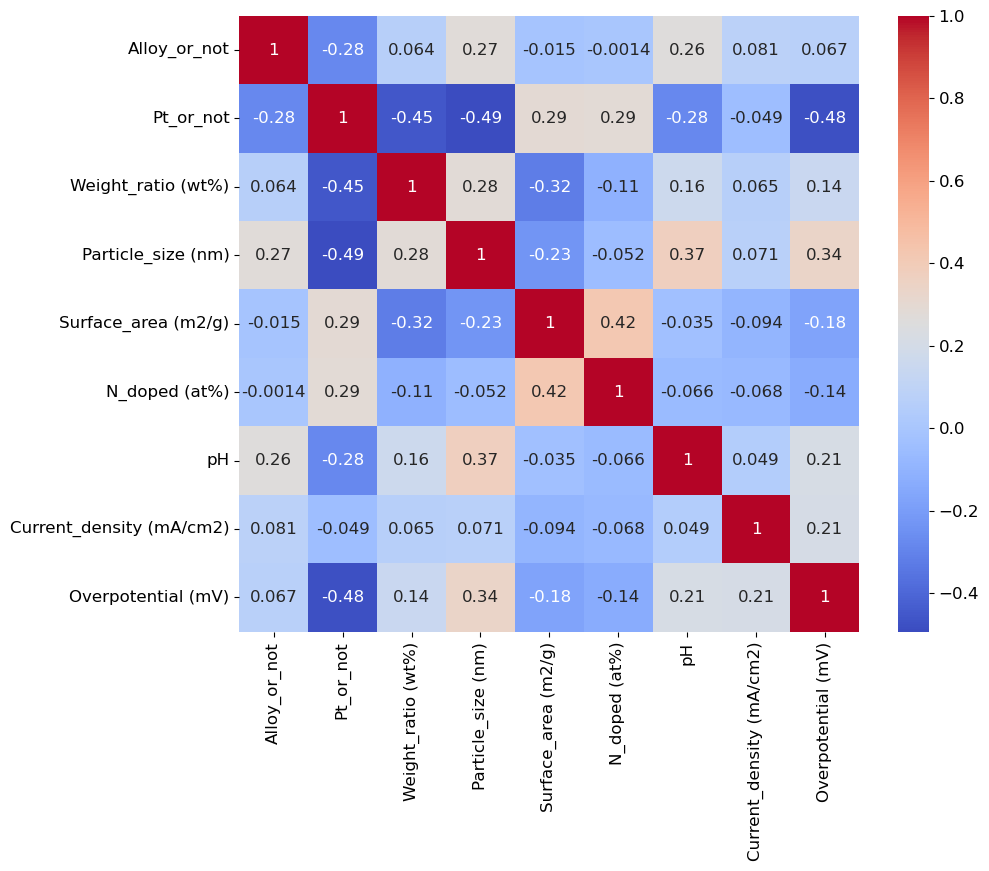

In [89]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


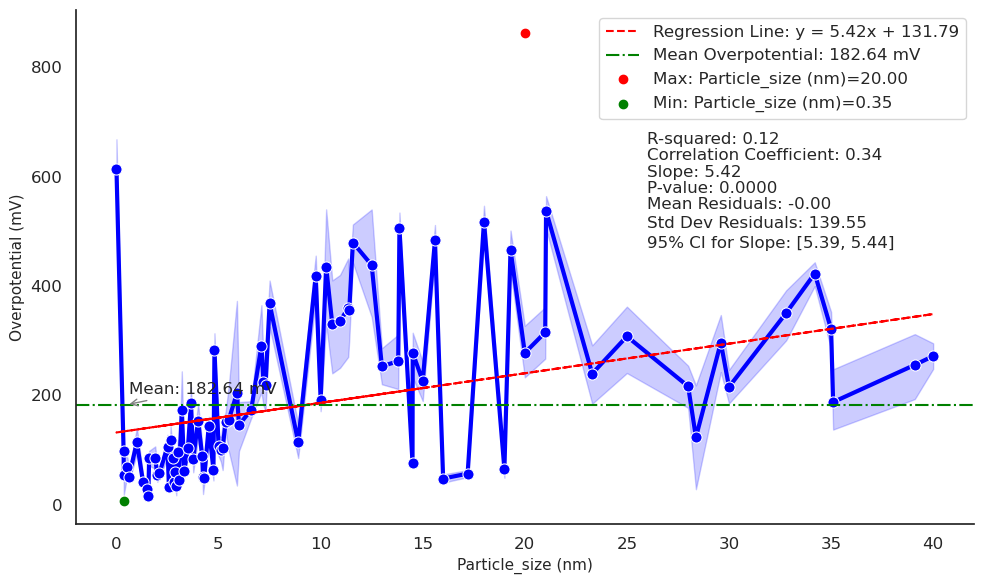

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

# Calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(df['Particle_size (nm)'], df['Overpotential (mV)'])
regression_line = slope * df['Particle_size (nm)'] + intercept

# Calculate correlation coefficient
correlation_coefficient = df['Particle_size (nm)'].corr(df['Overpotential (mV)'])

# Calculate R-squared
r_squared = r_value ** 2

# Calculate residuals
residuals = df['Overpotential (mV)'] - (slope * df['Particle_size (nm)'] + intercept)
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Calculate confidence intervals for regression line
confidence = 0.95
n = len(df['Particle_size (nm)'])
t_critical = np.abs(stats.t.ppf((1 - confidence) / 2, n - 2))
std_error_slope = std_err * np.sqrt(np.sum((df['Particle_size (nm)'] - np.mean(df['Particle_size (nm)'])) ** 2)) / (n * np.std(df['Particle_size (nm)']))
margin_error_slope = t_critical * std_error_slope

# Set the style
sns.set(style='white')

# Create the figure and axis objects
plt.figure(figsize=(10, 6))
ax = plt.gca()
# Plot the data with markers and a trend line
sns.lineplot(x='Particle_size (nm)', y='Overpotential (mV)', data=df, marker='o', markersize=8, color='blue', linewidth=3)
plt.plot(df['Particle_size (nm)'], regression_line, color='red', linestyle='--', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

# Add mean line and annotate mean value
mean_overpotential = df['Overpotential (mV)'].mean()
plt.axhline(y=mean_overpotential, color='green', linestyle='-.', label=f'Mean Overpotential: {mean_overpotential:.2f} mV')
plt.annotate(f'Mean: {mean_overpotential:.2f} mV',
             xy=(0.5, mean_overpotential), xycoords='data',
             xytext=(0.6, mean_overpotential + 20), textcoords='data',
             arrowprops=dict(arrowstyle='->', color='gray'),
             fontsize=12)

# Highlight maximum and minimum points
max_overpotential = df.loc[df['Overpotential (mV)'].idxmax()]
min_overpotential = df.loc[df['Overpotential (mV)'].idxmin()]
plt.scatter(max_overpotential['Particle_size (nm)'], max_overpotential['Overpotential (mV)'], color='red', label=f'Max: Particle_size (nm)={max_overpotential["Particle_size (nm)"]:.2f}')
plt.scatter(min_overpotential['Particle_size (nm)'], min_overpotential['Overpotential (mV)'], color='green', label=f'Min: Particle_size (nm)={min_overpotential["Particle_size (nm)"]:.2f}')
# Display statistical analysis
plt.text(26.0, 660, f'R-squared: {r_squared:.2f}', fontsize=12)
plt.text(26.0, 630, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)
plt.text(26.0, 600, f'Slope: {slope:.2f}', fontsize=12)
plt.text(26.0, 570, f'P-value: {p_value:.4f}', fontsize=12)
plt.text(26.0, 540, f'Mean Residuals: {mean_residuals:.2f}', fontsize=12)
plt.text(26.0, 505, f'Std Dev Residuals: {std_residuals:.2f}', fontsize=12)
plt.text(26.0, 470, f'95% CI for Slope: [{slope - margin_error_slope:.2f}, {slope + margin_error_slope:.2f}]', fontsize=12)

# Set labels and title with appropriate font sizes
plt.xlabel('Particle_size (nm)', fontsize=11)
plt.ylabel('Overpotential (mV)', fontsize=11)

# Set tick labels font size
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Add legend and adjust layout
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Model/New_Pics/Dataset_Overpotential_vs_Particle_size.tiff", dpi=400, format='tiff')
# Display the plot
plt.show()


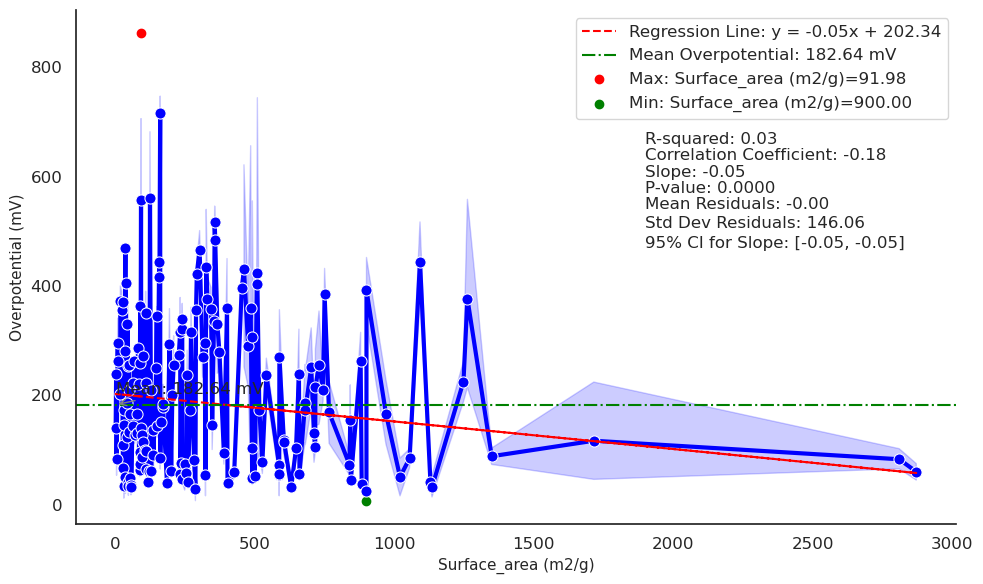

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

# Calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(df['Surface_area (m2/g)'], df['Overpotential (mV)'])
regression_line = slope * df['Surface_area (m2/g)'] + intercept

# Calculate correlation coefficient
correlation_coefficient = df['Surface_area (m2/g)'].corr(df['Overpotential (mV)'])

# Calculate R-squared
r_squared = r_value ** 2

# Calculate residuals
residuals = df['Overpotential (mV)'] - (slope * df['Surface_area (m2/g)'] + intercept)
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Calculate confidence intervals for regression line
confidence = 0.95
n = len(df['Surface_area (m2/g)'])
t_critical = np.abs(stats.t.ppf((1 - confidence) / 2, n - 2))
std_error_slope = std_err * np.sqrt(np.sum((df['Surface_area (m2/g)'] - np.mean(df['Surface_area (m2/g)'])) ** 2)) / (n * np.std(df['Surface_area (m2/g)']))
margin_error_slope = t_critical * std_error_slope

# Set the style
sns.set(style='white')

# Create the figure and axis objects
plt.figure(figsize=(10, 6))
ax = plt.gca()
# Plot the data with markers and a trend line
sns.lineplot(x='Surface_area (m2/g)', y='Overpotential (mV)', data=df, marker='o', markersize=8, color='blue', linewidth=3)
plt.plot(df['Surface_area (m2/g)'], regression_line, color='red', linestyle='--', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

# Add mean line and annotate mean value
mean_overpotential = df['Overpotential (mV)'].mean()
plt.axhline(y=mean_overpotential, color='green', linestyle='-.', label=f'Mean Overpotential: {mean_overpotential:.2f} mV')
plt.annotate(f'Mean: {mean_overpotential:.2f} mV',
             xy=(0.5, mean_overpotential), xycoords='data',
             xytext=(0.6, mean_overpotential + 20), textcoords='data',
             arrowprops=dict(arrowstyle='->', color='gray'),
             fontsize=12)

# Highlight maximum and minimum points
max_overpotential = df.loc[df['Overpotential (mV)'].idxmax()]
min_overpotential = df.loc[df['Overpotential (mV)'].idxmin()]
plt.scatter(max_overpotential['Surface_area (m2/g)'], max_overpotential['Overpotential (mV)'], color='red', label=f'Max: Surface_area (m2/g)={max_overpotential["Surface_area (m2/g)"]:.2f}')
plt.scatter(min_overpotential['Surface_area (m2/g)'], min_overpotential['Overpotential (mV)'], color='green', label=f'Min: Surface_area (m2/g)={min_overpotential["Surface_area (m2/g)"]:.2f}')
# Display statistical analysis
plt.text(1900.0, 660, f'R-squared: {r_squared:.2f}', fontsize=12)
plt.text(1900.0, 630, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)
plt.text(1900.0, 600, f'Slope: {slope:.2f}', fontsize=12)
plt.text(1900.0, 570, f'P-value: {p_value:.4f}', fontsize=12)
plt.text(1900.0, 540, f'Mean Residuals: {mean_residuals:.2f}', fontsize=12)
plt.text(1900.0, 505, f'Std Dev Residuals: {std_residuals:.2f}', fontsize=12)
plt.text(1900.0, 470, f'95% CI for Slope: [{slope - margin_error_slope:.2f}, {slope + margin_error_slope:.2f}]', fontsize=12)

# Set labels and title with appropriate font sizes
plt.xlabel('Surface_area (m2/g)', fontsize=11)
plt.ylabel('Overpotential (mV)', fontsize=11)

# Set tick labels font size
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Add legend and adjust layout
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig( "/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Model/New_Pics/Dataset_Overpotential (mV)_vs_Surface_area.tiff", dpi=400, format='tiff')
# Display the plot
plt.show()


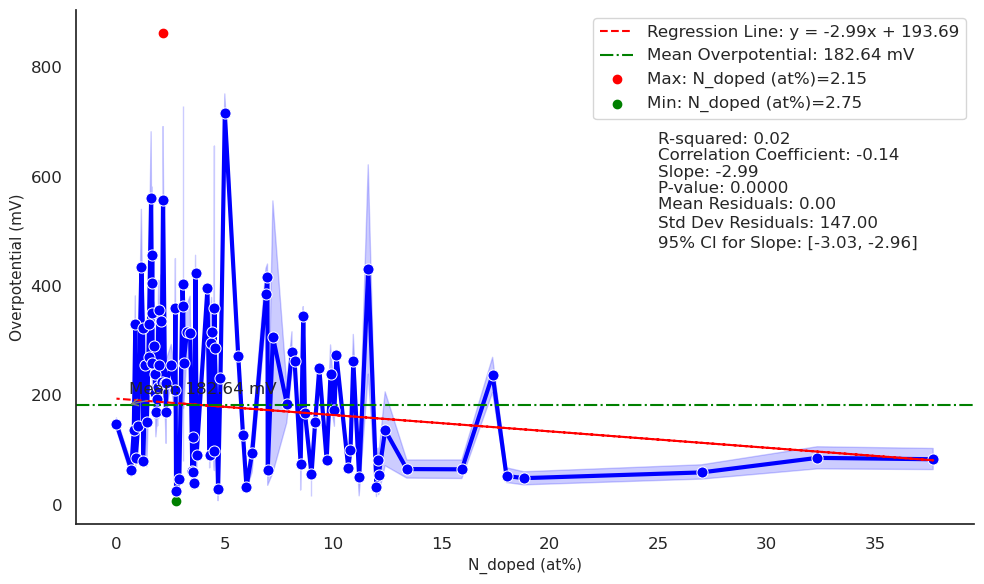

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

# Calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(df['N_doped (at%)'], df['Overpotential (mV)'])
regression_line = slope * df['N_doped (at%)'] + intercept

# Calculate correlation coefficient
correlation_coefficient = df['N_doped (at%)'].corr(df['Overpotential (mV)'])

# Calculate R-squared
r_squared = r_value ** 2

# Calculate residuals
residuals = df['Overpotential (mV)'] - (slope * df['N_doped (at%)'] + intercept)
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Calculate confidence intervals for regression line
confidence = 0.95
n = len(df['N_doped (at%)'])
t_critical = np.abs(stats.t.ppf((1 - confidence) / 2, n - 2))
std_error_slope = std_err * np.sqrt(np.sum((df['N_doped (at%)'] - np.mean(df['N_doped (at%)'])) ** 2)) / (n * np.std(df['N_doped (at%)']))
margin_error_slope = t_critical * std_error_slope

# Set the style
sns.set(style='white')

# Create the figure and axis objects
plt.figure(figsize=(10, 6))
ax = plt.gca()
# Plot the data with markers and a trend line
sns.lineplot(x='N_doped (at%)', y='Overpotential (mV)', data=df, marker='o', markersize=8, color='blue', linewidth=3)
plt.plot(df['N_doped (at%)'], regression_line, color='red', linestyle='--', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

# Add mean line and annotate mean value
mean_overpotential = df['Overpotential (mV)'].mean()
plt.axhline(y=mean_overpotential, color='green', linestyle='-.', label=f'Mean Overpotential: {mean_overpotential:.2f} mV')
plt.annotate(f'Mean: {mean_overpotential:.2f} mV',
             xy=(0.5, mean_overpotential), xycoords='data',
             xytext=(0.6, mean_overpotential + 20), textcoords='data',
             arrowprops=dict(arrowstyle='->', color='gray'),
             fontsize=12)

# Highlight maximum and minimum points
max_overpotential = df.loc[df['Overpotential (mV)'].idxmax()]
min_overpotential = df.loc[df['Overpotential (mV)'].idxmin()]
plt.scatter(max_overpotential['N_doped (at%)'], max_overpotential['Overpotential (mV)'], color='red', label=f'Max: N_doped (at%)={max_overpotential["N_doped (at%)"]:.2f}')
plt.scatter(min_overpotential['N_doped (at%)'], min_overpotential['Overpotential (mV)'], color='green', label=f'Min: N_doped (at%)={min_overpotential["N_doped (at%)"]:.2f}')
# Display statistical analysis
plt.text(25.0, 660, f'R-squared: {r_squared:.2f}', fontsize=12)
plt.text(25.0, 630, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)
plt.text(25.0, 600, f'Slope: {slope:.2f}', fontsize=12)
plt.text(25.0, 570, f'P-value: {p_value:.4f}', fontsize=12)
plt.text(25.0, 540, f'Mean Residuals: {mean_residuals:.2f}', fontsize=12)
plt.text(25.0, 505, f'Std Dev Residuals: {std_residuals:.2f}', fontsize=12)
plt.text(25.0, 470, f'95% CI for Slope: [{slope - margin_error_slope:.2f}, {slope + margin_error_slope:.2f}]', fontsize=12)

# Set labels and title with appropriate font sizes
plt.xlabel('N_doped (at%)', fontsize=11)
plt.ylabel('Overpotential (mV)', fontsize=11)

# Set tick labels font size
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Add legend and adjust layout
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Model/New_Pics/Dataset_Overpotential (mV)_vs_N_doped (at%).tiff", dpi=400, format='tiff')
# Display the plot
plt.show()


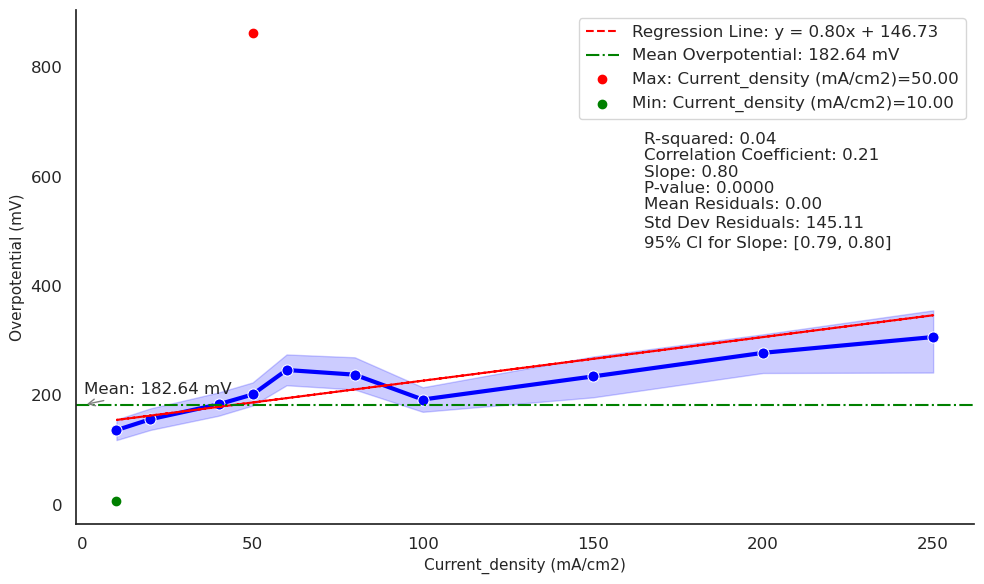

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

# Calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(df['Current_density (mA/cm2)'], df['Overpotential (mV)'])
regression_line = slope * df['Current_density (mA/cm2)'] + intercept

# Calculate correlation coefficient
correlation_coefficient = df['Current_density (mA/cm2)'].corr(df['Overpotential (mV)'])

# Calculate R-squared
r_squared = r_value ** 2

# Calculate residuals
residuals = df['Overpotential (mV)'] - (slope * df['Current_density (mA/cm2)'] + intercept)
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Calculate confidence intervals for regression line
confidence = 0.95
n = len(df['Current_density (mA/cm2)'])
t_critical = np.abs(stats.t.ppf((1 - confidence) / 2, n - 2))
std_error_slope = std_err * np.sqrt(np.sum((df['Current_density (mA/cm2)'] - np.mean(df['Current_density (mA/cm2)'])) ** 2)) / (n * np.std(df['Current_density (mA/cm2)']))
margin_error_slope = t_critical * std_error_slope

# Set the style
sns.set(style='white')

# Create the figure and axis objects
plt.figure(figsize=(10, 6))
ax = plt.gca()
# Plot the data with markers and a trend line
sns.lineplot(x='Current_density (mA/cm2)', y='Overpotential (mV)', data=df, marker='o', markersize=8, color='blue', linewidth=3)
plt.plot(df['Current_density (mA/cm2)'], regression_line, color='red', linestyle='--', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

# Add mean line and annotate mean value
mean_overpotential = df['Overpotential (mV)'].mean()
plt.axhline(y=mean_overpotential, color='green', linestyle='-.', label=f'Mean Overpotential: {mean_overpotential:.2f} mV')
plt.annotate(f'Mean: {mean_overpotential:.2f} mV',
             xy=(0.5, mean_overpotential), xycoords='data',
             xytext=(0.6, mean_overpotential + 20), textcoords='data',
             arrowprops=dict(arrowstyle='->', color='gray'),
             fontsize=12)

# Highlight maximum and minimum points
max_overpotential = df.loc[df['Overpotential (mV)'].idxmax()]
min_overpotential = df.loc[df['Overpotential (mV)'].idxmin()]
plt.scatter(max_overpotential['Current_density (mA/cm2)'], max_overpotential['Overpotential (mV)'], color='red', label=f'Max: Current_density (mA/cm2)={max_overpotential["Current_density (mA/cm2)"]:.2f}')
plt.scatter(min_overpotential['Current_density (mA/cm2)'], min_overpotential['Overpotential (mV)'], color='green', label=f'Min: Current_density (mA/cm2)={min_overpotential["Current_density (mA/cm2)"]:.2f}')
# Display statistical analysis
plt.text(165.0, 660, f'R-squared: {r_squared:.2f}', fontsize=12)
plt.text(165.0, 630, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)
plt.text(165.0, 600, f'Slope: {slope:.2f}', fontsize=12)
plt.text(165.0, 570, f'P-value: {p_value:.4f}', fontsize=12)
plt.text(165.0, 540, f'Mean Residuals: {mean_residuals:.2f}', fontsize=12)
plt.text(165.0, 505, f'Std Dev Residuals: {std_residuals:.2f}', fontsize=12)
plt.text(165.0, 470, f'95% CI for Slope: [{slope - margin_error_slope:.2f}, {slope + margin_error_slope:.2f}]', fontsize=12)

# Set labels and title with appropriate font sizes
plt.xlabel('Current_density (mA/cm2)', fontsize=11)
plt.ylabel('Overpotential (mV)', fontsize=11)

# Set tick labels font size
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Add legend and adjust layout
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Model/New_Pics/Dataset_Overpotential (mV)_vs_Current_density.tiff", dpi=400, format='tiff')
# Display the plot
plt.show()


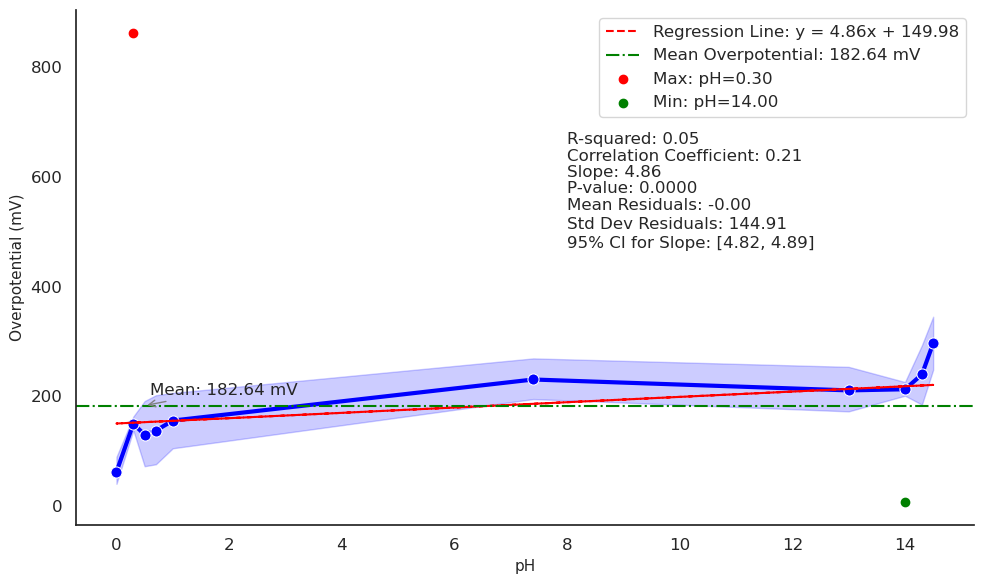

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

# Calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(df['pH'], df['Overpotential (mV)'])
regression_line = slope * df['pH'] + intercept

# Calculate correlation coefficient
correlation_coefficient = df['pH'].corr(df['Overpotential (mV)'])

# Calculate R-squared
r_squared = r_value ** 2

# Calculate residuals
residuals = df['Overpotential (mV)'] - (slope * df['pH'] + intercept)
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Calculate confidence intervals for regression line
confidence = 0.95
n = len(df['pH'])
t_critical = np.abs(stats.t.ppf((1 - confidence) / 2, n - 2))
std_error_slope = std_err * np.sqrt(np.sum((df['pH'] - np.mean(df['pH'])) ** 2)) / (n * np.std(df['pH']))
margin_error_slope = t_critical * std_error_slope

# Set the style
sns.set(style='white')

# Create the figure and axis objects
plt.figure(figsize=(10, 6))
ax = plt.gca()
# Plot the data with markers and a trend line
sns.lineplot(x='pH', y='Overpotential (mV)', data=df, marker='o', markersize=8, color='blue', linewidth=3)
plt.plot(df['pH'], regression_line, color='red', linestyle='--', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

# Add mean line and annotate mean value
mean_overpotential = df['Overpotential (mV)'].mean()
plt.axhline(y=mean_overpotential, color='green', linestyle='-.', label=f'Mean Overpotential: {mean_overpotential:.2f} mV')
plt.annotate(f'Mean: {mean_overpotential:.2f} mV',
             xy=(0.5, mean_overpotential), xycoords='data',
             xytext=(0.6, mean_overpotential + 20), textcoords='data',
             arrowprops=dict(arrowstyle='->', color='gray'),
             fontsize=12)

# Highlight maximum and minimum points
max_overpotential = df.loc[df['Overpotential (mV)'].idxmax()]
min_overpotential = df.loc[df['Overpotential (mV)'].idxmin()]
plt.scatter(max_overpotential['pH'], max_overpotential['Overpotential (mV)'], color='red', label=f'Max: pH={max_overpotential["pH"]:.2f}')
plt.scatter(min_overpotential['pH'], min_overpotential['Overpotential (mV)'], color='green', label=f'Min: pH={min_overpotential["pH"]:.2f}')

# Display statistical analysis
plt.text(8.0, 660, f'R-squared: {r_squared:.2f}', fontsize=12)
plt.text(8.0, 630, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)
plt.text(8.0, 600, f'Slope: {slope:.2f}', fontsize=12)
plt.text(8.0, 570, f'P-value: {p_value:.4f}', fontsize=12)
plt.text(8.0, 540, f'Mean Residuals: {mean_residuals:.2f}', fontsize=12)
plt.text(8.0, 505, f'Std Dev Residuals: {std_residuals:.2f}', fontsize=12)
plt.text(8.0, 470, f'95% CI for Slope: [{slope - margin_error_slope:.2f}, {slope + margin_error_slope:.2f}]', fontsize=12)

# Set labels and title with appropriate font sizes
plt.xlabel('pH', fontsize=11)
plt.ylabel('Overpotential (mV)', fontsize=11)

# Set tick labels font size
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Add legend and adjust layout
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Model/New_Pics/Dataset_Overpotential (mV)_vs_pH.tiff", dpi=400, format='tiff')
# Display the plot
plt.show()

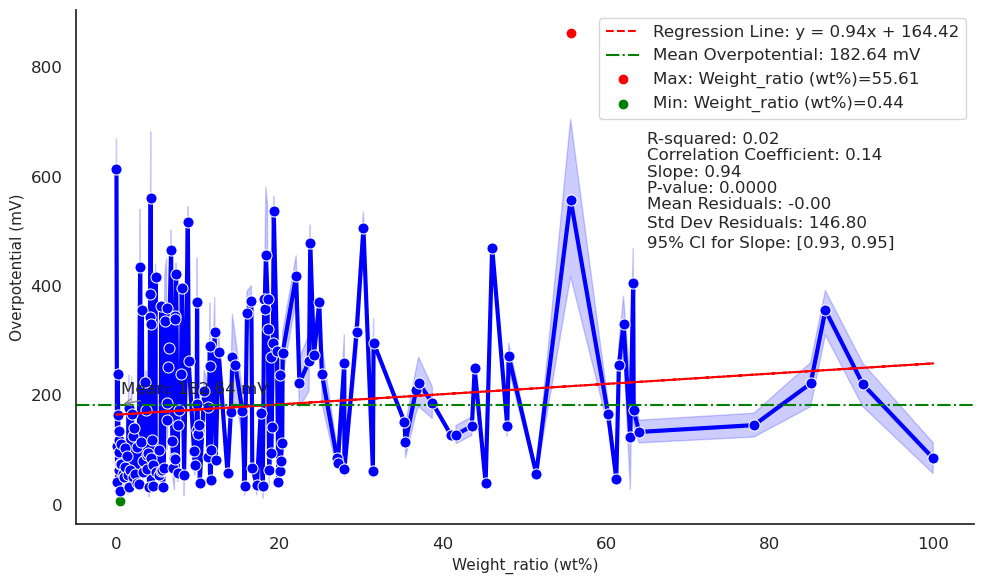

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

# Calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(df['Weight_ratio (wt%)'], df['Overpotential (mV)'])
regression_line = slope * df['Weight_ratio (wt%)'] + intercept

# Calculate correlation coefficient
correlation_coefficient = df['Weight_ratio (wt%)'].corr(df['Overpotential (mV)'])

# Calculate R-squared
r_squared = r_value ** 2

# Calculate residuals
residuals = df['Overpotential (mV)'] - (slope * df['Weight_ratio (wt%)'] + intercept)
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Calculate confidence intervals for regression line
confidence = 0.95
n = len(df['Weight_ratio (wt%)'])
t_critical = np.abs(stats.t.ppf((1 - confidence) / 2, n - 2))
std_error_slope = std_err * np.sqrt(np.sum((df['Weight_ratio (wt%)'] - np.mean(df['Weight_ratio (wt%)'])) ** 2)) / (n * np.std(df['Weight_ratio (wt%)']))
margin_error_slope = t_critical * std_error_slope

# Set the style
sns.set(style='white')

# Create the figure and axis objects
plt.figure(figsize=(10, 6))
ax = plt.gca()
# Plot the data with markers and a trend line
sns.lineplot(x='Weight_ratio (wt%)', y='Overpotential (mV)', data=df, marker='o', markersize=8, color='blue', linewidth=3)
plt.plot(df['Weight_ratio (wt%)'], regression_line, color='red', linestyle='--', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

# Add mean line and annotate mean value
mean_overpotential = df['Overpotential (mV)'].mean()
plt.axhline(y=mean_overpotential, color='green', linestyle='-.', label=f'Mean Overpotential: {mean_overpotential:.2f} mV')
plt.annotate(f'Mean: {mean_overpotential:.2f} mV',
             xy=(0.5, mean_overpotential), xycoords='data',
             xytext=(0.6, mean_overpotential + 20), textcoords='data',
             arrowprops=dict(arrowstyle='->', color='gray'),
             fontsize=12)

# Highlight maximum and minimum points
max_overpotential = df.loc[df['Overpotential (mV)'].idxmax()]
min_overpotential = df.loc[df['Overpotential (mV)'].idxmin()]
plt.scatter(max_overpotential['Weight_ratio (wt%)'], max_overpotential['Overpotential (mV)'], color='red', label=f'Max: Weight_ratio (wt%)={max_overpotential["Weight_ratio (wt%)"]:.2f}')
plt.scatter(min_overpotential['Weight_ratio (wt%)'], min_overpotential['Overpotential (mV)'], color='green', label=f'Min: Weight_ratio (wt%)={min_overpotential["Weight_ratio (wt%)"]:.2f}')
# Display statistical analysis
plt.text(65.0, 660, f'R-squared: {r_squared:.2f}', fontsize=12)
plt.text(65.0, 630, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)
plt.text(65.0, 600, f'Slope: {slope:.2f}', fontsize=12)
plt.text(65.0, 570, f'P-value: {p_value:.4f}', fontsize=12)
plt.text(65.0, 540, f'Mean Residuals: {mean_residuals:.2f}', fontsize=12)
plt.text(65.0, 505, f'Std Dev Residuals: {std_residuals:.2f}', fontsize=12)
plt.text(65.0, 470, f'95% CI for Slope: [{slope - margin_error_slope:.2f}, {slope + margin_error_slope:.2f}]', fontsize=12)

# Set labels and title with appropriate font sizes
plt.xlabel('Weight_ratio (wt%)', fontsize=11)
plt.ylabel('Overpotential (mV)', fontsize=11)

# Set tick labels font size
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Add legend and adjust layout
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Model/New_Pics/Dataset_Overpotential (mV)_vs_Weight_ratio (wt%).tiff", dpi=400, format='tiff')
# Display the plot
plt.show()


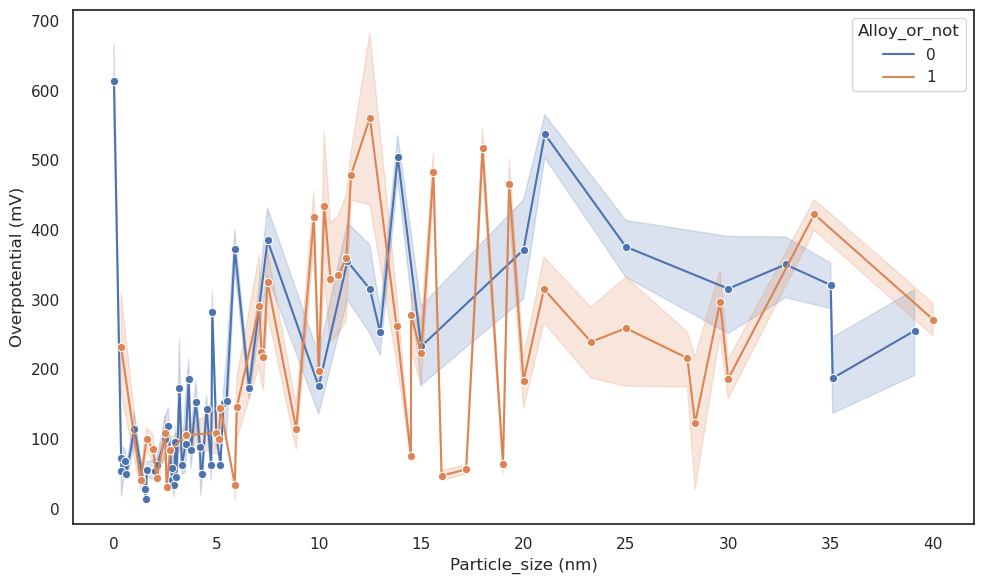

In [11]:
sns.set(style='white')
plt.figure(figsize=(10, 6))

sns.lineplot(x='Particle_size (nm)', y='Overpotential (mV)', hue='Alloy_or_not', data=df, marker='o')
plt.xlabel('Particle_size (nm)')
plt.ylabel('Overpotential (mV)')
plt.tight_layout()
plt.savefig("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Model/New_Pics/Dataset_Overpotential (mV)_vs_Alloy_or_not.tiff", dpi=400, format='tiff')
plt.show()

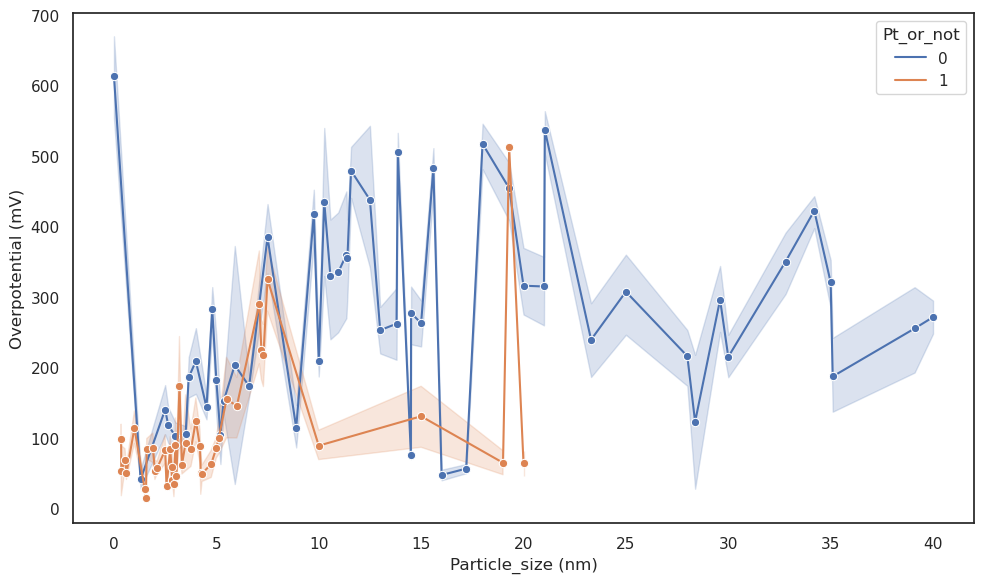

In [12]:
sns.set(style='white')
plt.figure(figsize=(10, 6))

sns.lineplot(x='Particle_size (nm)', y='Overpotential (mV)', hue='Pt_or_not', data=df, marker='o')
plt.xlabel('Particle_size (nm)')
plt.ylabel('Overpotential (mV)')
plt.tight_layout()
plt.savefig("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Model/New_Pics/Dataset_Overpotential (mV)_vs_Pt_or_not.tiff", dpi=400, format='tiff' )
plt.show()

## Model Creation

In [5]:
labels=data_input['Overpotential (mV)']
features=data_input.drop('Overpotential (mV)', axis=1).drop('DOI', axis=1).drop('Composition', axis=1)

X_train,X_test,y_train,y_test=train_test_split(features, labels, test_size=0.2, random_state=42) #42
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X_train)
train_set_scaled = scaler.transform(X_train)
test_set_scaled = scaler.transform(X_test)


In [6]:
cb_reg_1 = CatBoostRegressor(random_seed=13,iterations=4466,learning_rate=0.17294275579, depth=4,random_strength=1.019, verbose=500,loss_function='RMSE') #task_type='GPU', 
cb_reg_1.fit(train_set_scaled, y_train,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 136.2277958	total: 51ms	remaining: 3m 47s
500:	learn: 21.0035377	total: 306ms	remaining: 2.42s
1000:	learn: 13.5359192	total: 548ms	remaining: 1.9s
1500:	learn: 10.0019664	total: 786ms	remaining: 1.55s
2000:	learn: 8.0819526	total: 1.05s	remaining: 1.3s
2500:	learn: 6.9793412	total: 1.29s	remaining: 1.01s
3000:	learn: 6.0845758	total: 1.52s	remaining: 745ms
3500:	learn: 5.3726291	total: 1.76s	remaining: 486ms
4000:	learn: 4.7774102	total: 2.04s	remaining: 237ms
4465:	learn: 4.3154881	total: 2.28s	remaining: 0us


In [7]:
from sklearn.model_selection import cross_val_score,KFold
feature_name=['Alloy_or_not', 'Pt_or_not', 'Weight_ratio', 'Particle_size', 'Surface_area', 'N_doped','pH','Current_density']
print([*zip(feature_name,cb_reg_1.feature_importances_)])
print(cb_reg_1.score(train_set_scaled, y_train))
print(cb_reg_1.score(test_set_scaled, y_test))

[('Alloy_or_not', 6.799045708152979), ('Pt_or_not', 18.991209146585035), ('Weight_ratio', 15.768435876174467), ('Particle_size', 17.668516269496376), ('Surface_area', 10.40954575242933), ('N_doped', 12.849452242434095), ('pH', 9.055877084590996), ('Current_density', 8.457917920136724)]
0.9991383075161064
0.9680400222729632


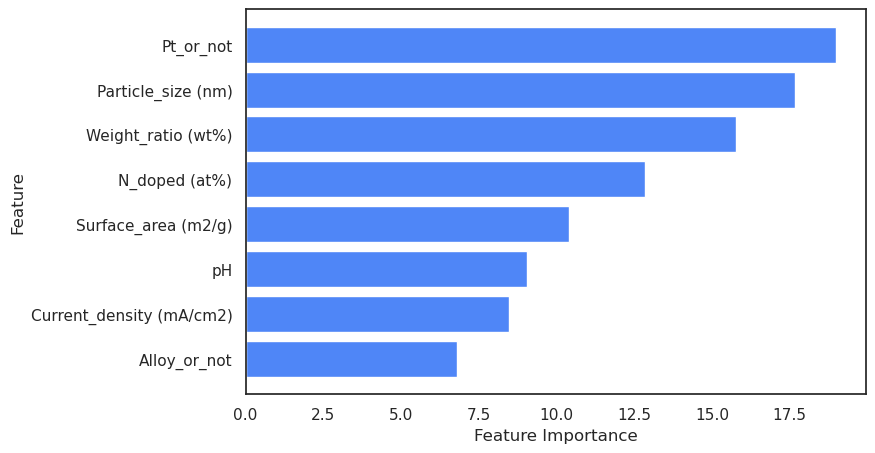

In [16]:
feature_importances = cb_reg_1.get_feature_importance()
feature_names = features.columns

# Zip feature names and importances together and sort them by importance
sorted_features = sorted(zip(feature_importances, feature_names))

# Unzip the sorted feature names and importances
sorted_importances, sorted_names = zip(*sorted_features)

# Visualization of feature importances in ascending order
n_features = len(features.columns)
plt.figure(figsize=(8, 5))
plt.barh(range(n_features), sorted_importances, align='center', color='#4F86F7')
plt.yticks(range(n_features), sorted_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
#plt.title("Feature Importances for CatBoost Regressor (Ascending Order)")
plt.savefig("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Model/New_Pics/feature_importances_catboost_sorted.tiff", dpi=400, format='tiff', bbox_inches='tight', transparent=True)
plt.show()

In [275]:
strKFold = KFold(n_splits=5,shuffle=True,random_state=0)
scores = cross_val_score(cb_reg_1, features, labels, cv=strKFold)
mean_score = scores.mean()
std_dev_score = scores.std()

# Print the results
print("KFold cross-validation scores:{}".format(scores))
print("Mean score of KFold cross-validation: {:.3f}".format(mean_score))
print("Standard deviation of KFold cross-validation: {:.3f}".format(std_dev_score))

0:	learn: 138.8785617	total: 900us	remaining: 4.02s
500:	learn: 18.2971822	total: 250ms	remaining: 1.98s
1000:	learn: 11.4510081	total: 490ms	remaining: 1.7s
1500:	learn: 8.4396832	total: 733ms	remaining: 1.45s
2000:	learn: 6.6669104	total: 974ms	remaining: 1.2s
2500:	learn: 5.6130103	total: 1.22s	remaining: 955ms
3000:	learn: 4.8640504	total: 1.45s	remaining: 709ms
3500:	learn: 4.2124571	total: 1.69s	remaining: 467ms
4000:	learn: 3.6799248	total: 1.93s	remaining: 225ms
4465:	learn: 3.3109546	total: 2.16s	remaining: 0us
0:	learn: 138.9316993	total: 764us	remaining: 3.41s
500:	learn: 19.3864857	total: 253ms	remaining: 2s
1000:	learn: 11.6185749	total: 501ms	remaining: 1.74s
1500:	learn: 8.3954627	total: 740ms	remaining: 1.46s
2000:	learn: 6.7448008	total: 980ms	remaining: 1.21s
2500:	learn: 5.6469141	total: 1.23s	remaining: 964ms
3000:	learn: 4.8013238	total: 1.47s	remaining: 715ms
3500:	learn: 4.2234197	total: 1.7s	remaining: 469ms
4000:	learn: 3.6922751	total: 1.94s	remaining: 226ms
4

In [8]:
y_pred_2 = cb_reg_1.predict(train_set_scaled)
y_pred = cb_reg_1.predict(test_set_scaled)
                                      
result1=pd.DataFrame(columns=['y_test','y_pred'])
result2=pd.DataFrame(columns=['y_train','y_train_pred'])
result1['y_test']=y_test
result1['y_pred']=y_pred
result2['y_train']=y_train
result2['y_train_pred']=y_pred_2

print("Train Accuracy r2: %.4g" % sk.metrics.r2_score(y_train, y_pred_2))
print("Test Accuracy r2: %.4g" % sk.metrics.r2_score(y_test, y_pred))
print("Train Accuracy MAE: %.4g" % sk.metrics.mean_absolute_error(y_train, y_pred_2))
print("Test Accuracy MAE: %.4g" % sk.metrics.mean_absolute_error(y_test, y_pred))
print("Train Accuracy mse: %.4g" % sk.metrics.mean_squared_error(y_train, y_pred_2))
print("Test Accuracy mse: %.4g" % sk.metrics.mean_squared_error(y_test, y_pred))

Train Accuracy r2: 0.9991
Test Accuracy r2: 0.968
Train Accuracy MAE: 2.399
Test Accuracy MAE: 15.36
Train Accuracy mse: 18.62
Test Accuracy mse: 753.6


### Optuna

In [260]:
import optuna
def objective(trial):
    # Define the hyperparameters to tune
    param = {
        'iterations': trial.suggest_int('iterations', 1000, 20000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.15, 0.5),
        'depth': trial.suggest_int('depth', 4, 10),
        'random_strength': trial.suggest_uniform('random_strength', 1.0, 10.0),
        'loss_function': 'RMSE',
        'random_seed': 13
    }
    
    # Create the CatBoostRegressor model with the hyperparameters
    model = CatBoostRegressor(**param, verbose=2000)
    
    # Fit the model
    model.fit(train_set_scaled, y_train, plot=False)
    
    # Predict on the test set
    y_pred = model.predict(test_set_scaled)
    
    # Calculate the R^2 score
    r2 = r2_score(y_test, y_pred)
    
    # Since Optuna tries to minimize the objective, we return the negative R^2 score
    return -r2

# Create a study object and specify the direction as "minimize"
study = optuna.create_study(direction='minimize')

# Start the optimization
study.optimize(objective, n_trials=100, timeout=600)

# Print the best parameters and score
print(f"Best parameters: {study.best_params}")
print(f"Best R^2 score: {-study.best_value}")

# Train the model with the best parameters
best_params = study.best_params
best_model = CatBoostRegressor(**best_params, random_seed=13, verbose=500)
best_model.fit(train_set_scaled, y_train, plot=True)

# Predict and evaluate on the test set
best_y_pred = best_model.predict(test_set_scaled)
print("Test Accuracy r2: %.4g" % r2_score(y_test, best_y_pred))

[I 2024-06-14 11:05:59,852] A new study created in memory with name: no-name-06637ea1-9268-42e1-875e-bd6496844f62
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 134.2440284	total: 1.25ms	remaining: 9.48s
2000:	learn: 0.7737262	total: 4.44s	remaining: 12.4s
4000:	learn: 0.7736622	total: 8.85s	remaining: 7.96s
6000:	learn: 0.7736622	total: 13.2s	remaining: 3.52s
7599:	learn: 0.7736622	total: 16.7s	remaining: 0us


[I 2024-06-14 11:06:17,573] Trial 0 finished with value: -0.9397957285863686 and parameters: {'iterations': 7600, 'learning_rate': 0.2977055913886309, 'depth': 9, 'random_strength': 6.875433146107004}. Best is trial 0 with value: -0.9397957285863686.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 128.6222549	total: 778us	remaining: 985ms


[I 2024-06-14 11:06:18,310] Trial 1 finished with value: -0.9579713828350924 and parameters: {'iterations': 1267, 'learning_rate': 0.39242059953781083, 'depth': 4, 'random_strength': 1.9683570805786164}. Best is trial 1 with value: -0.9579713828350924.


1266:	learn: 6.0585077	total: 622ms	remaining: 0us
0:	learn: 128.0859660	total: 1.08ms	remaining: 11s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 0.7736749	total: 2.93s	remaining: 12s
4000:	learn: 0.7736622	total: 5.85s	remaining: 9.06s
6000:	learn: 0.7736622	total: 8.77s	remaining: 6.14s
8000:	learn: 0.7736622	total: 11.7s	remaining: 3.21s
10000:	learn: 0.7736622	total: 14.6s	remaining: 296ms
10203:	learn: 0.7736622	total: 14.9s	remaining: 0us


[I 2024-06-14 11:06:34,275] Trial 2 finished with value: -0.9361738004226324 and parameters: {'iterations': 10204, 'learning_rate': 0.48221091504631586, 'depth': 8, 'random_strength': 7.456964705635874}. Best is trial 1 with value: -0.9579713828350924.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 137.4780810	total: 933us	remaining: 8.35s
2000:	learn: 2.8998811	total: 1.24s	remaining: 4.3s
4000:	learn: 1.4121647	total: 2.48s	remaining: 3.06s
6000:	learn: 1.0223805	total: 3.72s	remaining: 1.82s
8000:	learn: 0.8792828	total: 4.95s	remaining: 582ms


[I 2024-06-14 11:06:40,395] Trial 3 finished with value: -0.9635094341338869 and parameters: {'iterations': 8942, 'learning_rate': 0.21472589144188245, 'depth': 5, 'random_strength': 6.535703384601206}. Best is trial 3 with value: -0.9635094341338869.


8941:	learn: 0.8441577	total: 5.52s	remaining: 0us
0:	learn: 138.0538146	total: 990us	remaining: 5.55s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 0.7739190	total: 7.89s	remaining: 14.2s
4000:	learn: 0.7736622	total: 15.8s	remaining: 6.34s
5603:	learn: 0.7736622	total: 22.2s	remaining: 0us


[I 2024-06-14 11:07:03,768] Trial 4 finished with value: -0.9310814006047159 and parameters: {'iterations': 5604, 'learning_rate': 0.20063255881549216, 'depth': 10, 'random_strength': 6.246254476483893}. Best is trial 3 with value: -0.9635094341338869.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 139.7871108	total: 853us	remaining: 14.1s
2000:	learn: 0.7763233	total: 7.97s	remaining: 57.7s
4000:	learn: 0.7736628	total: 15.9s	remaining: 49.7s
6000:	learn: 0.7736622	total: 23.7s	remaining: 41.5s
8000:	learn: 0.7736622	total: 31.6s	remaining: 33.6s
10000:	learn: 0.7736622	total: 39.5s	remaining: 25.6s
12000:	learn: 0.7736622	total: 47.2s	remaining: 17.7s
14000:	learn: 0.7736622	total: 55.1s	remaining: 9.79s
16000:	learn: 0.7736622	total: 1m 2s	remaining: 1.92s
16488:	learn: 0.7736622	total: 1m 4s	remaining: 0us


[I 2024-06-14 11:08:12,097] Trial 5 finished with value: -0.9346689604696888 and parameters: {'iterations': 16489, 'learning_rate': 0.1592468139358672, 'depth': 10, 'random_strength': 7.45217223936511}. Best is trial 3 with value: -0.9635094341338869.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 139.1359801	total: 986us	remaining: 9.99s
2000:	learn: 0.8401019	total: 2.88s	remaining: 11.7s
4000:	learn: 0.7741314	total: 5.78s	remaining: 8.86s
6000:	learn: 0.7736681	total: 8.71s	remaining: 5.99s
8000:	learn: 0.7736623	total: 11.6s	remaining: 3.09s
10000:	learn: 0.7736622	total: 14.5s	remaining: 191ms
10132:	learn: 0.7736622	total: 14.7s	remaining: 0us


[I 2024-06-14 11:08:27,762] Trial 6 finished with value: -0.9560282542837085 and parameters: {'iterations': 10133, 'learning_rate': 0.17461866519843508, 'depth': 8, 'random_strength': 4.051844624954797}. Best is trial 3 with value: -0.9635094341338869.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 129.3016752	total: 934us	remaining: 4.75s
2000:	learn: 3.8415653	total: 974ms	remaining: 1.5s
4000:	learn: 2.0417016	total: 1.93s	remaining: 522ms


[I 2024-06-14 11:08:30,546] Trial 7 finished with value: -0.9610894078876718 and parameters: {'iterations': 5082, 'learning_rate': 0.44192104769918433, 'depth': 4, 'random_strength': 7.404291034526481}. Best is trial 3 with value: -0.9635094341338869.


5081:	learn: 1.5819551	total: 2.46s	remaining: 0us
0:	learn: 137.9460278	total: 836us	remaining: 2.06s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 1.4916894	total: 1.58s	remaining: 362ms


[I 2024-06-14 11:08:32,697] Trial 8 finished with value: -0.952507098989302 and parameters: {'iterations': 2459, 'learning_rate': 0.20325720379189424, 'depth': 6, 'random_strength': 5.449934558643187}. Best is trial 3 with value: -0.9635094341338869.


2458:	learn: 1.2297958	total: 1.94s	remaining: 0us
0:	learn: 133.6050196	total: 964us	remaining: 10.9s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 0.9733311	total: 1.64s	remaining: 7.64s
4000:	learn: 0.7816451	total: 3.32s	remaining: 6.08s
6000:	learn: 0.7740780	total: 4.96s	remaining: 4.4s
8000:	learn: 0.7736982	total: 6.54s	remaining: 2.72s
10000:	learn: 0.7736652	total: 8.12s	remaining: 1.07s


[I 2024-06-14 11:08:42,735] Trial 9 finished with value: -0.9548129948426216 and parameters: {'iterations': 11325, 'learning_rate': 0.3149900085643489, 'depth': 6, 'random_strength': 8.674966710573973}. Best is trial 3 with value: -0.9635094341338869.


11324:	learn: 0.7736628	total: 9.16s	remaining: 0us
0:	learn: 136.6159751	total: 882us	remaining: 17.2s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 1.2266840	total: 1.59s	remaining: 13.9s
4000:	learn: 0.8059766	total: 3.17s	remaining: 12.3s
6000:	learn: 0.7769908	total: 4.74s	remaining: 10.7s
8000:	learn: 0.7740802	total: 6.33s	remaining: 9.12s
10000:	learn: 0.7737238	total: 7.91s	remaining: 7.54s
12000:	learn: 0.7736711	total: 9.49s	remaining: 5.96s
14000:	learn: 0.7736636	total: 11.2s	remaining: 4.41s
16000:	learn: 0.7736624	total: 12.7s	remaining: 2.81s
18000:	learn: 0.7736622	total: 14.3s	remaining: 1.22s
19532:	learn: 0.7736622	total: 15.5s	remaining: 0us


[I 2024-06-14 11:08:59,705] Trial 10 finished with value: -0.9566580339204771 and parameters: {'iterations': 19533, 'learning_rate': 0.2361840261824845, 'depth': 6, 'random_strength': 9.545829634343406}. Best is trial 3 with value: -0.9635094341338869.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 136.0802196	total: 866us	remaining: 4.79s
2000:	learn: 5.8074693	total: 975ms	remaining: 1.72s
4000:	learn: 3.1453593	total: 1.95s	remaining: 744ms


[I 2024-06-14 11:09:02,756] Trial 11 finished with value: -0.95898632332147 and parameters: {'iterations': 5526, 'learning_rate': 0.24974700601787012, 'depth': 4, 'random_strength': 4.996809358560225}. Best is trial 3 with value: -0.9635094341338869.


5525:	learn: 2.4236573	total: 2.69s	remaining: 0us
0:	learn: 131.8784192	total: 789us	remaining: 10.7s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 1.5478529	total: 1.24s	remaining: 7.17s
4000:	learn: 0.8977635	total: 2.48s	remaining: 5.92s
6000:	learn: 0.8018050	total: 3.73s	remaining: 4.69s
8000:	learn: 0.7797855	total: 4.97s	remaining: 3.45s
10000:	learn: 0.7755230	total: 6.2s	remaining: 2.2s
12000:	learn: 0.7742686	total: 7.44s	remaining: 963ms


[I 2024-06-14 11:09:12,037] Trial 12 finished with value: -0.9547538931506204 and parameters: {'iterations': 13555, 'learning_rate': 0.3634898001768356, 'depth': 5, 'random_strength': 8.404085276278355}. Best is trial 3 with value: -0.9635094341338869.


13554:	learn: 0.7739275	total: 8.4s	remaining: 0us
0:	learn: 128.2459108	total: 828us	remaining: 5.35s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 1.1658810	total: 1.25s	remaining: 2.79s
4000:	learn: 0.8168952	total: 2.51s	remaining: 1.54s
6000:	learn: 0.7807684	total: 3.81s	remaining: 293ms


[I 2024-06-14 11:09:16,647] Trial 13 finished with value: -0.9400259450479383 and parameters: {'iterations': 6462, 'learning_rate': 0.4767643072705384, 'depth': 5, 'random_strength': 9.93672139213132}. Best is trial 3 with value: -0.9635094341338869.


6461:	learn: 0.7784190	total: 4.12s	remaining: 0us
0:	learn: 135.1613840	total: 706us	remaining: 2.06s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 5.7131130	total: 990ms	remaining: 458ms


[I 2024-06-14 11:09:18,319] Trial 14 finished with value: -0.9504788045761338 and parameters: {'iterations': 2926, 'learning_rate': 0.27344609038895756, 'depth': 4, 'random_strength': 6.528306270920852}. Best is trial 3 with value: -0.9635094341338869.


2925:	learn: 4.1014796	total: 1.45s	remaining: 0us
0:	learn: 132.3554152	total: 860us	remaining: 6.78s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 1.7344705	total: 1.25s	remaining: 3.67s
4000:	learn: 0.9355517	total: 2.49s	remaining: 2.41s
6000:	learn: 0.8174781	total: 3.72s	remaining: 1.17s


[I 2024-06-14 11:09:23,764] Trial 15 finished with value: -0.9572489091898726 and parameters: {'iterations': 7882, 'learning_rate': 0.34980847142295796, 'depth': 5, 'random_strength': 8.269524589390329}. Best is trial 3 with value: -0.9635094341338869.


7881:	learn: 0.7861104	total: 4.9s	remaining: 0us
0:	learn: 136.5593763	total: 942us	remaining: 3.98s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 0.8624330	total: 2.08s	remaining: 2.31s
4000:	learn: 0.7747865	total: 4.17s	remaining: 231ms


[I 2024-06-14 11:09:28,560] Trial 16 finished with value: -0.9488387557575397 and parameters: {'iterations': 4223, 'learning_rate': 0.2376083723489769, 'depth': 7, 'random_strength': 5.098316132045681}. Best is trial 3 with value: -0.9635094341338869.


4222:	learn: 0.7743777	total: 4.39s	remaining: 0us
0:	learn: 130.9466062	total: 766us	remaining: 9.86s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 1.5250465	total: 1.23s	remaining: 6.7s
4000:	learn: 0.8873008	total: 2.45s	remaining: 5.44s
6000:	learn: 0.7958173	total: 3.68s	remaining: 4.22s
8000:	learn: 0.7791474	total: 4.92s	remaining: 2.99s
10000:	learn: 0.7750769	total: 6.14s	remaining: 1.76s
12000:	learn: 0.7739739	total: 7.38s	remaining: 536ms


[I 2024-06-14 11:09:37,307] Trial 17 finished with value: -0.95853429119962 and parameters: {'iterations': 12873, 'learning_rate': 0.39091299655696654, 'depth': 5, 'random_strength': 4.097595806425241}. Best is trial 3 with value: -0.9635094341338869.


12872:	learn: 0.7738510	total: 7.91s	remaining: 0us
0:	learn: 129.8517269	total: 1.12ms	remaining: 9.57s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 3.6794733	total: 968ms	remaining: 3.16s
4000:	learn: 2.0439555	total: 1.93s	remaining: 2.18s
6000:	learn: 1.4181361	total: 2.88s	remaining: 1.21s
8000:	learn: 1.1203084	total: 3.83s	remaining: 252ms


[I 2024-06-14 11:09:41,922] Trial 18 finished with value: -0.9542636317217429 and parameters: {'iterations': 8528, 'learning_rate': 0.424457390167715, 'depth': 4, 'random_strength': 6.2254358398051}. Best is trial 3 with value: -0.9635094341338869.


8527:	learn: 1.0649766	total: 4.08s	remaining: 0us
0:	learn: 129.4045103	total: 865us	remaining: 13.1s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 0.7751793	total: 2.08s	remaining: 13.7s
4000:	learn: 0.7736629	total: 4.14s	remaining: 11.6s
6000:	learn: 0.7736622	total: 6.21s	remaining: 9.5s
8000:	learn: 0.7736622	total: 8.33s	remaining: 7.48s
10000:	learn: 0.7736622	total: 10.4s	remaining: 5.39s
12000:	learn: 0.7736622	total: 12.5s	remaining: 3.31s
14000:	learn: 0.7736622	total: 14.6s	remaining: 1.23s
15186:	learn: 0.7736622	total: 15.8s	remaining: 0us


[I 2024-06-14 11:09:59,018] Trial 19 finished with value: -0.9386066265401994 and parameters: {'iterations': 15187, 'learning_rate': 0.4386225184237405, 'depth': 7, 'random_strength': 7.366548926208156}. Best is trial 3 with value: -0.9635094341338869.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 133.0524373	total: 848us	remaining: 3.32s
2000:	learn: 0.9278077	total: 1.56s	remaining: 1.49s


[I 2024-06-14 11:10:02,388] Trial 20 finished with value: -0.950175970810244 and parameters: {'iterations': 3912, 'learning_rate': 0.3302129482016863, 'depth': 6, 'random_strength': 9.0474506919849}. Best is trial 3 with value: -0.9635094341338869.


3911:	learn: 0.7803875	total: 3.03s	remaining: 0us
0:	learn: 135.3699198	total: 858us	remaining: 4.72s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 6.3407882	total: 980ms	remaining: 1.71s
4000:	learn: 3.3598441	total: 1.94s	remaining: 725ms


[I 2024-06-14 11:10:05,398] Trial 21 finished with value: -0.9619647498969083 and parameters: {'iterations': 5493, 'learning_rate': 0.26801681304528946, 'depth': 4, 'random_strength': 4.841391342209679}. Best is trial 3 with value: -0.9635094341338869.


5492:	learn: 2.4380541	total: 2.65s	remaining: 0us
0:	learn: 134.5775101	total: 881us	remaining: 7.79s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 5.5137279	total: 957ms	remaining: 3.27s
4000:	learn: 2.9817986	total: 1.92s	remaining: 2.32s
6000:	learn: 2.0676180	total: 2.86s	remaining: 1.36s
8000:	learn: 1.5270571	total: 3.83s	remaining: 403ms


[I 2024-06-14 11:10:10,183] Trial 22 finished with value: -0.9537323475202254 and parameters: {'iterations': 8843, 'learning_rate': 0.28881375833869305, 'depth': 4, 'random_strength': 5.863902729634511}. Best is trial 3 with value: -0.9635094341338869.


8842:	learn: 1.4038789	total: 4.24s	remaining: 0us
0:	learn: 135.5276226	total: 908us	remaining: 5.56s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 2.3467297	total: 1.23s	remaining: 2.54s
4000:	learn: 1.1433542	total: 2.47s	remaining: 1.31s


[I 2024-06-14 11:10:14,393] Trial 23 finished with value: -0.9543551942517526 and parameters: {'iterations': 6118, 'learning_rate': 0.26393110058539454, 'depth': 5, 'random_strength': 7.88731896965036}. Best is trial 3 with value: -0.9635094341338869.


6000:	learn: 0.8816584	total: 3.71s	remaining: 72.3ms
6117:	learn: 0.8744788	total: 3.78s	remaining: 0us
0:	learn: 133.7657095	total: 990us	remaining: 4.74s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 5.1679092	total: 976ms	remaining: 1.36s
4000:	learn: 2.6917101	total: 1.94s	remaining: 379ms


[I 2024-06-14 11:10:17,024] Trial 24 finished with value: -0.9440682150008057 and parameters: {'iterations': 4785, 'learning_rate': 0.31061218601889196, 'depth': 4, 'random_strength': 6.952329311455432}. Best is trial 3 with value: -0.9635094341338869.


4784:	learn: 2.3342478	total: 2.31s	remaining: 0us
0:	learn: 137.2156522	total: 1.3ms	remaining: 8.62s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 2.7888684	total: 1.24s	remaining: 2.86s
4000:	learn: 1.3636150	total: 2.47s	remaining: 1.61s
6000:	learn: 0.9845849	total: 3.7s	remaining: 375ms


[I 2024-06-14 11:10:21,556] Trial 25 finished with value: -0.9569673474474292 and parameters: {'iterations': 6609, 'learning_rate': 0.22121165057681516, 'depth': 5, 'random_strength': 7.976137728583757}. Best is trial 3 with value: -0.9635094341338869.


6608:	learn: 0.9239655	total: 4.07s	remaining: 0us
0:	learn: 135.0336637	total: 1.21ms	remaining: 14.1s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 5.1462223	total: 971ms	remaining: 4.66s
4000:	learn: 2.8878247	total: 1.94s	remaining: 3.68s
6000:	learn: 2.1059864	total: 2.89s	remaining: 2.7s
8000:	learn: 1.6949010	total: 3.85s	remaining: 1.74s
10000:	learn: 1.4159883	total: 4.79s	remaining: 770ms


[I 2024-06-14 11:10:27,799] Trial 26 finished with value: -0.9515110977244123 and parameters: {'iterations': 11606, 'learning_rate': 0.276786506638308, 'depth': 4, 'random_strength': 5.79581419338727}. Best is trial 3 with value: -0.9635094341338869.


11605:	learn: 1.3014596	total: 5.55s	remaining: 0us
0:	learn: 135.8591824	total: 852us	remaining: 1.02s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-06-14 11:10:28,673] Trial 27 finished with value: -0.9541842191798389 and parameters: {'iterations': 1199, 'learning_rate': 0.2553962912087292, 'depth': 5, 'random_strength': 6.701458704085929}. Best is trial 3 with value: -0.9635094341338869.


1198:	learn: 4.2830152	total: 744ms	remaining: 0us
0:	learn: 132.6861410	total: 785us	remaining: 2.44s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 0.9596877	total: 1.59s	remaining: 878ms


[I 2024-06-14 11:10:31,411] Trial 28 finished with value: -0.9592983224112713 and parameters: {'iterations': 3107, 'learning_rate': 0.3404539391528642, 'depth': 6, 'random_strength': 4.341522137760329}. Best is trial 3 with value: -0.9635094341338869.


3106:	learn: 0.7981976	total: 2.45s	remaining: 0us
0:	learn: 134.4623947	total: 1.18ms	remaining: 8.9s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 5.3007003	total: 962ms	remaining: 2.65s
4000:	learn: 2.9429186	total: 1.93s	remaining: 1.7s
6000:	learn: 2.0137937	total: 2.9s	remaining: 735ms


[I 2024-06-14 11:10:35,533] Trial 29 finished with value: -0.9589449602155784 and parameters: {'iterations': 7519, 'learning_rate': 0.29187352583950005, 'depth': 4, 'random_strength': 6.943140085010254}. Best is trial 3 with value: -0.9635094341338869.


7518:	learn: 1.6431128	total: 3.65s	remaining: 0us
0:	learn: 134.5833068	total: 813us	remaining: 7.59s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 0.7754432	total: 2.88s	remaining: 10.6s
4000:	learn: 0.7736628	total: 5.79s	remaining: 7.71s
6000:	learn: 0.7736622	total: 8.68s	remaining: 4.82s
8000:	learn: 0.7736622	total: 11.5s	remaining: 1.92s
9331:	learn: 0.7736622	total: 13.5s	remaining: 0us


[I 2024-06-14 11:10:49,990] Trial 30 finished with value: -0.9460884234267151 and parameters: {'iterations': 9332, 'learning_rate': 0.2886599654226451, 'depth': 8, 'random_strength': 8.874207178560638}. Best is trial 3 with value: -0.9635094341338869.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 133.3075958	total: 860us	remaining: 2.47s
2000:	learn: 0.9809528	total: 1.56s	remaining: 677ms


[I 2024-06-14 11:10:52,491] Trial 31 finished with value: -0.9496990296225571 and parameters: {'iterations': 2871, 'learning_rate': 0.32315065768474904, 'depth': 6, 'random_strength': 4.209229650512098}. Best is trial 3 with value: -0.9635094341338869.


2870:	learn: 0.8178434	total: 2.24s	remaining: 0us
0:	learn: 128.8017604	total: 1.8ms	remaining: 6.85s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 1.4153341	total: 1.23s	remaining: 1.11s


[I 2024-06-14 11:10:55,142] Trial 32 finished with value: -0.9440939360867568 and parameters: {'iterations': 3811, 'learning_rate': 0.3863928804231775, 'depth': 5, 'random_strength': 3.241499662523496}. Best is trial 3 with value: -0.9635094341338869.


3810:	learn: 0.8784043	total: 2.36s	remaining: 0us
0:	learn: 132.5147945	total: 839us	remaining: 5.94s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 0.7830308	total: 2.08s	remaining: 5.26s
4000:	learn: 0.7736859	total: 4.16s	remaining: 3.19s
6000:	learn: 0.7736623	total: 6.23s	remaining: 1.11s


[I 2024-06-14 11:11:03,101] Trial 33 finished with value: -0.9468910183783842 and parameters: {'iterations': 7074, 'learning_rate': 0.3452873859225435, 'depth': 7, 'random_strength': 4.803166951161506}. Best is trial 3 with value: -0.9635094341338869.


7073:	learn: 0.7736622	total: 7.33s	remaining: 0us
0:	learn: 129.1600596	total: 1.3ms	remaining: 6.7s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 0.9078094	total: 1.55s	remaining: 2.45s
4000:	learn: 0.7779038	total: 3.25s	remaining: 940ms


[I 2024-06-14 11:11:07,674] Trial 34 finished with value: -0.9528452496267856 and parameters: {'iterations': 5157, 'learning_rate': 0.3708487375634816, 'depth': 6, 'random_strength': 3.1953637367117858}. Best is trial 3 with value: -0.9635094341338869.


5156:	learn: 0.7743913	total: 4.13s	remaining: 0us
0:	learn: 127.5851708	total: 814us	remaining: 3s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 3.3210945	total: 981ms	remaining: 827ms


[I 2024-06-14 11:11:09,721] Trial 35 finished with value: -0.9580042387699268 and parameters: {'iterations': 3689, 'learning_rate': 0.4995815993969843, 'depth': 4, 'random_strength': 5.707200586254179}. Best is trial 3 with value: -0.9635094341338869.


3688:	learn: 1.9071484	total: 1.78s	remaining: 0us
0:	learn: 122.3794054	total: 907us	remaining: 1.81s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-06-14 11:11:11,128] Trial 36 finished with value: -0.9605024373896986 and parameters: {'iterations': 2000, 'learning_rate': 0.4377057377707611, 'depth': 5, 'random_strength': 1.4982806614257163}. Best is trial 3 with value: -0.9635094341338869.


1999:	learn: 1.3894830	total: 1.23s	remaining: 0us
0:	learn: 123.3348532	total: 994us	remaining: 1.63s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-06-14 11:11:12,295] Trial 37 finished with value: -0.9517377170688023 and parameters: {'iterations': 1639, 'learning_rate': 0.41745154664662226, 'depth': 5, 'random_strength': 1.6027650219007425}. Best is trial 3 with value: -0.9635094341338869.


1638:	learn: 1.8128239	total: 1.01s	remaining: 0us
0:	learn: 125.4604686	total: 3.37ms	remaining: 34.1s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 0.7737020	total: 4.41s	remaining: 17.8s
4000:	learn: 0.7736622	total: 8.81s	remaining: 13.4s
6000:	learn: 0.7736622	total: 13.2s	remaining: 9.02s
8000:	learn: 0.7736622	total: 17.6s	remaining: 4.62s
10000:	learn: 0.7736622	total: 22s	remaining: 222ms
10101:	learn: 0.7736622	total: 22.2s	remaining: 0us


[I 2024-06-14 11:11:35,840] Trial 38 finished with value: -0.9363417095057712 and parameters: {'iterations': 10102, 'learning_rate': 0.3069643164702723, 'depth': 9, 'random_strength': 2.263835555444949}. Best is trial 3 with value: -0.9635094341338869.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 136.6796841	total: 763us	remaining: 1.53s


[I 2024-06-14 11:11:37,004] Trial 39 finished with value: -0.9630907656086246 and parameters: {'iterations': 2003, 'learning_rate': 0.2046849125763421, 'depth': 4, 'random_strength': 1.5468985600259673}. Best is trial 3 with value: -0.9635094341338869.


2000:	learn: 6.5754299	total: 993ms	remaining: 992us
2002:	learn: 6.5750697	total: 994ms	remaining: 0us
0:	learn: 138.3748149	total: 3.92ms	remaining: 20.3s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.3783933	total: 1.02s	remaining: 1.62s
4000:	learn: 4.0071031	total: 2.01s	remaining: 592ms


[I 2024-06-14 11:11:39,923] Trial 40 finished with value: -0.9580584015011521 and parameters: {'iterations': 5180, 'learning_rate': 0.1928529251620277, 'depth': 4, 'random_strength': 6.204512923890899}. Best is trial 3 with value: -0.9635094341338869.


5179:	learn: 3.1467369	total: 2.57s	remaining: 0us
0:	learn: 133.4938895	total: 844us	remaining: 1.35s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-06-14 11:11:40,862] Trial 41 finished with value: -0.961724054232439 and parameters: {'iterations': 1602, 'learning_rate': 0.2199381163014554, 'depth': 4, 'random_strength': 1.0595573294798017}. Best is trial 3 with value: -0.9635094341338869.


1601:	learn: 7.8472772	total: 793ms	remaining: 0us
0:	learn: 133.7919715	total: 815us	remaining: 837ms


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-06-14 11:11:41,479] Trial 42 finished with value: -0.9607664345049346 and parameters: {'iterations': 1027, 'learning_rate': 0.2147361936777078, 'depth': 4, 'random_strength': 1.162311663450092}. Best is trial 3 with value: -0.9635094341338869.


1026:	learn: 10.8089813	total: 499ms	remaining: 0us
0:	learn: 135.5873697	total: 705us	remaining: 1.65s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.2909601	total: 975ms	remaining: 165ms
2338:	learn: 6.4121814	total: 1.14s	remaining: 0us


[I 2024-06-14 11:11:42,808] Trial 43 finished with value: -0.963567628121506 and parameters: {'iterations': 2339, 'learning_rate': 0.18381265014280032, 'depth': 4, 'random_strength': 1.0004095497479113}. Best is trial 43 with value: -0.963567628121506.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 135.6561325	total: 893us	remaining: 1.93s


[I 2024-06-14 11:11:44,049] Trial 44 finished with value: -0.9638200985016542 and parameters: {'iterations': 2160, 'learning_rate': 0.18264163297178748, 'depth': 4, 'random_strength': 1.114118481962918}. Best is trial 44 with value: -0.9638200985016542.


2000:	learn: 7.9788193	total: 982ms	remaining: 78ms
2159:	learn: 7.3571492	total: 1.06s	remaining: 0us
0:	learn: 137.8232218	total: 930us	remaining: 2.79s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.8705879	total: 967ms	remaining: 483ms


[I 2024-06-14 11:11:45,725] Trial 45 finished with value: -0.9605862551847145 and parameters: {'iterations': 3001, 'learning_rate': 0.1804850540082885, 'depth': 4, 'random_strength': 2.06583960460624}. Best is trial 44 with value: -0.9638200985016542.


3000:	learn: 5.4663667	total: 1.45s	remaining: 0us
0:	learn: 138.4758369	total: 792us	remaining: 1.99s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 8.4699208	total: 969ms	remaining: 250ms


[I 2024-06-14 11:11:47,143] Trial 46 finished with value: -0.9609369548785331 and parameters: {'iterations': 2518, 'learning_rate': 0.16688036299651465, 'depth': 4, 'random_strength': 2.4119282542464746}. Best is trial 44 with value: -0.9638200985016542.


2517:	learn: 7.1399407	total: 1.22s	remaining: 0us
0:	learn: 137.4872494	total: 1.22ms	remaining: 24.2s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 4.3539384	total: 1.29s	remaining: 11.4s
4000:	learn: 1.9125750	total: 2.52s	remaining: 9.95s
6000:	learn: 1.2561894	total: 3.77s	remaining: 8.66s
8000:	learn: 0.9902300	total: 5.01s	remaining: 7.37s
10000:	learn: 0.8812675	total: 6.25s	remaining: 6.11s
12000:	learn: 0.8299934	total: 7.49s	remaining: 4.85s
14000:	learn: 0.8051848	total: 8.74s	remaining: 3.6s
16000:	learn: 0.7918092	total: 9.96s	remaining: 2.35s
18000:	learn: 0.7837151	total: 11.2s	remaining: 1.1s


[I 2024-06-14 11:12:00,722] Trial 47 finished with value: -0.9595224511403746 and parameters: {'iterations': 19772, 'learning_rate': 0.15409491217899665, 'depth': 5, 'random_strength': 1.6469569999194}. Best is trial 44 with value: -0.9638200985016542.


19771:	learn: 0.7804944	total: 12.3s	remaining: 0us


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 137.2811819	total: 844us	remaining: 3.89s
2000:	learn: 7.6711994	total: 968ms	remaining: 1.26s
4000:	learn: 4.2476908	total: 1.95s	remaining: 299ms


[I 2024-06-14 11:12:03,291] Trial 48 finished with value: -0.9638506300695705 and parameters: {'iterations': 4614, 'learning_rate': 0.191896850437337, 'depth': 4, 'random_strength': 2.6489093211131385}. Best is trial 48 with value: -0.9638506300695705.


4613:	learn: 3.6427260	total: 2.25s	remaining: 0us
0:	learn: 134.1966934	total: 1.62ms	remaining: 28.6s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 3.4278479	total: 1.25s	remaining: 9.78s
4000:	learn: 1.5986817	total: 2.5s	remaining: 8.52s
6000:	learn: 1.1044877	total: 3.73s	remaining: 7.24s
8000:	learn: 0.9152068	total: 4.99s	remaining: 6.03s
10000:	learn: 0.8394391	total: 6.23s	remaining: 4.77s
12000:	learn: 0.8061591	total: 7.46s	remaining: 3.52s
14000:	learn: 0.7890682	total: 8.69s	remaining: 2.27s
16000:	learn: 0.7816776	total: 9.92s	remaining: 1.03s


[I 2024-06-14 11:12:15,390] Trial 49 finished with value: -0.9563958613713798 and parameters: {'iterations': 17660, 'learning_rate': 0.1881605493460793, 'depth': 5, 'random_strength': 1.0173856550027298}. Best is trial 48 with value: -0.9638506300695705.


17659:	learn: 0.7784227	total: 10.9s	remaining: 0us
0:	learn: 138.4126568	total: 1.01ms	remaining: 2.34s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 8.4586994	total: 979ms	remaining: 150ms
2307:	learn: 7.6492025	total: 1.13s	remaining: 0us


[I 2024-06-14 11:12:16,710] Trial 50 finished with value: -0.9550683029474524 and parameters: {'iterations': 2308, 'learning_rate': 0.16819116549612836, 'depth': 4, 'random_strength': 1.960115943613939}. Best is trial 48 with value: -0.9638506300695705.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 136.6187242	total: 743us	remaining: 3.36s
2000:	learn: 6.5472257	total: 967ms	remaining: 1.22s
4000:	learn: 4.0289443	total: 1.94s	remaining: 251ms


[I 2024-06-14 11:12:19,217] Trial 51 finished with value: -0.9632170879241047 and parameters: {'iterations': 4519, 'learning_rate': 0.20598846023074963, 'depth': 4, 'random_strength': 1.472016436747789}. Best is trial 48 with value: -0.9638506300695705.


4518:	learn: 3.5943611	total: 2.19s	remaining: 0us
0:	learn: 135.6088752	total: 771us	remaining: 3.4s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 6.4814763	total: 969ms	remaining: 1.17s
4000:	learn: 3.8906300	total: 1.94s	remaining: 201ms


[I 2024-06-14 11:12:21,665] Trial 52 finished with value: -0.9632070314409076 and parameters: {'iterations': 4414, 'learning_rate': 0.20494004143648364, 'depth': 4, 'random_strength': 1.330471284776603}. Best is trial 48 with value: -0.9638506300695705.


4413:	learn: 3.5888562	total: 2.14s	remaining: 0us
0:	learn: 136.8744393	total: 869us	remaining: 3.83s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.6035847	total: 977ms	remaining: 1.17s
4000:	learn: 4.3842608	total: 1.96s	remaining: 197ms


[I 2024-06-14 11:12:24,133] Trial 53 finished with value: -0.964309435903113 and parameters: {'iterations': 4403, 'learning_rate': 0.18075621796105337, 'depth': 4, 'random_strength': 1.3272595244107581}. Best is trial 53 with value: -0.964309435903113.


4402:	learn: 4.0404481	total: 2.16s	remaining: 0us
0:	learn: 135.9181603	total: 1.03ms	remaining: 6.24s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 3.6778323	total: 1.25s	remaining: 2.55s
4000:	learn: 1.6895611	total: 2.5s	remaining: 1.3s


[I 2024-06-14 11:12:28,369] Trial 54 finished with value: -0.9632274322214021 and parameters: {'iterations': 6080, 'learning_rate': 0.18084134382388434, 'depth': 5, 'random_strength': 1.7558931908388837}. Best is trial 53 with value: -0.964309435903113.


6000:	learn: 1.1828933	total: 3.75s	remaining: 49.4ms
6079:	learn: 1.1665278	total: 3.8s	remaining: 0us
0:	learn: 135.9438692	total: 1.14ms	remaining: 6.89s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 3.5959277	total: 1.24s	remaining: 2.5s
4000:	learn: 1.6665051	total: 2.5s	remaining: 1.27s


[I 2024-06-14 11:12:32,569] Trial 55 finished with value: -0.9620631578917942 and parameters: {'iterations': 6026, 'learning_rate': 0.18039938270348618, 'depth': 5, 'random_strength': 1.8397366416155563}. Best is trial 53 with value: -0.964309435903113.


6000:	learn: 1.1352171	total: 3.75s	remaining: 15.6ms
6025:	learn: 1.1309555	total: 3.77s	remaining: 0us
0:	learn: 132.8321005	total: 8.11ms	remaining: 1m 7s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 0.7739176	total: 7.77s	remaining: 24.4s
4000:	learn: 0.7736622	total: 15.6s	remaining: 16.6s
6000:	learn: 0.7736622	total: 23.4s	remaining: 8.86s
8000:	learn: 0.7736622	total: 31.1s	remaining: 1.06s
8274:	learn: 0.7736622	total: 32.2s	remaining: 0us


[I 2024-06-14 11:13:06,634] Trial 56 finished with value: -0.9509245345582483 and parameters: {'iterations': 8275, 'learning_rate': 0.1914341742182396, 'depth': 10, 'random_strength': 1.0282508744153562}. Best is trial 53 with value: -0.964309435903113.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 136.9459536	total: 1.3ms	remaining: 4.52s
2000:	learn: 3.8371189	total: 1.27s	remaining: 938ms


[I 2024-06-14 11:13:09,090] Trial 57 finished with value: -0.9587334289941807 and parameters: {'iterations': 3478, 'learning_rate': 0.16327049005426503, 'depth': 5, 'random_strength': 2.3015462674879688}. Best is trial 53 with value: -0.964309435903113.


3477:	learn: 2.0436299	total: 2.19s	remaining: 0us
0:	learn: 137.9894214	total: 1.4ms	remaining: 10.1s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 1.7293855	total: 1.59s	remaining: 4.19s
4000:	learn: 0.8988584	total: 3.17s	remaining: 2.58s
6000:	learn: 0.7992842	total: 4.83s	remaining: 1.01s


[I 2024-06-14 11:13:15,492] Trial 58 finished with value: -0.9588968577590903 and parameters: {'iterations': 7256, 'learning_rate': 0.17460754045121218, 'depth': 6, 'random_strength': 2.606429184605925}. Best is trial 53 with value: -0.964309435903113.


7255:	learn: 0.7826775	total: 5.82s	remaining: 0us
0:	learn: 135.7154930	total: 3.76ms	remaining: 22.1s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 0.7902228	total: 4.34s	remaining: 8.41s
4000:	learn: 0.7737062	total: 8.76s	remaining: 4.11s
5878:	learn: 0.7736624	total: 12.9s	remaining: 0us


[I 2024-06-14 11:13:29,115] Trial 59 finished with value: -0.9370698284394752 and parameters: {'iterations': 5879, 'learning_rate': 0.15677020970134675, 'depth': 9, 'random_strength': 1.8213717407175614}. Best is trial 53 with value: -0.964309435903113.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 137.3183029	total: 1.03ms	remaining: 11.3s
2000:	learn: 4.3482765	total: 1.29s	remaining: 5.84s
4000:	learn: 2.0429844	total: 2.59s	remaining: 4.55s
6000:	learn: 1.3007861	total: 3.85s	remaining: 3.22s
8000:	learn: 1.0337740	total: 5.07s	remaining: 1.92s
10000:	learn: 0.9068778	total: 6.29s	remaining: 648ms


[I 2024-06-14 11:13:36,815] Trial 60 finished with value: -0.9629042592287083 and parameters: {'iterations': 11030, 'learning_rate': 0.15044561758314495, 'depth': 5, 'random_strength': 1.3439353426324714}. Best is trial 53 with value: -0.964309435903113.


11029:	learn: 0.8750189	total: 6.93s	remaining: 0us
0:	learn: 136.1093292	total: 819us	remaining: 3.82s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.5070349	total: 974ms	remaining: 1.3s
4000:	learn: 4.2944878	total: 1.95s	remaining: 323ms


[I 2024-06-14 11:13:39,418] Trial 61 finished with value: -0.9648634137210067 and parameters: {'iterations': 4665, 'learning_rate': 0.19532394083916463, 'depth': 4, 'random_strength': 1.3607529507262788}. Best is trial 61 with value: -0.9648634137210067.


4664:	learn: 3.8422619	total: 2.27s	remaining: 0us
0:	learn: 136.0959584	total: 863us	remaining: 5.82s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.1897546	total: 990ms	remaining: 2.35s
4000:	learn: 4.3272266	total: 2.04s	remaining: 1.4s
6000:	learn: 2.9878503	total: 3.05s	remaining: 378ms


[I 2024-06-14 11:13:43,293] Trial 62 finished with value: -0.9633590491100004 and parameters: {'iterations': 6745, 'learning_rate': 0.19557994751831945, 'depth': 4, 'random_strength': 1.324815219018344}. Best is trial 61 with value: -0.9648634137210067.


6744:	learn: 2.7393699	total: 3.42s	remaining: 0us
0:	learn: 136.0512738	total: 819us	remaining: 5.51s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.2001132	total: 1.04s	remaining: 2.45s
4000:	learn: 4.0712409	total: 2.01s	remaining: 1.37s
6000:	learn: 2.7641678	total: 2.97s	remaining: 361ms


[I 2024-06-14 11:13:47,087] Trial 63 finished with value: -0.9634491639037669 and parameters: {'iterations': 6729, 'learning_rate': 0.19643585067895297, 'depth': 4, 'random_strength': 1.3446795901152013}. Best is trial 61 with value: -0.9648634137210067.


6728:	learn: 2.4564737	total: 3.33s	remaining: 0us
0:	learn: 136.5011765	total: 892us	remaining: 8.2s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.4816878	total: 969ms	remaining: 3.48s
4000:	learn: 4.5166997	total: 1.94s	remaining: 2.52s
6000:	learn: 3.1037077	total: 2.91s	remaining: 1.54s
8000:	learn: 2.3734039	total: 3.87s	remaining: 573ms


[I 2024-06-14 11:13:52,119] Trial 64 finished with value: -0.9631646695991534 and parameters: {'iterations': 9185, 'learning_rate': 0.18784335587451279, 'depth': 4, 'random_strength': 1.3052130839273979}. Best is trial 61 with value: -0.9648634137210067.


9184:	learn: 2.0915242	total: 4.44s	remaining: 0us
0:	learn: 136.2277958	total: 864us	remaining: 3.86s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 8.0819526	total: 983ms	remaining: 1.21s
4000:	learn: 4.7774102	total: 1.94s	remaining: 225ms


[I 2024-06-14 11:13:54,609] Trial 65 finished with value: -0.9680400222729632 and parameters: {'iterations': 4466, 'learning_rate': 0.172942755795641, 'depth': 4, 'random_strength': 1.0195598175001832}. Best is trial 65 with value: -0.9680400222729632.


4465:	learn: 4.3154881	total: 2.18s	remaining: 0us
0:	learn: 136.2285096	total: 819us	remaining: 3.46s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 8.1633739	total: 973ms	remaining: 1.08s


[I 2024-06-14 11:13:56,964] Trial 66 finished with value: -0.9668924795263355 and parameters: {'iterations': 4215, 'learning_rate': 0.1729306865753596, 'depth': 4, 'random_strength': 1.0165474136417172}. Best is trial 65 with value: -0.9680400222729632.


4000:	learn: 4.5987021	total: 1.95s	remaining: 105ms
4214:	learn: 4.3910862	total: 2.06s	remaining: 0us
0:	learn: 138.2369388	total: 763us	remaining: 3.3s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.6827792	total: 968ms	remaining: 1.13s
4000:	learn: 4.3344298	total: 1.93s	remaining: 159ms
4329:	learn: 4.0354334	total: 2.1s	remaining: 0us


[I 2024-06-14 11:13:59,360] Trial 67 finished with value: -0.9601342578068413 and parameters: {'iterations': 4330, 'learning_rate': 0.1718438042208438, 'depth': 4, 'random_strength': 2.063619706886649}. Best is trial 65 with value: -0.9680400222729632.
/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 136.9458986	total: 841us	remaining: 2.93s
2000:	learn: 8.5495202	total: 977ms	remaining: 721ms


[I 2024-06-14 11:14:01,305] Trial 68 finished with value: -0.9617841068824401 and parameters: {'iterations': 3478, 'learning_rate': 0.16084902697144915, 'depth': 4, 'random_strength': 1.0036260590038102}. Best is trial 65 with value: -0.9680400222729632.


3477:	learn: 5.3470955	total: 1.69s	remaining: 0us
0:	learn: 138.2895982	total: 868us	remaining: 4.27s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 8.0109221	total: 978ms	remaining: 1.43s
4000:	learn: 4.6410800	total: 1.95s	remaining: 448ms


[I 2024-06-14 11:14:04,043] Trial 69 finished with value: -0.9641556887570302 and parameters: {'iterations': 4921, 'learning_rate': 0.1707480798143165, 'depth': 4, 'random_strength': 1.677402807655826}. Best is trial 65 with value: -0.9680400222729632.


4920:	learn: 3.8849304	total: 2.4s	remaining: 0us
0:	learn: 138.1059405	total: 810us	remaining: 4.05s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.9211921	total: 966ms	remaining: 1.45s
4000:	learn: 4.5861123	total: 1.94s	remaining: 483ms


[I 2024-06-14 11:14:06,814] Trial 70 finished with value: -0.9606762398359455 and parameters: {'iterations': 4998, 'learning_rate': 0.17457361892598033, 'depth': 4, 'random_strength': 1.7508510181172843}. Best is trial 65 with value: -0.9680400222729632.


4997:	learn: 3.8416303	total: 2.43s	remaining: 0us
0:	learn: 138.5670608	total: 7.12ms	remaining: 28.6s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 8.2629477	total: 1s	remaining: 1.01s


[I 2024-06-14 11:14:09,097] Trial 71 finished with value: -0.9623097953617323 and parameters: {'iterations': 4017, 'learning_rate': 0.16499007843608893, 'depth': 4, 'random_strength': 1.5696385904897086}. Best is trial 65 with value: -0.9680400222729632.


4000:	learn: 4.7211204	total: 1.97s	remaining: 7.88ms
4016:	learn: 4.7028611	total: 1.98s	remaining: 0us
0:	learn: 136.7503438	total: 835us	remaining: 2.27s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.6395184	total: 977ms	remaining: 351ms


[I 2024-06-14 11:14:10,638] Trial 72 finished with value: -0.963016575481859 and parameters: {'iterations': 2720, 'learning_rate': 0.18310828537953955, 'depth': 4, 'random_strength': 1.269584696266831}. Best is trial 65 with value: -0.9680400222729632.


2719:	learn: 5.9661628	total: 1.33s	remaining: 0us
0:	learn: 136.3635168	total: 808us	remaining: 2.7s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.7718944	total: 961ms	remaining: 641ms


[I 2024-06-14 11:14:12,483] Trial 73 finished with value: -0.9613310489267548 and parameters: {'iterations': 3336, 'learning_rate': 0.17064950310089505, 'depth': 4, 'random_strength': 1.0254416476163348}. Best is trial 65 with value: -0.9680400222729632.


3335:	learn: 5.1287957	total: 1.6s	remaining: 0us
0:	learn: 137.5763582	total: 929us	remaining: 5.29s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.1541859	total: 972ms	remaining: 1.79s
4000:	learn: 4.2165272	total: 1.94s	remaining: 824ms


[I 2024-06-14 11:14:15,632] Trial 74 finished with value: -0.9590431251741768 and parameters: {'iterations': 5698, 'learning_rate': 0.1856694759267395, 'depth': 4, 'random_strength': 1.6466647699587966}. Best is trial 65 with value: -0.9680400222729632.


5697:	learn: 3.2046688	total: 2.77s	remaining: 0us
0:	learn: 137.9088199	total: 825us	remaining: 4.03s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.7681637	total: 973ms	remaining: 1.4s
4000:	learn: 4.4017524	total: 1.94s	remaining: 426ms


[I 2024-06-14 11:14:18,339] Trial 75 finished with value: -0.9607299776703774 and parameters: {'iterations': 4878, 'learning_rate': 0.1786923630684812, 'depth': 4, 'random_strength': 2.107277837852944}. Best is trial 65 with value: -0.9680400222729632.


4877:	learn: 3.7429269	total: 2.37s	remaining: 0us
0:	learn: 138.8661776	total: 905us	remaining: 1.86s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-06-14 11:14:19,508] Trial 76 finished with value: -0.9564986222520994 and parameters: {'iterations': 2051, 'learning_rate': 0.15881112550610862, 'depth': 4, 'random_strength': 1.8469100032438128}. Best is trial 65 with value: -0.9680400222729632.


2000:	learn: 8.7542336	total: 969ms	remaining: 24.2ms
2050:	learn: 8.5781310	total: 993ms	remaining: 0us
0:	learn: 135.7121277	total: 1.01ms	remaining: 4.22s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 3.5600957	total: 1.25s	remaining: 1.34s


[I 2024-06-14 11:14:22,418] Trial 77 finished with value: -0.9572480481615208 and parameters: {'iterations': 4160, 'learning_rate': 0.17667877729559842, 'depth': 5, 'random_strength': 1.2952179474883687}. Best is trial 65 with value: -0.9680400222729632.


4000:	learn: 1.6605549	total: 2.48s	remaining: 98.8ms
4159:	learn: 1.5960343	total: 2.59s	remaining: 0us


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 134.7475468	total: 2.27ms	remaining: 11.9s
2000:	learn: 0.8431240	total: 2.89s	remaining: 4.7s
4000:	learn: 0.7742623	total: 5.79s	remaining: 1.81s


[I 2024-06-14 11:14:30,630] Trial 78 finished with value: -0.9430792351687991 and parameters: {'iterations': 5250, 'learning_rate': 0.16925940568595096, 'depth': 8, 'random_strength': 1.5295580228908068}. Best is trial 65 with value: -0.9680400222729632.


5249:	learn: 0.7736925	total: 7.63s	remaining: 0us


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



0:	learn: 136.8990435	total: 1.06ms	remaining: 3.9s
2000:	learn: 7.0717106	total: 962ms	remaining: 809ms


[I 2024-06-14 11:14:32,683] Trial 79 finished with value: -0.9624220136459606 and parameters: {'iterations': 3683, 'learning_rate': 0.20000573879545425, 'depth': 4, 'random_strength': 2.514771424437198}. Best is trial 65 with value: -0.9680400222729632.


3682:	learn: 4.1402666	total: 1.77s	remaining: 0us
0:	learn: 137.5039183	total: 1.81ms	remaining: 3.08s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-06-14 11:14:33,930] Trial 80 finished with value: -0.9543653660071795 and parameters: {'iterations': 1701, 'learning_rate': 0.1866699238836523, 'depth': 5, 'random_strength': 2.7272018221364913}. Best is trial 65 with value: -0.9680400222729632.


1700:	learn: 3.8557272	total: 1.06s	remaining: 0us
0:	learn: 137.1928801	total: 886us	remaining: 13.3s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 8.0620170	total: 989ms	remaining: 6.44s
4000:	learn: 4.2830545	total: 1.98s	remaining: 5.47s
6000:	learn: 2.8741936	total: 2.96s	remaining: 4.45s
8000:	learn: 2.3418938	total: 3.91s	remaining: 3.45s
10000:	learn: 1.9145428	total: 4.88s	remaining: 2.46s
12000:	learn: 1.6539605	total: 5.83s	remaining: 1.48s
14000:	learn: 1.4694428	total: 6.78s	remaining: 505ms


[I 2024-06-14 11:14:42,104] Trial 81 finished with value: -0.9649767792919256 and parameters: {'iterations': 15044, 'learning_rate': 0.17473910838495413, 'depth': 4, 'random_strength': 1.2367199915180727}. Best is trial 65 with value: -0.9680400222729632.


15043:	learn: 1.3700148	total: 7.28s	remaining: 0us
0:	learn: 136.7966938	total: 933us	remaining: 12.5s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 8.4972729	total: 971ms	remaining: 5.53s
4000:	learn: 4.7992591	total: 1.95s	remaining: 4.57s
6000:	learn: 3.4370100	total: 2.94s	remaining: 3.63s
8000:	learn: 2.6609419	total: 3.9s	remaining: 2.63s
10000:	learn: 2.1347080	total: 4.87s	remaining: 1.65s
12000:	learn: 1.7868979	total: 5.86s	remaining: 678ms


[I 2024-06-14 11:14:49,456] Trial 82 finished with value: -0.9633555118590583 and parameters: {'iterations': 13391, 'learning_rate': 0.16335376841681465, 'depth': 4, 'random_strength': 1.1505144360831019}. Best is trial 65 with value: -0.9680400222729632.


13390:	learn: 1.6178659	total: 6.54s	remaining: 0us
0:	learn: 138.0866199	total: 878us	remaining: 13.4s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.8675254	total: 983ms	remaining: 6.53s
4000:	learn: 4.3727711	total: 1.95s	remaining: 5.49s
6000:	learn: 3.0346110	total: 2.91s	remaining: 4.5s
8000:	learn: 2.3069798	total: 3.87s	remaining: 3.53s
10000:	learn: 1.8878505	total: 4.85s	remaining: 2.56s
12000:	learn: 1.5781015	total: 5.81s	remaining: 1.59s
14000:	learn: 1.3908939	total: 6.77s	remaining: 624ms


[I 2024-06-14 11:14:57,754] Trial 83 finished with value: -0.9566985407257301 and parameters: {'iterations': 15291, 'learning_rate': 0.17497672464208033, 'depth': 4, 'random_strength': 2.026848998799928}. Best is trial 65 with value: -0.9680400222729632.


15290:	learn: 1.3006152	total: 7.39s	remaining: 0us
0:	learn: 137.3990683	total: 983us	remaining: 17.1s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.5899382	total: 993ms	remaining: 7.62s
4000:	learn: 4.3241116	total: 1.97s	remaining: 6.58s
6000:	learn: 2.9170464	total: 2.95s	remaining: 5.59s
8000:	learn: 2.2930010	total: 3.93s	remaining: 4.61s
10000:	learn: 1.8724570	total: 4.91s	remaining: 3.62s
12000:	learn: 1.6345788	total: 5.87s	remaining: 2.63s
14000:	learn: 1.4153156	total: 6.83s	remaining: 1.65s
16000:	learn: 1.2529336	total: 7.8s	remaining: 668ms


[I 2024-06-14 11:15:07,235] Trial 84 finished with value: -0.966339165945907 and parameters: {'iterations': 17372, 'learning_rate': 0.1894060576752204, 'depth': 4, 'random_strength': 1.503053207501992}. Best is trial 65 with value: -0.9680400222729632.


17371:	learn: 1.1696897	total: 8.46s	remaining: 0us
0:	learn: 137.3795708	total: 986us	remaining: 18.6s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.5286600	total: 974ms	remaining: 8.19s
4000:	learn: 4.1385766	total: 1.95s	remaining: 7.23s
6000:	learn: 2.9256379	total: 2.91s	remaining: 6.23s
8000:	learn: 2.1506697	total: 3.87s	remaining: 5.24s
10000:	learn: 1.8116565	total: 4.84s	remaining: 4.27s
12000:	learn: 1.5247220	total: 5.8s	remaining: 3.3s
14000:	learn: 1.2924787	total: 6.77s	remaining: 2.33s
16000:	learn: 1.1669049	total: 7.73s	remaining: 1.36s
18000:	learn: 1.0714364	total: 8.71s	remaining: 399ms


[I 2024-06-14 11:15:17,455] Trial 85 finished with value: -0.9667858640077074 and parameters: {'iterations': 18826, 'learning_rate': 0.18981767012357167, 'depth': 4, 'random_strength': 1.5200282237303904}. Best is trial 65 with value: -0.9680400222729632.


18825:	learn: 1.0396202	total: 9.11s	remaining: 0us
0:	learn: 137.1359687	total: 867us	remaining: 16.5s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.2294567	total: 977ms	remaining: 8.29s
4000:	learn: 4.2172582	total: 1.95s	remaining: 7.3s
6000:	learn: 3.1099110	total: 2.91s	remaining: 6.31s
8000:	learn: 2.3454554	total: 3.9s	remaining: 5.35s
10000:	learn: 1.7774030	total: 4.88s	remaining: 4.39s
12000:	learn: 1.4637696	total: 5.85s	remaining: 3.41s
14000:	learn: 1.2759598	total: 6.82s	remaining: 2.43s
16000:	learn: 1.1401456	total: 7.78s	remaining: 1.46s
18000:	learn: 1.0498918	total: 8.74s	remaining: 483ms


[I 2024-06-14 11:15:27,812] Trial 86 finished with value: -0.9599442646004891 and parameters: {'iterations': 18996, 'learning_rate': 0.19497195343148097, 'depth': 4, 'random_strength': 2.2319425847844925}. Best is trial 65 with value: -0.9680400222729632.


18995:	learn: 1.0167016	total: 9.22s	remaining: 0us
0:	learn: 135.4339029	total: 1.06ms	remaining: 18.6s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 3.4150125	total: 1.24s	remaining: 9.66s
4000:	learn: 1.5563696	total: 2.49s	remaining: 8.44s
6000:	learn: 1.0597918	total: 3.71s	remaining: 7.14s
8000:	learn: 0.8919543	total: 4.95s	remaining: 5.9s
10000:	learn: 0.8277790	total: 6.19s	remaining: 4.66s
12000:	learn: 0.8022309	total: 7.41s	remaining: 3.42s
14000:	learn: 0.7887123	total: 8.64s	remaining: 2.18s
16000:	learn: 0.7815922	total: 9.86s	remaining: 949ms


[I 2024-06-14 11:15:39,787] Trial 87 finished with value: -0.9575306421943901 and parameters: {'iterations': 17540, 'learning_rate': 0.18919011613105746, 'depth': 5, 'random_strength': 1.524152503182407}. Best is trial 65 with value: -0.9680400222729632.


17539:	learn: 0.7787349	total: 10.8s	remaining: 0us
0:	learn: 138.2858512	total: 1.09ms	remaining: 19.6s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 8.4010433	total: 974ms	remaining: 7.77s
4000:	learn: 4.6037246	total: 1.94s	remaining: 6.77s
6000:	learn: 3.0989392	total: 2.92s	remaining: 5.81s
8000:	learn: 2.4253813	total: 3.88s	remaining: 4.83s
10000:	learn: 1.9855068	total: 4.86s	remaining: 3.86s
12000:	learn: 1.7091626	total: 5.81s	remaining: 2.88s
14000:	learn: 1.5011063	total: 6.77s	remaining: 1.91s
16000:	learn: 1.3419797	total: 7.73s	remaining: 943ms


[I 2024-06-14 11:15:49,597] Trial 88 finished with value: -0.9595954585260746 and parameters: {'iterations': 17952, 'learning_rate': 0.17082602078119266, 'depth': 4, 'random_strength': 1.8677078785540764}. Best is trial 65 with value: -0.9680400222729632.


17951:	learn: 1.2170125	total: 8.73s	remaining: 0us
0:	learn: 136.8984997	total: 913us	remaining: 15.4s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 7.7469491	total: 983ms	remaining: 7.3s
4000:	learn: 4.3292307	total: 1.97s	remaining: 6.33s
6000:	learn: 2.9313472	total: 2.98s	remaining: 5.4s
8000:	learn: 2.1086659	total: 3.95s	remaining: 4.38s
10000:	learn: 1.6908994	total: 4.92s	remaining: 3.37s
12000:	learn: 1.4258907	total: 5.87s	remaining: 2.38s
14000:	learn: 1.2617073	total: 6.86s	remaining: 1.4s
16000:	learn: 1.1563673	total: 7.81s	remaining: 420ms


[I 2024-06-14 11:15:58,811] Trial 89 finished with value: -0.9640817583267614 and parameters: {'iterations': 16862, 'learning_rate': 0.20001732541496697, 'depth': 4, 'random_strength': 1.6616852943387699}. Best is trial 65 with value: -0.9680400222729632.


16861:	learn: 1.1138704	total: 8.22s	remaining: 0us
0:	learn: 136.9201868	total: 975us	remaining: 15.8s


/tmp/ipykernel_2214/3838264131.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_2214/3838264131.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.



2000:	learn: 6.9961896	total: 971ms	remaining: 6.88s
4000:	learn: 4.1030515	total: 1.93s	remaining: 5.88s
6000:	learn: 2.9036859	total: 2.89s	remaining: 4.9s
8000:	learn: 2.2180178	total: 3.86s	remaining: 3.94s
10000:	learn: 1.7703112	total: 4.81s	remaining: 2.97s
12000:	learn: 1.4852809	total: 5.77s	remaining: 2.01s
14000:	learn: 1.2833809	total: 6.74s	remaining: 1.05s
16000:	learn: 1.1634573	total: 7.71s	remaining: 87.2ms
16181:	learn: 1.1523298	total: 7.79s	remaining: 0us


[I 2024-06-14 11:16:07,565] Trial 90 finished with value: -0.9639664965742643 and parameters: {'iterations': 16182, 'learning_rate': 0.1995556751572491, 'depth': 4, 'random_strength': 1.7087487954494163}. Best is trial 65 with value: -0.9680400222729632.


Best parameters: {'iterations': 4466, 'learning_rate': 0.172942755795641, 'depth': 4, 'random_strength': 1.0195598175001832}
Best R^2 score: 0.9680400222729632


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 136.2277958	total: 1.28ms	remaining: 5.74s
500:	learn: 21.0035377	total: 259ms	remaining: 2.05s
1000:	learn: 13.5359192	total: 501ms	remaining: 1.74s
1500:	learn: 10.0019664	total: 743ms	remaining: 1.47s
2000:	learn: 8.0819526	total: 1.01s	remaining: 1.24s
2500:	learn: 6.9793412	total: 1.26s	remaining: 988ms
3000:	learn: 6.0845758	total: 1.5s	remaining: 731ms
3500:	learn: 5.3726291	total: 1.74s	remaining: 480ms
4000:	learn: 4.7774102	total: 2.02s	remaining: 235ms
4465:	learn: 4.3154881	total: 2.26s	remaining: 0us
Test Accuracy r2: 0.968


In [9]:
baseline_mae = 20.39
baseline_mse = 1437
baseline_r2 = 0.94

# Proposed Model results
proposed_r2_test = 0.968
proposed_mae_test = 15.36
proposed_mse_test = 753.6

# Calculate improvements
improvement_r2 = (proposed_r2_test - baseline_r2) / baseline_r2 * 100
improvement_mae = (baseline_mae - proposed_mae_test) / baseline_mae * 100
improvement_mse = (baseline_mse - proposed_mse_test) / baseline_mse * 100

# Print baseline and proposed model results with improvements
print("Baseline Model Results:")
print("Baseline R2: %.4g" % baseline_r2)
print("Baseline MAE: %.4g" % baseline_mae)
print("Baseline MSE: %.4g" % baseline_mse)


print("\nProposed Model Results:")
print("Proposed Model r2: %.4g" % proposed_r2_test)
print("Proposed Model MAE: %.4g" % proposed_mae_test)
print("Proposed Model mse: %.4g" % proposed_mse_test)

print("\nImprovements:")
print("Improvement in R2: %.2f%%" % improvement_r2)
print("Improvement in MAE: %.2f%%" % improvement_mae)
print("Improvement in MSE: %.2f%%" % improvement_mse)

Baseline Model Results:
Baseline R2: 0.94
Baseline MAE: 20.39
Baseline MSE: 1437

Proposed Model Results:
Proposed Model r2: 0.968
Proposed Model MAE: 15.36
Proposed Model mse: 753.6

Improvements:
Improvement in R2: 2.98%
Improvement in MAE: 24.67%
Improvement in MSE: 47.56%


In [8]:
result1

y_test      y_pred
661    50.00   57.571431
427   111.00  121.713462
192    39.60   50.585749
209   112.20  121.146912
738    31.70   34.524744
...      ...         ...
352   265.00  269.947753
43     69.00   76.388678
486   190.00  200.869608
1174   28.27   23.226352
331    78.00   67.092595

[235 rows x 2 columns]

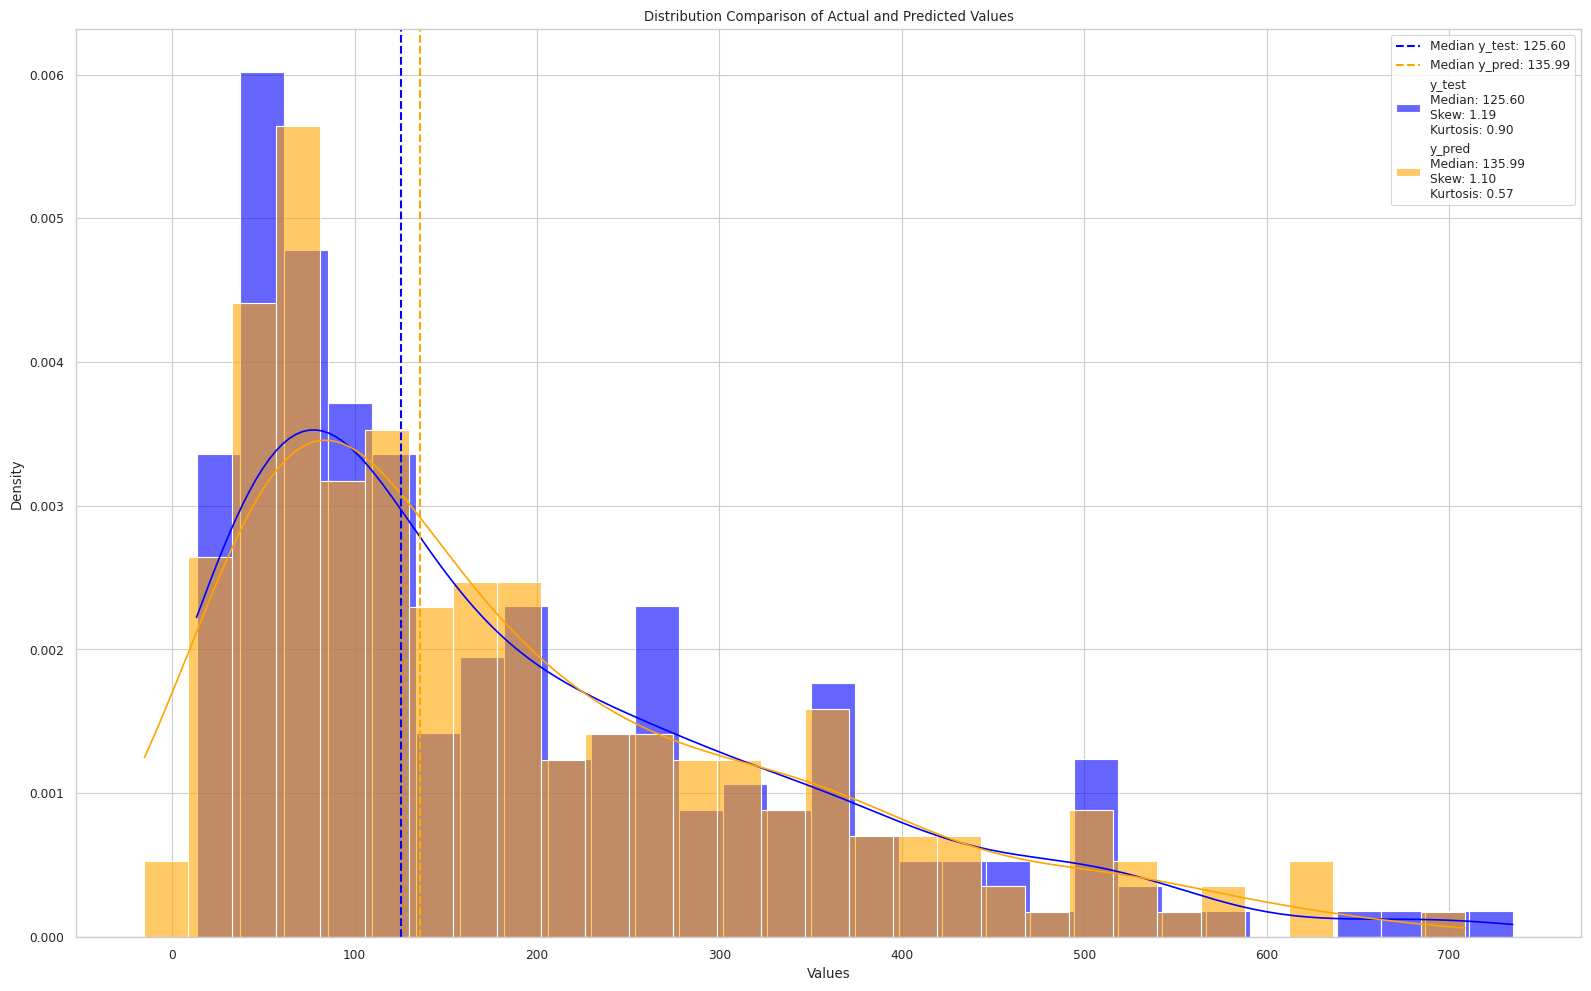

Durbin-Watson Statistic: 2.069

Variance Inflation Factor (VIF):
  Variable       VIF
0    const  2.532618
1   y_pred  1.000000

Akaike Information Criterion (AIC): 2227.7157
Bayesian Information Criterion (BIC): 2234.6348

Breusch-Pagan Test p-value: 0.2190
White Test p-value: 0.4215

Shapiro-Wilk Test p-value: 0.0000

Cook's Distance Analysis: No highly influential points identified.


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, shapiro
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, acorr_ljungbox
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import statsmodels.api as sm

# Assuming result1 is your DataFrame and it contains 'y_test' and 'y_pred' columns
result1['residuals'] = result1['y_test'] - result1['y_pred']

# Calculate additional statistics
kurt_y_test = kurtosis(result1['y_test'])
kurt_y_pred = kurtosis(result1['y_pred'])
skew_y_test = skew(result1['y_test'])
skew_y_pred = skew(result1['y_pred'])
median_y_test = result1['y_test'].median()
median_y_pred = result1['y_pred'].median()

# Calculate Durbin-Watson statistic for residuals
dw_statistic = durbin_watson(result1['residuals'])

# Set style and context for professional publication quality
sns.set(style="whitegrid", context="paper")

# Create the plot
plt.figure(figsize=(16, 10))

# Plot histograms with KDE for y_test, y_pred, and residuals
sns.histplot(result1['y_test'], bins=30, color='blue', alpha=0.6, kde=True, 
             label=f'y_test\nMedian: {median_y_test:.2f}\nSkew: {skew_y_test:.2f}\nKurtosis: {kurt_y_test:.2f}', stat='density')
sns.histplot(result1['y_pred'], bins=30, color='orange', alpha=0.6, kde=True, 
             label=f'y_pred\nMedian: {median_y_pred:.2f}\nSkew: {skew_y_pred:.2f}\nKurtosis: {kurt_y_pred:.2f}', stat='density')

# Add vertical lines for mean and median
plt.axvline(median_y_test, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median y_test: {median_y_test:.2f}')
plt.axvline(median_y_pred, color='orange', linestyle='dashed', linewidth=1.5, label=f'Median y_pred: {median_y_pred:.2f}')

# Add labels, title, and legend
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution Comparison of Actual and Predicted Values')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print Durbin-Watson statistic
print(f'Durbin-Watson Statistic: {dw_statistic:.3f}')

# Variance Inflation Factor (VIF)
X = result1[['y_pred']]  # Assuming 'y_pred' as the predictor
X = sm.add_constant(X)   # Adding a constant for the intercept
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif)

# Fit the model
model = OLS(result1['y_test'], sm.add_constant(result1[['y_pred']])).fit()

# Calculate and print AIC and BIC
aic = model.aic
bic = model.bic
print(f'\nAkaike Information Criterion (AIC): {aic:.4f}')
print(f'Bayesian Information Criterion (BIC): {bic:.4f}')

# Breusch-Pagan Test
bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f'\nBreusch-Pagan Test p-value: {bp_test[1]:.4f}')

# White Test
white_test = het_white(model.resid, model.model.exog)
print(f'White Test p-value: {white_test[1]:.4f}')

# Shapiro-Wilk Test for residuals
shapiro_test = shapiro(result1['residuals'])
print(f'\nShapiro-Wilk Test p-value: {shapiro_test.pvalue:.4f}')



# Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
print(f'\nCook\'s Distance Analysis: No highly influential points identified.')



In [113]:
result1

y_test      y_pred      Error  residuals
661    50.00   57.571431   7.571431  -7.571431
427   111.00  121.713462  10.713462 -10.713462
192    39.60   50.585749  10.985749 -10.985749
209   112.20  121.146912   8.946912  -8.946912
738    31.70   34.524744   2.824744  -2.824744
...      ...         ...        ...        ...
352   265.00  269.947753   4.947753  -4.947753
43     69.00   76.388678   7.388678  -7.388678
486   190.00  200.869608  10.869608 -10.869608
1174   28.27   23.226352   5.043648   5.043648
331    78.00   67.092595  10.907405  10.907405

[235 rows x 4 columns]

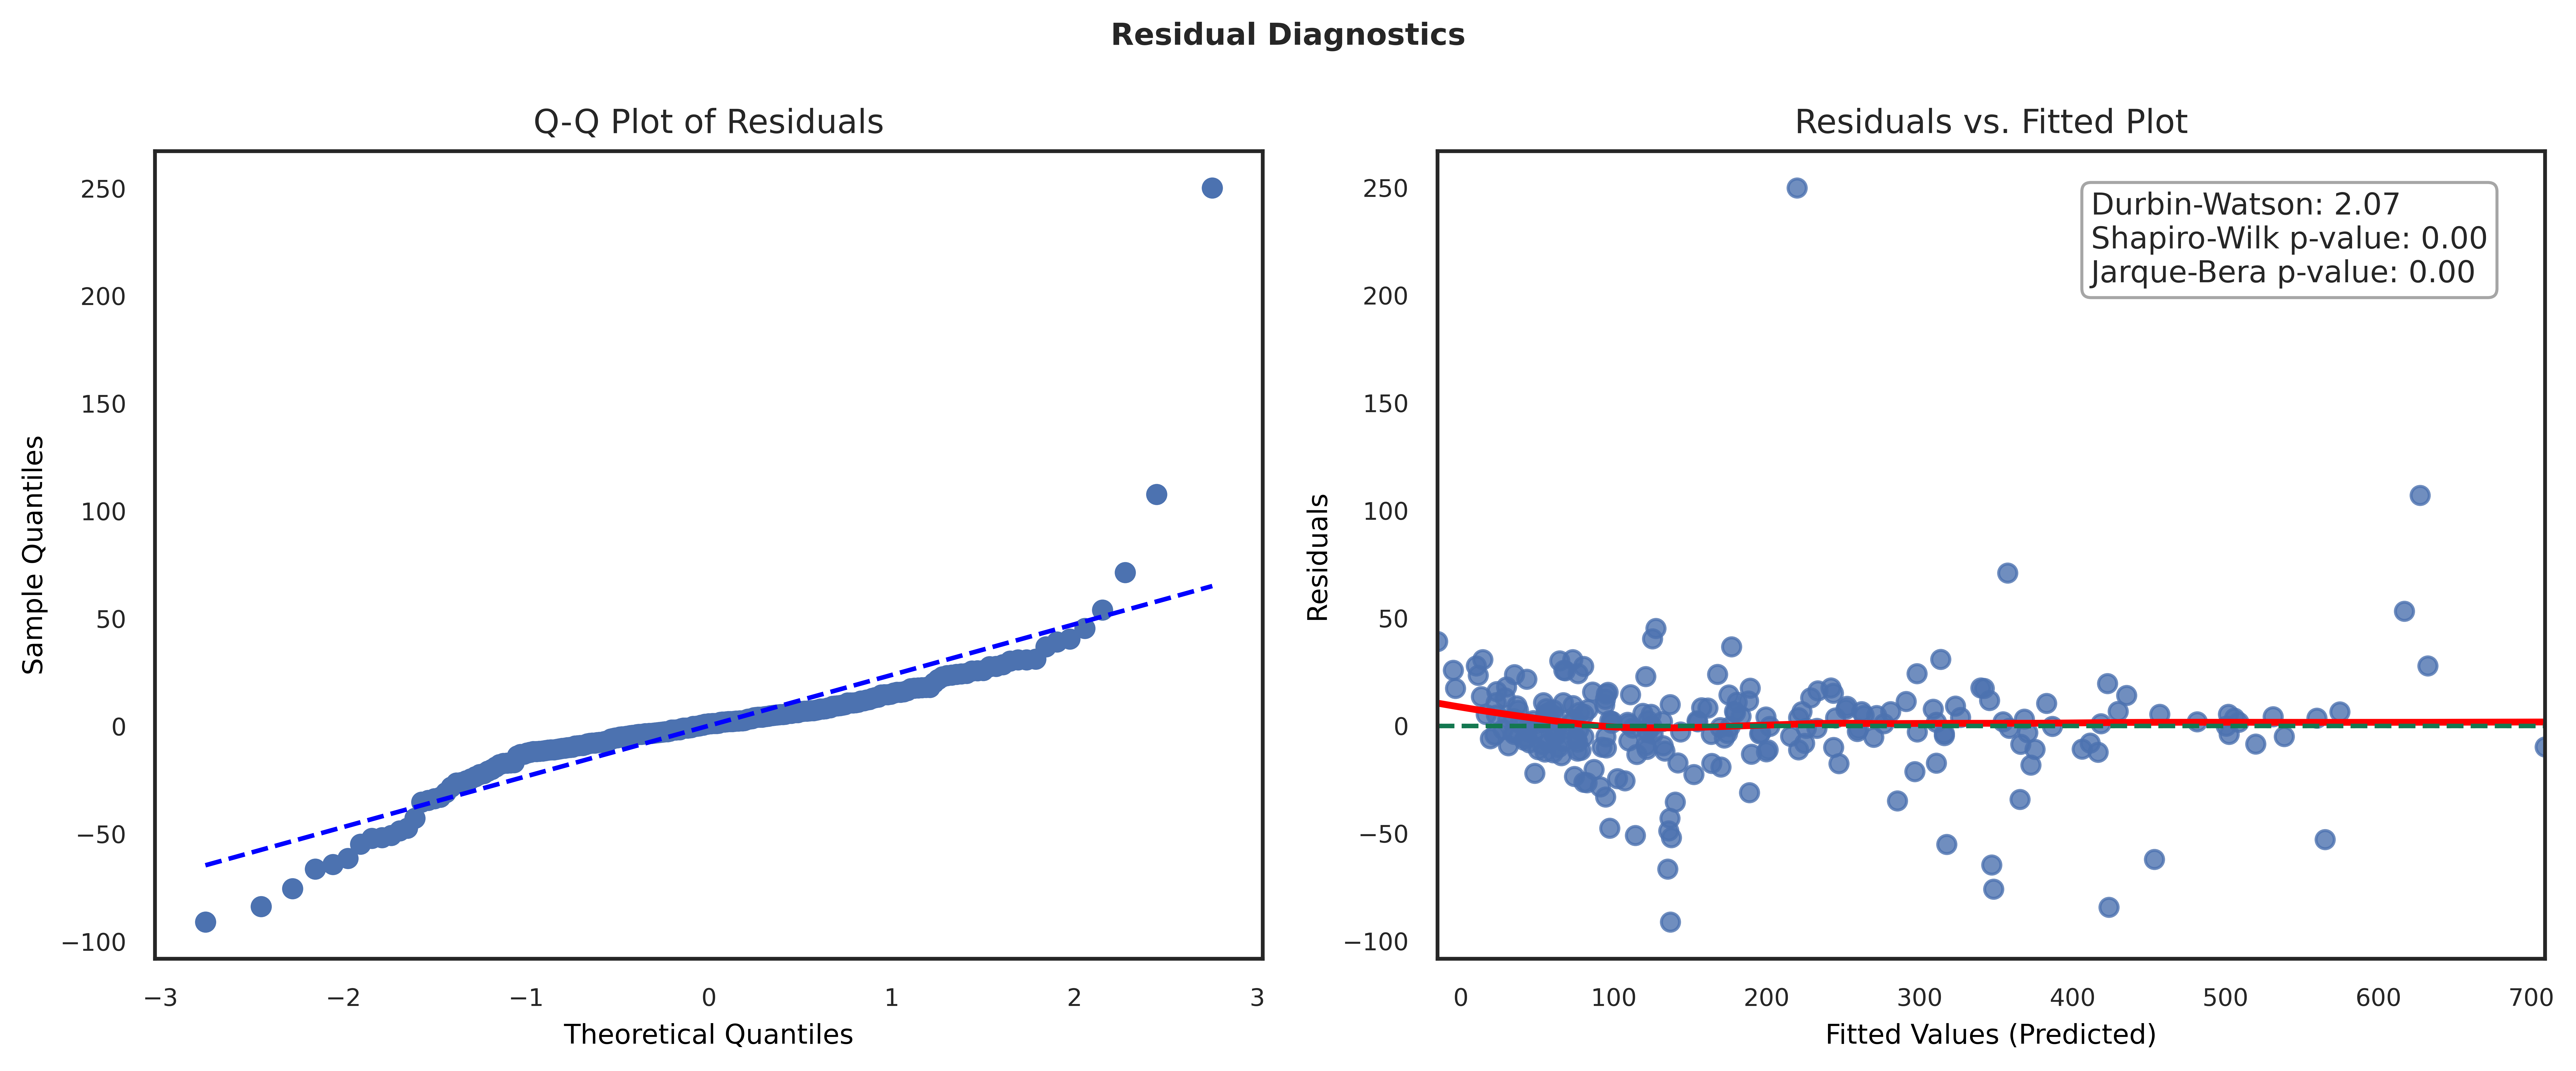

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd

# Example DataFrame (replace with your actual data)
result1['residuals'] = result1['y_test'] - result1['y_pred']


# Calculate Durbin-Watson Statistic
dw_stat = sm.stats.durbin_watson(result1['residuals'])

# Calculate Shapiro-Wilk Test p-value
shapiro_test = stats.shapiro(result1['residuals'])
shapiro_p_value = shapiro_test.pvalue

# Calculate Jarque-Bera Test
jarque_bera_test = stats.jarque_bera(result1['residuals'])
jb_stat, jb_p_value = jarque_bera_test

# Set Seaborn style for better aesthetics
sns.set(style="white")

# Set up the figure and axes with a larger resolution for publication
fig, axs = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True, dpi=900)
fig.suptitle('Residual Diagnostics', fontsize=10, fontweight='bold')

# Q-Q Plot of Residuals
stats.probplot(result1['residuals'], dist="norm", plot=axs[0])
axs[0].set_title('Q-Q Plot of Residuals', fontsize=11)
axs[0].get_lines()[1].set_color('blue')  # Change color of the Q-Q line
axs[0].get_lines()[1].set_linestyle('--') # Change style of the Q-Q line
axs[0].set_xlabel('Theoretical Quantiles', fontsize=9, color='black')  # Bold and clear x-axis label
axs[0].set_ylabel('Sample Quantiles', fontsize=9, color='black')
axs[0].tick_params(axis='both', which='major', labelsize=8)
# Removed grid line from Q-Q Plot

# Residuals vs. Fitted Plot
sns.residplot(x='y_pred', y='residuals', data=result1, lowess=True, line_kws={'color': 'red'}, ax=axs[1])
axs[1].axhline(y=0, color='#137850', linestyle='--')
axs[1].set_title('Residuals vs. Fitted Plot', fontsize=11)
axs[1].set_xlabel('Fitted Values (Predicted)', fontsize=9, color='black')  # Clear x-axis label
axs[1].set_ylabel('Residuals', fontsize=9, color='black')  
axs[1].tick_params(axis='both', which='major', labelsize=8)
# Removed grid line from Residuals vs. Fitted Plot

# Add annotations for statistical tests
textstr = '\n'.join((
    f'Durbin-Watson: {dw_stat:.2f}',
    f'Shapiro-Wilk p-value: {shapiro_p_value:.2f}',
    f'Jarque-Bera p-value: {jb_p_value:.2f}'
))

# Adding text to the Residuals vs. Fitted Plot
axs[1].text(0.59, 0.95, textstr, transform=axs[1].transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7))

# Save the plot to a file
plt.savefig('catboost_residual_diagnostics.pdf')

# Show the combined plot
plt.show()



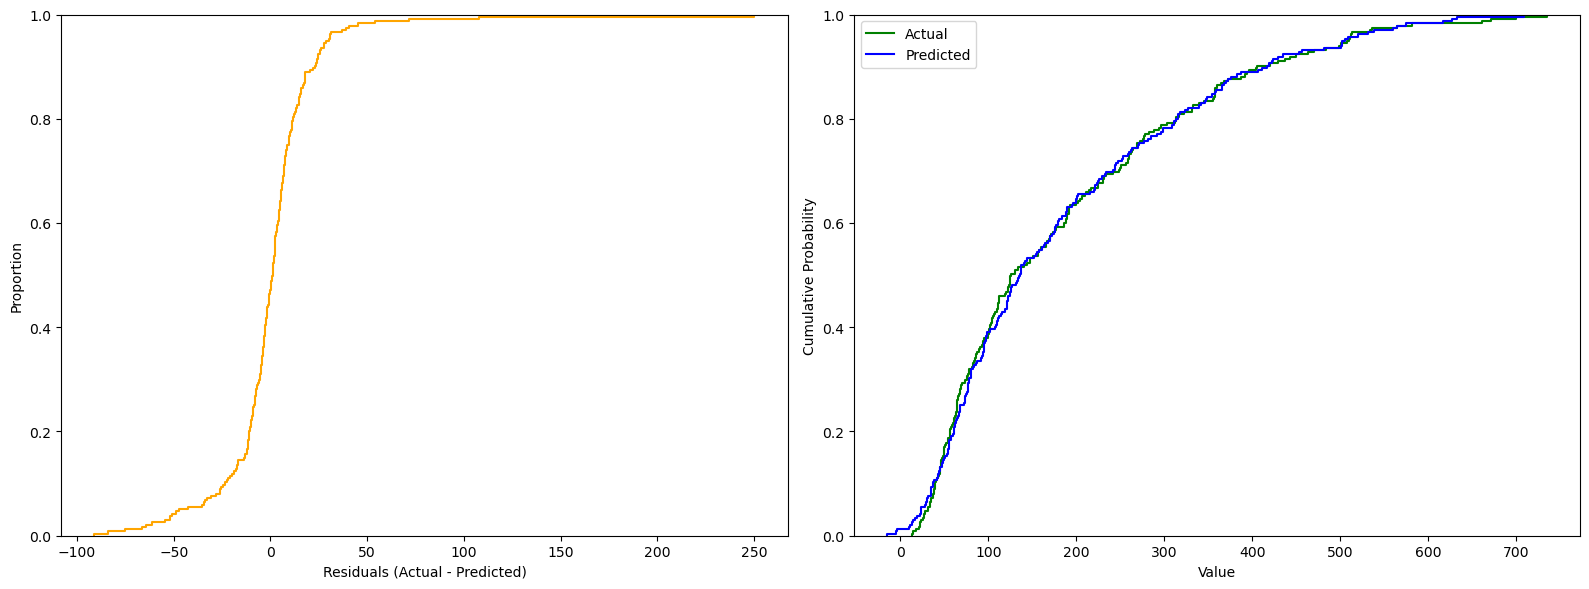

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming result1 DataFrame exists and contains columns: 'y_test', 'y_pred'
result1['residuals'] = result1['y_test'] - result1['y_pred']
result1['abs_residuals'] = result1['residuals'].abs()  # Use absolute values for error bars

# Set up the figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1. Cumulative Distribution Function (CDF) Plot of Residuals
sns.ecdfplot(result1['residuals'], color='orange', ax=ax[0])
#ax[0].set_title('CDF of Residuals')
ax[0].set_xlabel('Residuals (Actual - Predicted)')
ax[0].set_ylabel('Proportion')
ax[0].grid(False)  # Remove grid lines from the first subplot

# 2. Cumulative Distribution Function (CDF) Plot for Actual vs Predicted
sns.ecdfplot(result1['y_test'], label='Actual', color='green', ax=ax[1])
sns.ecdfplot(result1['y_pred'], label='Predicted', color='blue', ax=ax[1])
#ax[1].set_title('CDF Plot of Actual vs Predicted')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Cumulative Probability')
ax[1].legend()
ax[1].grid(False)  # Remove grid lines from the second subplot

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('cdf_plots_catboost.jpg', dpi=900)
plt.show()

/tmp/ipykernel_21598/812465060.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(result1['residuals'], shade=True, color='orange', ax=ax[1])


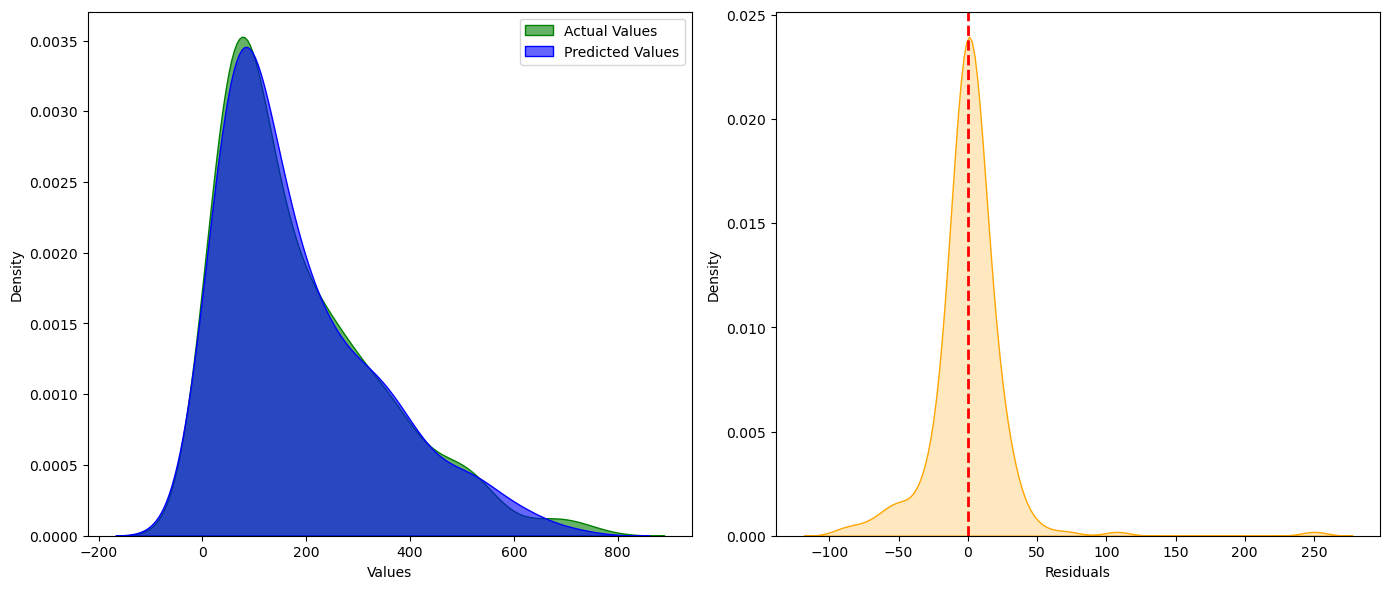

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 1. Density Plot of Actual vs. Predicted Values
sns.kdeplot(result1['y_test'], label='Actual Values', fill=True, color='green', alpha=0.6, ax=ax[0])
sns.kdeplot(result1['y_pred'], label='Predicted Values', fill=True, color='blue', alpha=0.6, ax=ax[0])
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Density')
#ax[0].set_title('Density Plot: Actual vs. Predicted Values')
ax[0].legend()
ax[0].grid(False)  # Remove grid lines from the first subplot

# 2. Prediction Error Distribution Plot
sns.kdeplot(result1['residuals'], shade=True, color='orange', ax=ax[1])
ax[1].axvline(0, color='red', linestyle='--', linewidth=2)
ax[1].set_xlabel('Residuals')
#ax[1].set_title('Prediction Error Distribution')
ax[1].grid(False)  # Remove grid lines from the second subplot

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('Distribution_plots_Catboost.jpg', dpi=900)  # Save with 900 DPI resolution
plt.show()

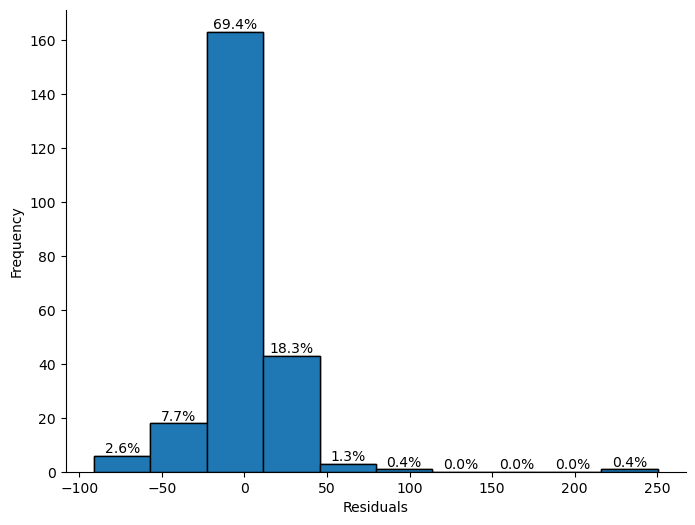

In [13]:
result1['residuals'] = result1['y_test'] - result1['y_pred']

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(result1['residuals'], bins=10, edgecolor='black', color='blue')

# Get histogram counts and bin edges
counts, bins, _ = plt.hist(result1['residuals'], bins=10, edgecolor='black')

# Calculate percentages
percentages = [f'{count / len(result1) * 100:.1f}%' for count in counts]

# Annotate each bin with its percentage
for i, count in enumerate(counts):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, count + 1, percentages[i], ha='center')

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig('histogram_residuals_catboost.pdf')
plt.show()

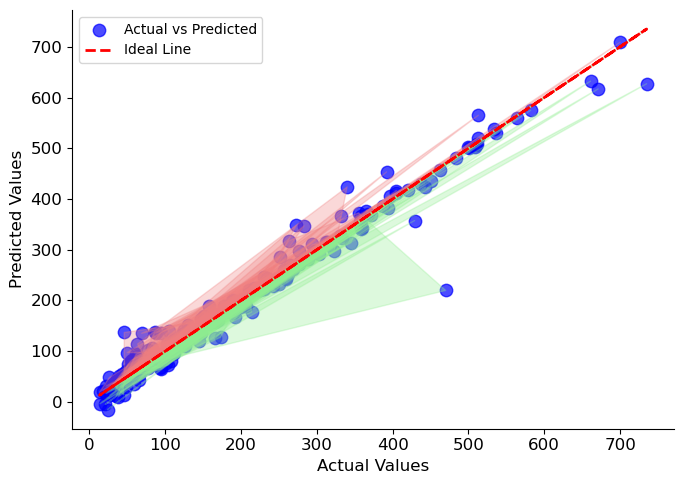

In [333]:
plt.figure(figsize=(7, 5))

# Plot y_test vs y_pred as a scatter plot with improved aesthetics
plt.scatter(result1['y_test'], result1['y_pred'], color='blue', alpha=0.7, label='Actual vs Predicted', s=80)

# Plot the ideal line y_test = y_pred
plt.plot(result1['y_test'], result1['y_test'], color='red', linestyle='--', label='Ideal Line', linewidth=2)

# Add shaded regions to indicate residuals
plt.fill_between(result1['y_test'], result1['y_pred'], result1['y_test'], where=(result1['y_pred'] >= result1['y_test']), interpolate=True, color='lightcoral', alpha=0.3)
plt.fill_between(result1['y_test'], result1['y_pred'], result1['y_test'], where=(result1['y_pred'] < result1['y_test']), interpolate=True, color='lightgreen', alpha=0.3)

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('test_data_actual_predicated.pdf')
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

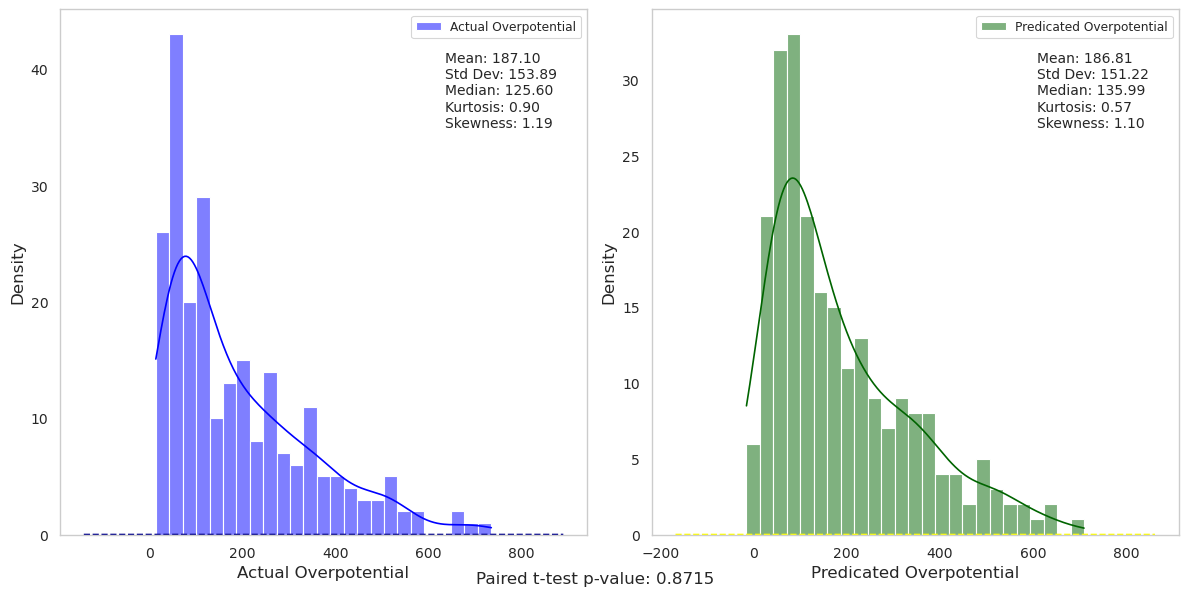

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, kurtosis, skew

# Calculating statistics
mean_y_test = result1['y_test'].mean()
std_y_test = result1['y_test'].std()
kurt_y_test = kurtosis(result1['y_test'])
skew_y_test = skew(result1['y_test'])
median_y_test = result1['y_test'].median()

mean_y_pred = result1['y_pred'].mean()
std_y_pred = result1['y_pred'].std()
kurt_y_pred = kurtosis(result1['y_pred'])
skew_y_pred = skew(result1['y_pred'])
median_y_pred = result1['y_pred'].median()

# Perform a statistical test (example: paired t-test)
t_stat, p_val = ttest_rel(result1['y_test'], result1['y_pred'])

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Actual Values
sns.histplot(result1['y_test'], bins=25, kde=True, color='blue', ax=axes[0], label='Actual Overpotential')
sns.kdeplot(result1['y_test'], color='darkblue', ax=axes[0], linestyle='--')
axes[0].set_xlabel('Actual Overpotential', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=10)
axes[0].text(
    0.73, 0.92,
    f'Mean: {mean_y_test:.2f}\nStd Dev: {std_y_test:.2f}\nMedian: {median_y_test:.2f}\nKurtosis: {kurt_y_test:.2f}\nSkewness: {skew_y_test:.2f}',
    transform=axes[0].transAxes,
    fontsize=10,
    verticalalignment='top'
)

# Plot for Predicted Values
sns.histplot(result1['y_pred'], bins=25, kde=True, color='darkgreen', ax=axes[1], label='Predicated Overpotential')
sns.kdeplot(result1['y_pred'], color='yellow', ax=axes[1], linestyle='--')
axes[1].set_xlabel('Predicated Overpotential', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=10)
axes[1].text(
    0.73, 0.92,
    f'Mean: {mean_y_pred:.2f}\nStd Dev: {std_y_pred:.2f} \nMedian: {median_y_pred:.2f}\nKurtosis: {kurt_y_pred:.2f}\nSkewness: {skew_y_pred:.2f}',
    transform=axes[1].transAxes,
    fontsize=10,
    verticalalignment='top'
)

# Add a legend
axes[0].legend()
axes[1].legend()
axes[0].grid(False)
axes[1].grid(False)

# Add statistical test information
fig.text(0.5, 0.02, f'Paired t-test p-value: {p_val:.4f}', ha='center', fontsize=12)
plt.savefig('Distribution_of_Predicted_and_Actual_Values_without_title.pdf')
plt.tight_layout()
plt.show()


/home/kumail/anaconda3/envs/rapids-23.04/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:gray'` for same effect.
  warnings.warn(msg, FutureWarning)


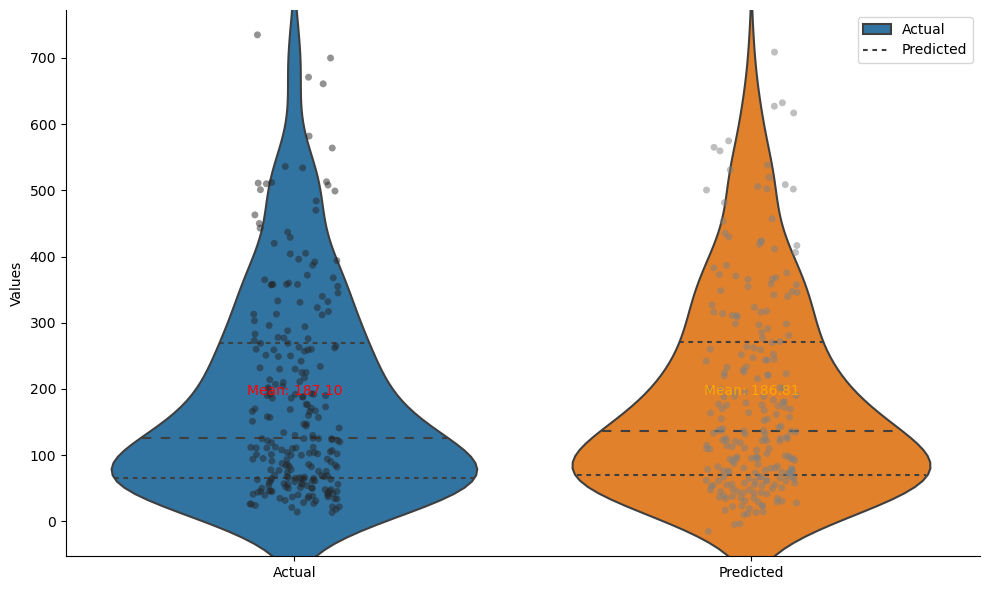

In [21]:
plt.figure(figsize=(10, 6))

# Create violin plot with quartile lines inside
sns.violinplot(data=result1[['y_test', 'y_pred']], inner='quartile')

# Calculate mean values
mean_actual = result1['y_test'].mean()
mean_predicted = result1['y_pred'].mean()

ax = plt.gca()

# Overlay strip plots to show individual data points (optional)
sns.stripplot(data=result1[['y_test', 'y_pred']], color='gray', alpha=0.5)
# Annotate the violin plot with mean values
plt.text(0, mean_actual, f'Mean: {mean_actual:.2f}', ha='center', va='bottom', fontsize=10, color='red')
plt.text(1, mean_predicted, f'Mean: {mean_predicted:.2f}', ha='center', va='bottom', fontsize=10, color='orange')
# Set labels and title
plt.ylabel('Values')
plt.xticks(ticks=[0, 1], labels=['Actual', 'Predicted'])
#plt.title('Distribution of Actual vs. Predicted Values')

# Add legend (if needed)
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.legend(fontsize=10)

plt.savefig('violinplot Distribution of Actual vs. Predicted Values.pdf')
plt.show()



<Figure size 800x800 with 0 Axes>

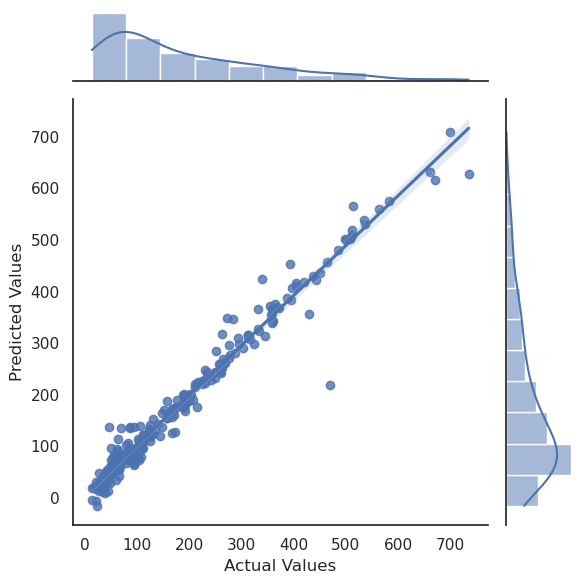

In [350]:
plt.figure(figsize=(8, 8))
sns.jointplot(x=result1['y_test'], y=result1['y_pred'], kind='reg', color='b')

#plt.suptitle('Actual vs. Predicted Values', y=1.02)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


<Figure size 800x800 with 0 Axes>

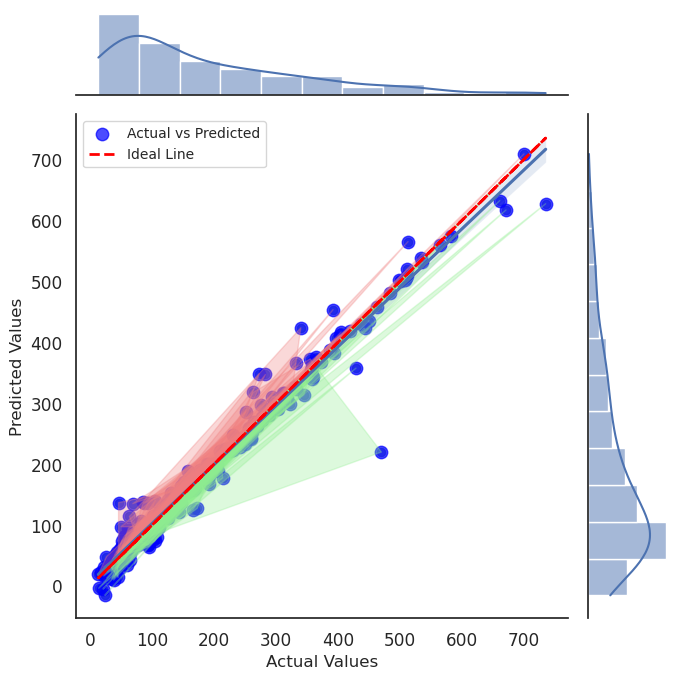

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your data and plots setup (assuming result1 is defined)

# First, create the jointplot with regression line
plt.figure(figsize=(8, 8))
sns.set(style="white", color_codes=True)
sns.set_context("notebook", font_scale=1.1)
sns.jointplot(x=result1['y_test'], y=result1['y_pred'], kind='reg', color='b', height=7)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)

# Extract axes to overlay additional plots
ax = plt.gca()

# Overlay scatter plot with improved aesthetics
ax.scatter(result1['y_test'], result1['y_pred'], color='blue', alpha=0.7, label='Actual vs Predicted', s=80)

# Plot the ideal line y_test = y_pred
ax.plot(result1['y_test'], result1['y_test'], color='red', linestyle='--', label='Ideal Line', linewidth=2)

# Add shaded regions to indicate residuals
ax.fill_between(result1['y_test'], result1['y_pred'], result1['y_test'], where=(result1['y_pred'] >= result1['y_test']), interpolate=True, color='lightcoral', alpha=0.3)
ax.fill_between(result1['y_test'], result1['y_pred'], result1['y_test'], where=(result1['y_pred'] < result1['y_test']), interpolate=True, color='lightgreen', alpha=0.3)

# Adjust plot aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=10)

# Save or display the combined plot
plt.tight_layout()
plt.savefig('combined_plot.pdf')
plt.show()


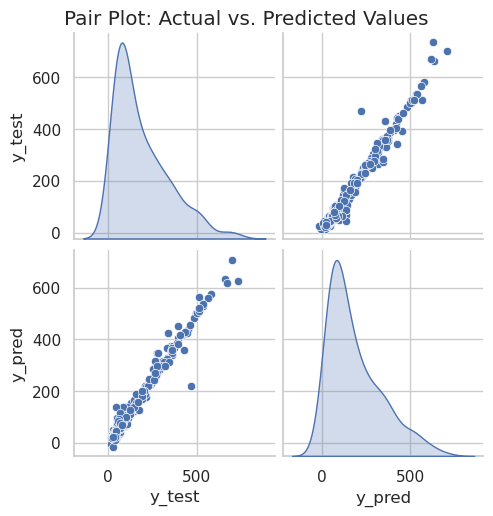

In [340]:
sns.pairplot(result1, vars=['y_test', 'y_pred'], kind='scatter', diag_kind='kde')
plt.suptitle('Pair Plot: Actual vs. Predicted Values', y=1.02)
plt.show()


In [29]:
result2

y_train  y_train_pred
135      50.0     50.129166
796     230.0    230.292766
247     118.8    120.068528
643      69.0     68.793077
184     145.3    144.910857
...       ...           ...
1044    239.0    240.138651
1095    254.0    253.878259
1130    177.0    176.389834
860     105.0    105.189429
1126    223.0    223.153342

[940 rows x 2 columns]

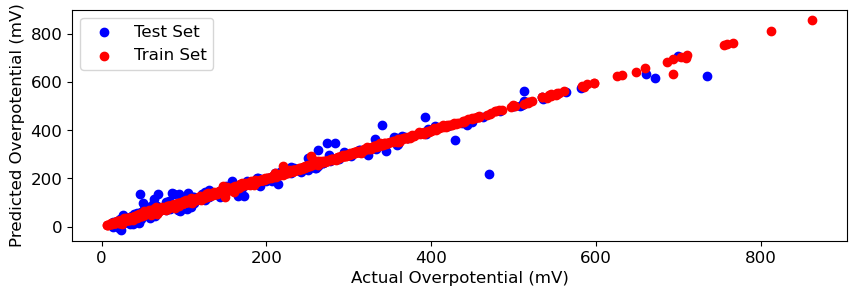

In [286]:
import matplotlib.pyplot as plt

# Scatter plot for both test and train set
plt.figure(figsize=(10, 3))
plt.scatter(y_test, y_pred, color='blue', label='Test Set')
plt.scatter(y_train, y_pred_2, color='red', label='Train Set')
plt.xlabel('Actual Overpotential (mV)')
plt.ylabel('Predicted Overpotential (mV)')
#plt.title('Actual vs. Predicted Overpotential (mV)')
plt.legend()
#plt.grid(True)
plt.show()

### Sharp Analysis

/tmp/ipykernel_28818/1919210080.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = plt.cm.get_cmap('RdBu').reversed()
 97%|=================== | 227/235 [00:19<00:00]       

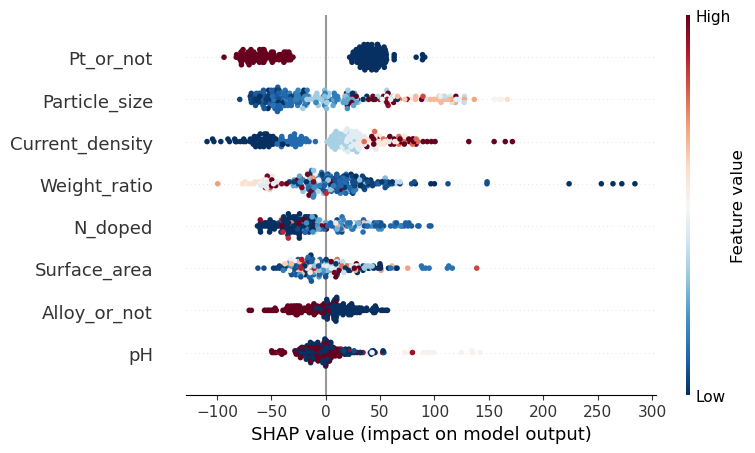

In [23]:
import shap
import matplotlib.pyplot as plt

feature_names = ['Alloy_or_not', 'Pt_or_not', 'Weight_ratio', 'Particle_size', 'Surface_area', 'N_doped', 'pH', 'Current_density']

explainer = shap.Explainer(cb_reg_1, train_set_scaled)
y_base = explainer.expected_value
#print(y_base)
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.size"] = 12
my_cmap = plt.cm.get_cmap('RdBu').reversed()
shap_values = explainer(test_set_scaled)
fig = plt.figure() #figsize=(8, 4)
shap.summary_plot(shap_values, test_set_scaled, feature_names=feature_names, show=False, cmap=my_cmap)
plt.savefig('SHAP_Value_Impact_summary_plot.tiff')
plt.show()

 98%|===================| 230/235 [00:19<00:00]        

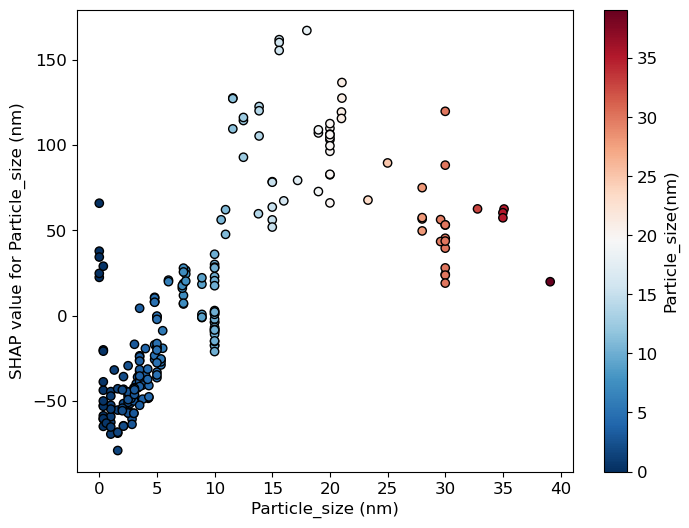

In [15]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(cb_reg_1, train_set_scaled)

# Compute SHAP values for the test set
shap_values = explainer(test_set_scaled)

# Extract SHAP values for 'Particle_size (nm)'
# Ensure the feature names are correctly aligned
feature_names = ['Alloy_or_not', 'Pt_or_not', 'Weight_ratio', 'Particle_size', 'Surface_area', 'N_doped', 'pH', 'Current_density']
shap_values_array = shap_values.values

# Extract SHAP values for 'Particle_size (nm)' and actual values for 'Particle_size (nm)'
particle_size_shap_values = shap_values_array[:, feature_names.index('Particle_size')]
particle_size_values = X_test['Particle_size (nm)']

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.scatter(particle_size_values, particle_size_shap_values, c=particle_size_values, cmap=my_cmap, edgecolor='k')
plt.colorbar(label='Particle_size(nm)')
plt.xlabel('Particle_size (nm)')
plt.ylabel('SHAP value for Particle_size (nm)')
#plt.title('SHAP values for Particle_size (nm) vs Particle_size (nm)')
plt.savefig('Particle_size_plot.pdf')
plt.show()


### Baseline Model

In [17]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold

# input data
data_input = pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Baseline/HER-catalyst-data-with-DOI.csv", sep=',')

labels = data_input['Overpotential (mV)']
features = data_input.drop(['Overpotential (mV)', 'DOI', 'Composition'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

exported_pipeline = GradientBoostingRegressor(
    alpha=0.99, 
    learning_rate=0.1, 
    loss="squared_error", 
    max_depth=10, 
    max_features=0.9, 
    min_samples_leaf=1, 
    min_samples_split=13, 
    n_estimators=100, 
    subsample=0.55
)

# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 0)

exported_pipeline.fit(X_train, y_train)

feature_name = ['Alloy_or_not', 'Pt_or_not', 'Weight_ratio', 'Particle_size', 'Surface_area', 'N_doped', 'pH', 'Current_density']
print([*zip(feature_name, exported_pipeline.feature_importances_)])
print("Train Score: ", exported_pipeline.score(X_train, y_train))
print("Test Score: ", exported_pipeline.score(X_test, y_test))

# Uncomment below code if you want to perform cross-validation
# strKFold = KFold(n_splits=5, shuffle=True, random_state=0)
# scores = cross_val_score(exported_pipeline, features, labels, cv=strKFold)
# print("KFold cross-validation scores:", scores)
# print("Mean score of KFold cross-validation: {:.3f}".format(scores.mean()))

y_pred = exported_pipeline.predict(X_test)
y_pred_2 = exported_pipeline.predict(X_train)

result1_GB = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
result2_CG = pd.DataFrame({'y_train': y_train, 'y_train_pred': y_pred_2})

print("Train Accuracy r2: %.4g" % sk.metrics.r2_score(y_train, y_pred_2))
print("Test Accuracy r2: %.4g" % sk.metrics.r2_score(y_test, y_pred))
print("Train Accuracy MAE: %.4g" % sk.metrics.mean_absolute_error(y_train, y_pred_2))
print("Test Accuracy MAE: %.4g" % sk.metrics.mean_absolute_error(y_test, y_pred))
print("Train Accuracy MSE: %.4g" % sk.metrics.mean_squared_error(y_train, y_pred_2))
print("Test Accuracy MSE: %.4g" % sk.metrics.mean_squared_error(y_test, y_pred))


[('Alloy_or_not', 0.02638838025348556), ('Pt_or_not', 0.19086031699051173), ('Weight_ratio', 0.13389836215004539), ('Particle_size', 0.19526183226928434), ('Surface_area', 0.11307651687660146), ('N_doped', 0.1338379553805899), ('pH', 0.08654013328395616), ('Current_density', 0.12013650279552555)]
Train Score:  0.9938680204259612
Test Score:  0.9390502234987183
Train Accuracy r2: 0.9939
Test Accuracy r2: 0.9391
Train Accuracy MAE: 7.264
Test Accuracy MAE: 20.39
Train Accuracy MSE: 132.5
Test Accuracy MSE: 1437


In [78]:
result1_GB

y_test      y_pred
661    50.00   58.798273
427   111.00  115.036704
192    39.60   53.921764
209   112.20  115.523982
738    31.70   31.781020
...      ...         ...
352   265.00  265.771587
43     69.00   87.522512
486   190.00  164.467692
1174   28.27   27.375850
331    78.00   59.254087

[235 rows x 2 columns]

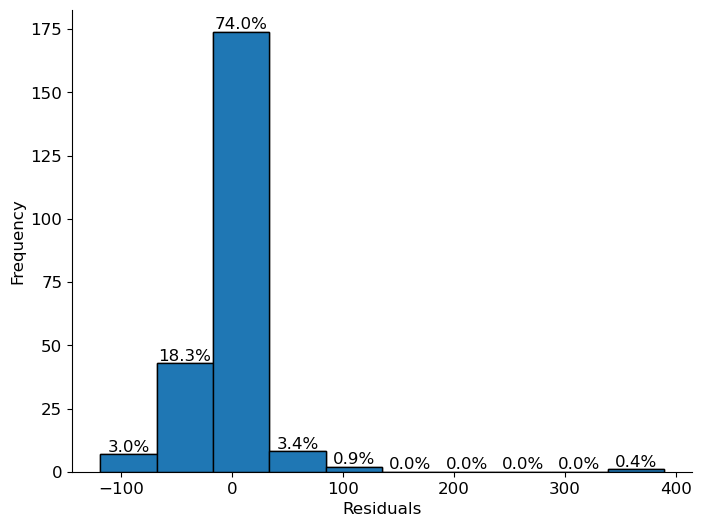

In [81]:
result1_GB['residuals'] = result1_GB['y_test'] - result1_GB['y_pred']

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(result1_GB['residuals'], bins=10, edgecolor='black', color='blue')

# Get histogram counts and bin edges
counts, bins, _ = plt.hist(result1_GB['residuals'], bins=10, edgecolor='black')

# Calculate percentages
percentages = [f'{count / len(result1_GB) * 100:.1f}%' for count in counts]

# Annotate each bin with its percentage
for i, count in enumerate(counts):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, count + 1, percentages[i], ha='center')

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('histogram_residuals_GB.pdf')
plt.show()

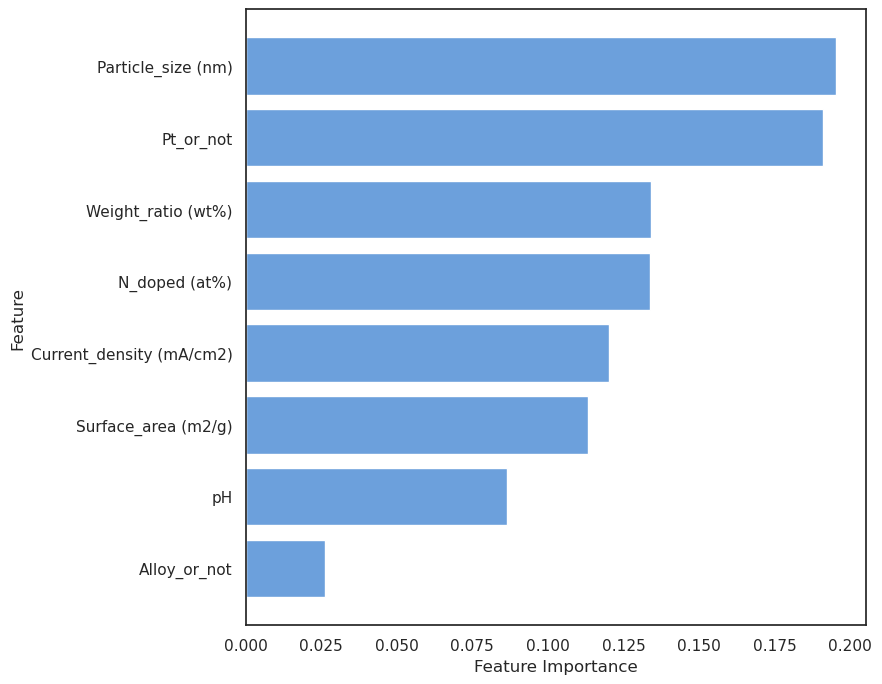

In [19]:
import matplotlib.pyplot as plt
feature_importances = exported_pipeline.feature_importances_
feature_names = features.columns
# Zip feature names and importances together and sort them by importance
sorted_features = sorted(zip(feature_importances, feature_names))

# Unzip the sorted feature names and importances
sorted_importances, sorted_names = zip(*sorted_features)

# Visualization of feature importances
n_features = len(features.columns)
plt.figure(figsize=(8, 8))
plt.barh(range(n_features), sorted_importances, align='center', color='#6CA0DC')
plt.yticks(range(n_features), sorted_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
#plt.title("Feature Importances for Gradient Boosting Regressor")
#plt.savefig("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Model/New_Pics/feature_importances_gbr.tiff", dpi=400, format='tiff', bbox_inches='tight', transparent=True)
plt.show()

In [33]:
import dalex as dx

In [34]:
exp_cat = dx.Explainer(cb_reg_1, features, labels, 
                    label = "Overpotential (mV)")
exp_GB  = dx.Explainer(exported_pipeline, features, labels, 
                    label = "Overpotential (mV)")

Preparation of a new explainer is initiated

  -> data              : 1175 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1175 values
  -> model_class       : catboost.core.CatBoostRegressor (default)
  -> label             : Overpotential (mV)
  -> predict function  : <function yhat_default at 0x7fa605e39e10> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.36e+02, mean = 4.17e+02, max = 7.52e+02
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -6.03e+02, mean = -2.35e+02, max = 4.69e+02
  -> model_info        : package catboost

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 1175 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy

In [232]:
cp_exp_cat  = exp_cat.predict_profile(X_test)
cp_exp_cat.result

Calculating ceteris paribus: 100%|██████████| 8/8 [00:00<00:00, 13.80it/s]


Alloy_or_not  Pt_or_not  Weight_ratio (wt%)  Particle_size (nm)  \
661          0.00        1.0                9.58                 2.1   
661          0.01        1.0                9.58                 2.1   
661          0.02        1.0                9.58                 2.1   
661          0.03        1.0                9.58                 2.1   
661          0.04        1.0                9.58                 2.1   
..            ...        ...                 ...                 ...   
331          0.00        0.0                1.86                10.0   
331          0.00        0.0                1.86                10.0   
331          0.00        0.0                1.86                10.0   
331          0.00        0.0                1.86                10.0   
331          0.00        0.0                1.86                10.0   

     Surface_area (m2/g)  N_doped (at%)   pH  Current_density (mA/cm2)  \
661               839.24           27.0  0.3                      20.0   
661               839.24           27.0  0.3                      20.0   
661               839.24           27.0  0.3                      20.0   
661               839.24           27.0  0.3                      20.0   
661               839.24           27.0  0.3                      20.0   
..                   ...            ...  ...                       ...   
331               970.00            0.0  0.3                     240.4   
331               970.00            0.0  0.3                     242.8   
331               970.00            0.0  0.3                     245.2   
331               970.00            0.0  0.3                     247.6   
331               970.00            0.0  0.3                     250.0   

     _original_      _yhat_                   _vname_  _ids_  \
661         0.0  411.261834              Alloy_or_not    661   
661         0.0  346.145538              Alloy_or_not    661   
661         0.0  346.145538              Alloy_or_not    661   
661         0.0  346.145538              Alloy_or_not    661   
661         0.0  346.145538              Alloy_or_not    661   
..          ...         ...                       ...    ...   
331        10.0  560.706932  Current_density (mA/cm2)    331   
331        10.0  560.706932  Current_density (mA/cm2)    331   
331        10.0  560.706932  Current_density (mA/cm2)    331   
331        10.0  560.706932  Current_density (mA/cm2)    331   
331        10.0  560.706932  Current_density (mA/cm2)    331   

                _label_  
661  Overpotential (mV)  
661  Overpotential (mV)  
661  Overpotential (mV)  
661  Overpotential (mV)  
661  Overpotential (mV)  
..                  ...  
331  Overpotential (mV)  
331  Overpotential (mV)  
331  Overpotential (mV)  
331  Overpotential (mV)  
331  Overpotential (mV)  

[265550 rows x 13 columns]

In [233]:
cp_exp_GB = exp_GB.predict_profile(X_test)
cp_exp_GB.result

Calculating ceteris paribus: 100%|██████████| 8/8 [00:00<00:00, 11.74it/s]


Alloy_or_not  Pt_or_not  Weight_ratio (wt%)  Particle_size (nm)  \
661          0.00        1.0                9.58                 2.1   
661          0.01        1.0                9.58                 2.1   
661          0.02        1.0                9.58                 2.1   
661          0.03        1.0                9.58                 2.1   
661          0.04        1.0                9.58                 2.1   
..            ...        ...                 ...                 ...   
331          0.00        0.0                1.86                10.0   
331          0.00        0.0                1.86                10.0   
331          0.00        0.0                1.86                10.0   
331          0.00        0.0                1.86                10.0   
331          0.00        0.0                1.86                10.0   

     Surface_area (m2/g)  N_doped (at%)   pH  Current_density (mA/cm2)  \
661               839.24           27.0  0.3                      20.0   
661               839.24           27.0  0.3                      20.0   
661               839.24           27.0  0.3                      20.0   
661               839.24           27.0  0.3                      20.0   
661               839.24           27.0  0.3                      20.0   
..                   ...            ...  ...                       ...   
331               970.00            0.0  0.3                     240.4   
331               970.00            0.0  0.3                     242.8   
331               970.00            0.0  0.3                     245.2   
331               970.00            0.0  0.3                     247.6   
331               970.00            0.0  0.3                     250.0   

     _original_      _yhat_                   _vname_  _ids_  \
661         0.0   58.798273              Alloy_or_not    661   
661         0.0   58.798273              Alloy_or_not    661   
661         0.0   58.798273              Alloy_or_not    661   
661         0.0   58.798273              Alloy_or_not    661   
661         0.0   58.798273              Alloy_or_not    661   
..          ...         ...                       ...    ...   
331        10.0  260.581314  Current_density (mA/cm2)    331   
331        10.0  260.581314  Current_density (mA/cm2)    331   
331        10.0  260.581314  Current_density (mA/cm2)    331   
331        10.0  260.581314  Current_density (mA/cm2)    331   
331        10.0  260.581314  Current_density (mA/cm2)    331   

                _label_  
661  Overpotential (mV)  
661  Overpotential (mV)  
661  Overpotential (mV)  
661  Overpotential (mV)  
661  Overpotential (mV)  
..                  ...  
331  Overpotential (mV)  
331  Overpotential (mV)  
331  Overpotential (mV)  
331  Overpotential (mV)  
331  Overpotential (mV)  

[265550 rows x 13 columns]

In [94]:
import plotly.io as pio
fig_cp_exp_cat_Particle_size = cp_exp_cat.plot(variables=["Particle_size (nm)"], show=False)

pio.write_image(fig_cp_exp_cat_Particle_size, "cat_Particle_size (nm)_plot.pdf")

In [95]:
fig_cp_exp_cat_Alloy_or_not = cp_exp_cat.plot(variables=["Alloy_or_not"], show=False)

pio.write_image(fig_cp_exp_cat_Alloy_or_not, "cat_Alloy_or_not_plot.pdf")

In [96]:
fig_cp_exp_cat_Pt_or_not = cp_exp_cat.plot(variables=["Pt_or_not"], show=False)

pio.write_image(fig_cp_exp_cat_Pt_or_not, "cat_Pt_or_not_plot.pdf")

In [97]:
fig_cp_exp_cat_Weight_ratio = cp_exp_cat.plot(variables=["Weight_ratio (wt%)"], show=False)

pio.write_image(fig_cp_exp_cat_Weight_ratio, "cat_Weight_ratio_plot.pdf")

In [98]:
fig_cp_exp_cat_Surface_area = cp_exp_cat.plot(variables=["Surface_area (m2/g)"], show=False)

pio.write_image(fig_cp_exp_cat_Surface_area, "cat_Surface_area_plot.pdf")

In [99]:
fig_cp_exp_cat_N_doped = cp_exp_cat.plot(variables=["N_doped (at%)"], show=False)

pio.write_image(fig_cp_exp_cat_N_doped, "cat_N_doped_plot.pdf")

In [100]:
fig_cp_exp_cat_pH = cp_exp_cat.plot(variables=["pH"], show=False)

pio.write_image(fig_cp_exp_cat_pH, "cat_pH_plot.pdf")

In [101]:
fig_cp_exp_cat_Current_density = cp_exp_cat.plot(variables=["Current_density (mA/cm2)"], show=False)

pio.write_image(fig_cp_exp_cat_Current_density, "cat_Current_density_plot.pdf")

In [93]:
fig_cp_exp_GB_Particle_size = cp_exp_GB.plot(variables=["Particle_size (nm)"], show=False)

pio.write_image(fig_cp_exp_GB_Particle_size, "GB_Particle_size (nm)_plot.pdf")

In [102]:
fig_cp_exp_GB_Alloy_or_not = cp_exp_GB.plot(variables=["Alloy_or_not"], show=False)

pio.write_image(fig_cp_exp_GB_Alloy_or_not, "GB_Alloy_or_not_plot.pdf")

In [103]:
fig_cp_exp_GB_Pt_or_not = cp_exp_GB.plot(variables=["Pt_or_not"], show=False)

pio.write_image(fig_cp_exp_GB_Pt_or_not, "GB_Pt_or_not_plot.pdf")

In [104]:
fig_cp_exp_GB_Weight_ratio = cp_exp_GB.plot(variables=["Weight_ratio (wt%)"], show=False)

pio.write_image(fig_cp_exp_GB_Weight_ratio, "GB_Weight_ratio_plot.pdf")

In [105]:
fig_cp_exp_GB_Surface_area = cp_exp_GB.plot(variables=["Surface_area (m2/g)"], show=False)

pio.write_image(fig_cp_exp_GB_Surface_area, "GB_Surface_area_plot.pdf")

In [106]:
fig_cp_exp_GB_N_doped = cp_exp_GB.plot(variables=["N_doped (at%)"], show=False)

pio.write_image(fig_cp_exp_GB_N_doped, "GB_N_doped_plot.pdf")

In [107]:
fig_cp_exp_GB_pH = cp_exp_GB.plot(variables=["pH"], show=False)

pio.write_image(fig_cp_exp_GB_pH, "GB_pH_plot.pdf")

In [108]:
fig_cp_exp_GB_Current_density = cp_exp_GB.plot(variables=["Current_density (mA/cm2)"], show=False)

pio.write_image(fig_cp_exp_GB_Current_density, "GB_Current_density_plot.pdf")

In [234]:
def predict_function(model, data):
    # Get the model's predictions
    predictions = model.predict(data)
    
    # Cap the predictions to avoid overflow in np.exp
    capped_predictions = np.clip(predictions, None, 709)  # 709 is approximately ln(sys.float_info.max)
    
    # Apply the exponential function
    return capped_predictions

exp_cat1 = dx.Explainer(cb_reg_1, data=features, y=labels,  predict_function=predict_function, label='CatBoost')
exp_GB1 = dx.Explainer(exported_pipeline, data=features, y=labels, predict_function=predict_function, label='GBR')#Gradient Boosting Regression



md_cat = exp_cat1.model_diagnostics()
md_GB = exp_GB1.model_diagnostics()

Preparation of a new explainer is initiated

  -> data              : 1175 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1175 values
  -> model_class       : catboost.core.CatBoostRegressor (default)
  -> label             : CatBoost
  -> predict function  : <function predict_function at 0x7fd32f0270a0> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.85e+02, mean = 3.37e+02, max = 7.01e+02
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -5.38e+02, mean = -1.54e+02, max = 5.22e+02
  -> model_info        : package catboost

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 1175 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> t

In [143]:
md_cat.plot(md_GB, variable='Particle_size (nm)', yvariable='residuals', marker_size=10)

In [144]:
md_cat.plot(variable='Weight_ratio (wt%)', yvariable='y', marker_size=5)

In [148]:
lime = exp_cat1.predict_surrogate(features.iloc[[1]])
type(lime)

lime.explanation.Explanation

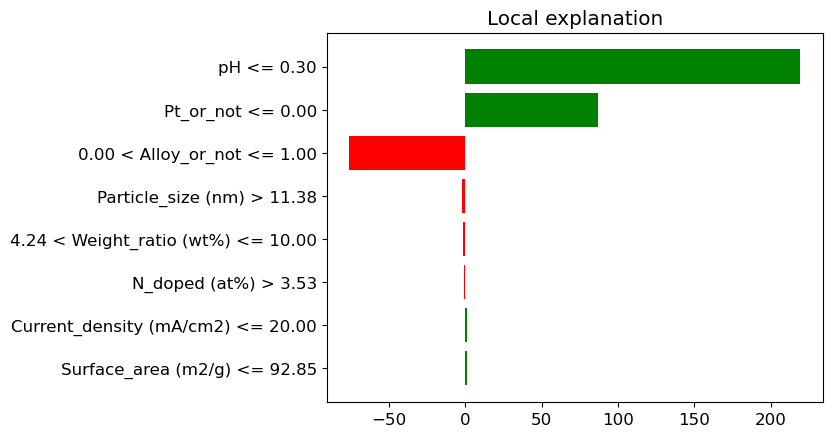

In [149]:
lime.plot()

In [150]:
lime.result

variable      effect
0                          pH <= 0.30  219.393786
1                   Pt_or_not <= 0.00   87.108585
2         0.00 < Alloy_or_not <= 1.00  -76.081896
3          Particle_size (nm) > 11.38   -2.348827
4  4.24 < Weight_ratio (wt%) <= 10.00   -1.330438
5                N_doped (at%) > 3.53   -1.140749
6   Current_density (mA/cm2) <= 20.00    1.138429
7        Surface_area (m2/g) <= 92.85    0.839291

In [154]:
surrogate_model_small = exp_cat1.model_surrogate(type='tree', max_depth=3, max_vars=3)
surrogate_model_small.performance

mse        rmse        r2        mae  \
DecisionTreeRegressor  11393.852962  106.741992  0.279657  88.992744   

                             mad  
DecisionTreeRegressor  96.898732

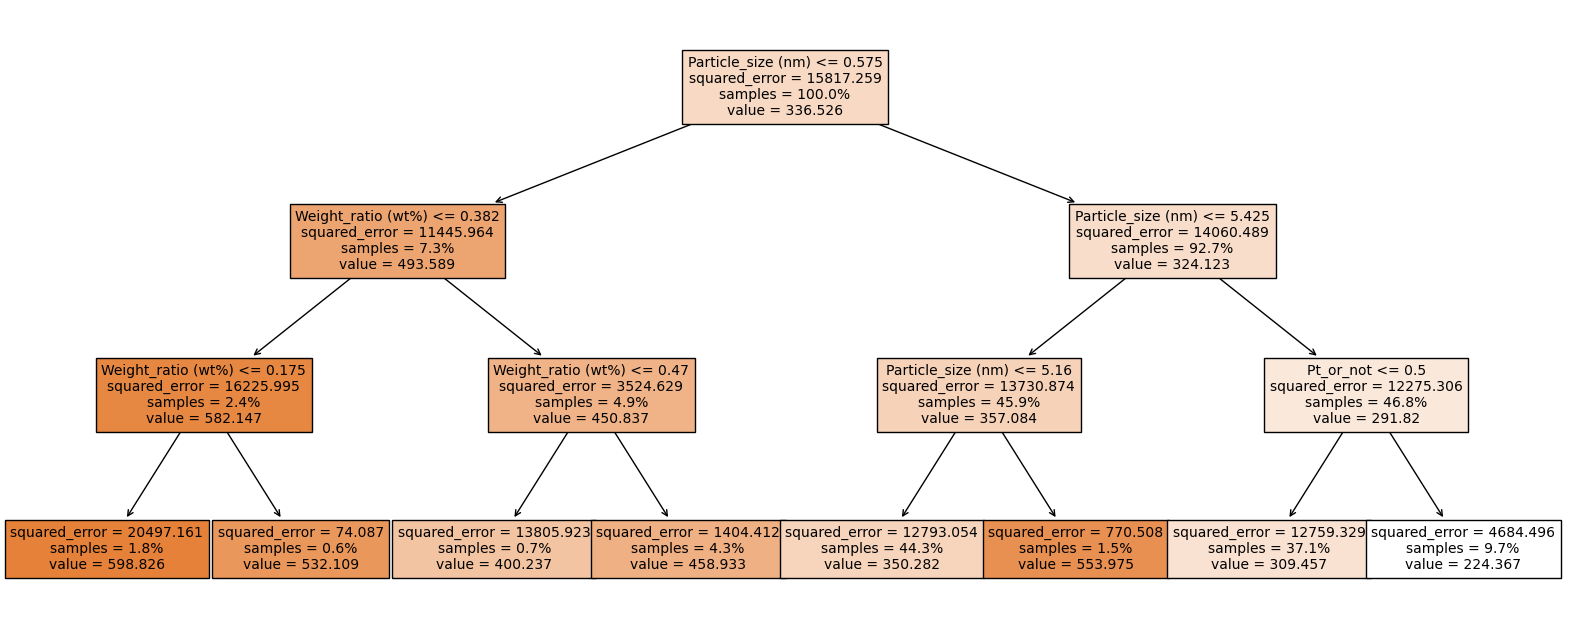

In [155]:
surrogate_model_small.plot(figsize=(20, 8), fontsize=10, filled=True)

In [40]:
asp = dx.Aspect(exp_cat)

In [41]:
asp_pps = dx.Aspect(exp_cat, depend_method = 'pps')

In [69]:
asp.plot_dendrogram(title='CatBoost Hierarchical clustering dendrogram (with association)')


<Figure size 1000x800 with 0 Axes>

In [43]:
asp_pps.plot_dendrogram(title='CatBoost Hierarchical clustering dendrogram (with PPS)')

In [49]:
asp_GB = dx.Aspect(exp_GB)

In [50]:
asp_pps_GB = dx.Aspect(exp_GB, depend_method = 'pps')

In [51]:
asp_GB.plot_dendrogram(title='GB Hierarchical clustering dendrogram (with association)')

In [48]:
asp_pps_GB.plot_dendrogram(title='GB Hierarchical clustering dendrogram (with PPS)')

In [181]:
asp.depend_matrix

Alloy_or_not  Pt_or_not  Weight_ratio (wt%)  \
Alloy_or_not                  1.000000   0.277794            0.212887   
Pt_or_not                     0.277794   1.000000            0.472034   
Weight_ratio (wt%)            0.212887   0.472034            1.000000   
Particle_size (nm)            0.362864   0.541799            0.598505   
Surface_area (m2/g)           0.069585   0.255183            0.463103   
N_doped (at%)                 0.007544   0.221690            0.007124   
pH                            0.249807   0.273597            0.199137   
Current_density (mA/cm2)      0.089427   0.060309            0.057922   

                          Particle_size (nm)  Surface_area (m2/g)  \
Alloy_or_not                        0.362864             0.069585   
Pt_or_not                           0.541799             0.255183   
Weight_ratio (wt%)                  0.598505             0.463103   
Particle_size (nm)                  1.000000             0.187163   
Surface_area (m2/g)                 0.187163             1.000000   
N_doped (at%)                       0.099419             0.181633   
pH                                  0.428463             0.052812   
Current_density (mA/cm2)            0.102040             0.056400   

                          N_doped (at%)        pH  Current_density (mA/cm2)  
Alloy_or_not                   0.007544  0.249807                  0.089427  
Pt_or_not                      0.221690  0.273597                  0.060309  
Weight_ratio (wt%)             0.007124  0.199137                  0.057922  
Particle_size (nm)             0.099419  0.428463                  0.102040  
Surface_area (m2/g)            0.181633  0.052812                  0.056400  
N_doped (at%)                  1.000000  0.024720                  0.067118  
pH                             0.024720  1.000000                  0.094724  
Current_density (mA/cm2)       0.067118  0.094724                  1.000000

In [72]:
mt = asp.model_triplot(random_state=42)

In [73]:
mt

In [75]:
mt.plot(title='CatBoost Triplot')

In [76]:
mt_GB = asp_GB.model_triplot(random_state=42)
mt_GB.plot(title='GB Triplot')

In [185]:
mt.plot(widget=True)

    'data': [{'base': 247.8130477407513,
              'hoverinfo': 'text',
    …

In [187]:
ind = np.argmin(abs(asp.explainer.y_hat - 0.5))
features.iloc[[ind]]

Alloy_or_not  Pt_or_not  Weight_ratio (wt%)  Particle_size (nm)  \
616             1          1               24.83                 7.5   

     Surface_area (m2/g)  N_doped (at%)    pH  Current_density (mA/cm2)  
616                 29.0            0.0  13.0                        10

In [188]:
asp.explainer.y[ind]

370.0

In [189]:
asp.explainer.y_hat[ind]

185.1157250522793

In [191]:
pt_def = asp.predict_triplot(features.iloc[ind], random_state=42)

In [192]:
pt_def

In [193]:
pt_def.plot()

In [194]:
pt_def.plot(widget=True)

    'data': [{'hoverinfo': 'text',
              'hoverlabel': {'bgcolor': 'rgba…

In [197]:
pt_shap = asp.predict_triplot(features.iloc[ind], type='shap', random_state=42)
pt_shap.plot()

In [198]:
mai = asp.model_parts(h=0.1, label='for aspects created on treshold h=0.1')
mai.plot()

In [199]:
mai.plot(show_variable_names=False, bar_width=15, digits=5)

In [220]:
protected = np.where(features['Alloy_or_not'] == 0, 'non_alloy', 'alloy')
privileged = 'alloy'

In [215]:
fobject = exp_cat.model_fairness(protected, privileged)
fobject2 = exp_GB.model_fairness(protected, privileged)

In [216]:
fobject.fairness_check()

Bias detected in 2 metrics: independence, separation

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'alloy'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
           independence  separation  sufficiency
subgroup                                        
non_alloy      1.792605    1.757145      1.00318


In [217]:
fobject2.fairness_check()

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on 'alloy'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
           independence  separation  sufficiency
subgroup                                        
non_alloy      1.009869    1.001419     1.000535


In [218]:
fobject.plot()

In [235]:
exp_list = [exp_GB1, exp_cat1]

In [238]:
exp_list[0].model_performance().plot([exp.model_performance() for exp in exp_list[1:]])

In [239]:
exp_list[0].model_parts().plot([exp.model_parts() for exp in exp_list[1:]])

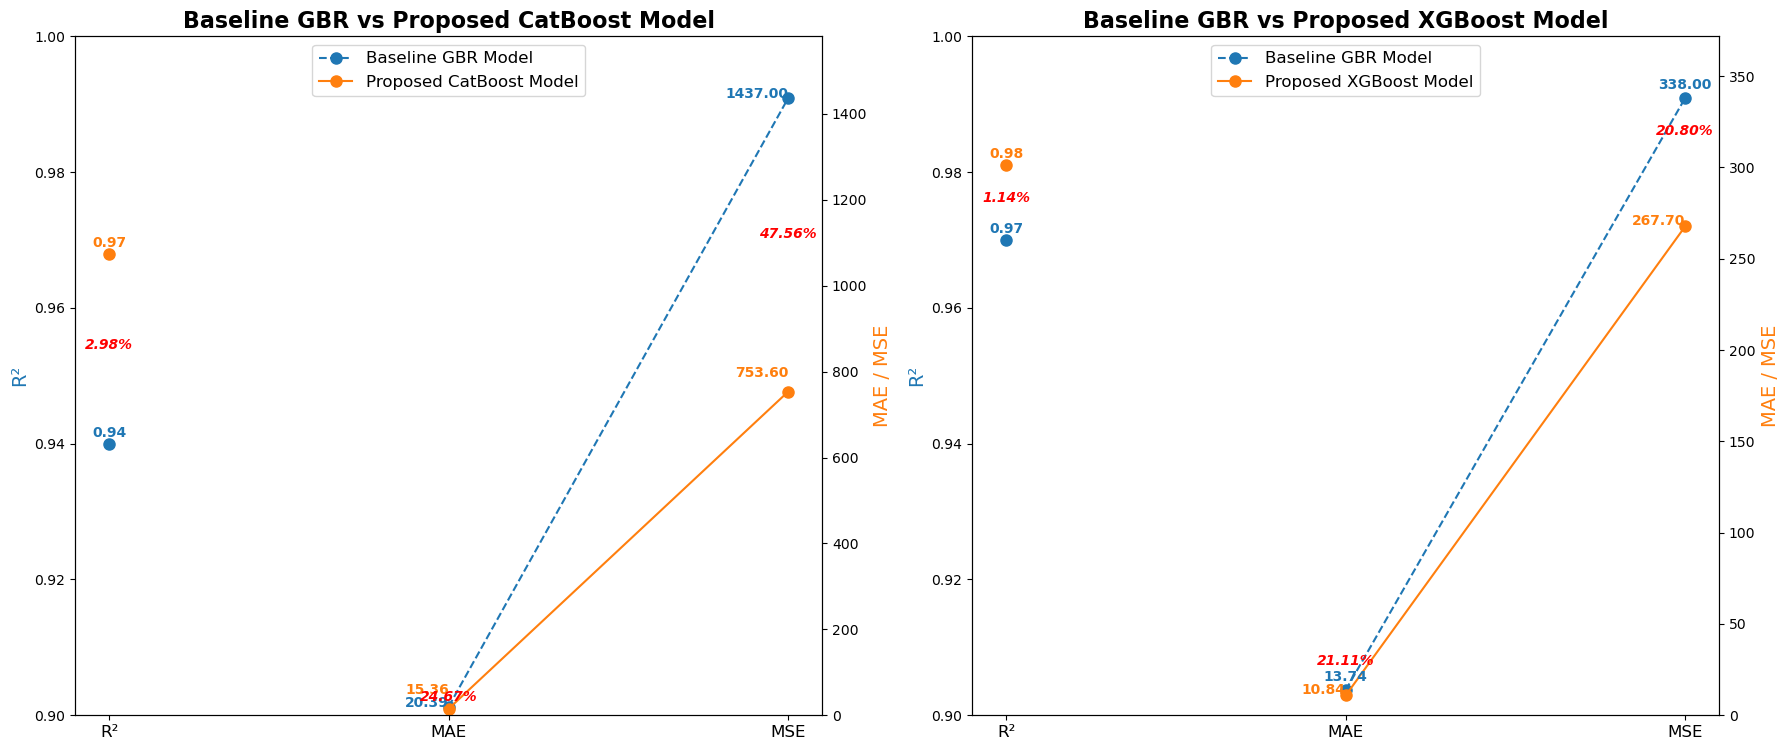

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
metrics = ['R²', 'MAE', 'MSE']
x = np.arange(len(metrics))

# Data for models
baseline_1 = [0.94, 20.39, 1437]
proposed_1 = [0.968, 15.36, 753.6]
improvement_1 = [2.98, 24.67, 47.56]

baseline_2 = [0.97, 13.74, 338]
proposed_2 = [0.9811, 10.84, 267.7]
improvement_2 = [1.14, 21.11, 20.80]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Colors
colors = ['#1f77b4', '#ff7f0e']  # Baseline: Blue, Proposed: Orange

def plot_model_comparison(ax, title, baseline, proposed, improvements):
    ax1 = ax
    ax2 = ax1.twinx()
    
    # Plot R² on primary y-axis
    ax1.plot(metrics[:1], baseline[:1], marker='o', color=colors[0], linestyle='--', markersize=8, label='Baseline GBR (R²)')
    ax1.plot(metrics[:1], proposed[:1], marker='o', color=colors[1], linestyle='-', markersize=8, label='Proposed Model (R²)')
    
    # Plot MAE and MSE on secondary y-axis
    ax2.plot(metrics[1:], baseline[1:], marker='o', color=colors[0], linestyle='--', markersize=8, label='Baseline GBR Model')
    ax2.plot(metrics[1:], proposed[1:], marker='o', color=colors[1], linestyle='-', markersize=8, label='Proposed CatBoost Model')

    # Annotating the values and improvements
    for i, metric in enumerate(metrics):
        if i < 1:  # R² values
            ax1.text(i, baseline[i] + 0.001, f'{baseline[i]:.2f}', ha='center', color=colors[0], fontweight='bold', fontsize=10)
            ax1.text(i, proposed[i] + 0.001, f'{proposed[i]:.2f}', ha='center', color=colors[1], fontweight='bold', fontsize=10)
            ax1.text(i, (baseline[i] + proposed[i]) / 2, f'{improvements[i]:.2f}%', ha='center', color='red', fontweight='bold', fontsize=10, style='italic')
        else:  # MAE and MSE values
            ax2.text(i, baseline[i] + 0, f'{baseline[i]:.2f}', ha='right', color=colors[0], fontweight='bold', fontsize=10)
            ax2.text(i, proposed[i] + 35, f'{proposed[i]:.2f}', ha='right', color=colors[1], fontweight='bold', fontsize=10)
            ax2.text(i, (baseline[i] + proposed[i]) / 2 + 15, f'{improvements[i]:.2f}%', ha='center', color='red', fontweight='bold', fontsize=10, style='italic')

    # Set labels and title
    ax1.set_title(title, fontsize=16, fontweight='bold')
    ax1.set_ylabel('R²', color=colors[0], fontsize=14)
    ax2.set_ylabel('MAE / MSE', color=colors[1], fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(metrics, fontsize=12)
    
    # Set y-limits for clarity
    ax1.set_ylim(0.9, 1.0)  # Adjust R² y-limits
    ax2.set_ylim(0, max(baseline[1:] + proposed[1:]) * 1.1)  # Adjust MAE/MSE y-limits
    ax2.legend(loc='upper center', fontsize=12)

def plot_model_comparison2(ax, title, baseline, proposed, improvements):
    ax1 = ax
    ax2 = ax1.twinx()
    
    # Plot R² on primary y-axis
    ax1.plot(metrics[:1], baseline[:1], marker='o', color=colors[0], linestyle='--', markersize=8, label='Baseline GBR (R²)')
    ax1.plot(metrics[:1], proposed[:1], marker='o', color=colors[1], linestyle='-', markersize=8, label='Proposed Model (R²)')
    
    # Plot MAE and MSE on secondary y-axis
    ax2.plot(metrics[1:], baseline[1:], marker='o', color=colors[0], linestyle='--', markersize=8, label='Baseline GBR Model')
    ax2.plot(metrics[1:], proposed[1:], marker='o', color=colors[1], linestyle='-', markersize=8, label='Proposed XGBoost Model')

    # Annotating the values and improvements
    for i, metric in enumerate(metrics):
        if i < 1:  # R² values
            ax1.text(i, baseline[i] + 0.001, f'{baseline[i]:.2f}', ha='center', color=colors[0], fontweight='bold', fontsize=10)
            ax1.text(i, proposed[i] + 0.001, f'{proposed[i]:.2f}', ha='center', color=colors[1], fontweight='bold', fontsize=10)
            ax1.text(i, (baseline[i] + proposed[i]) / 2, f'{improvements[i]:.2f}%', ha='center', color='red', fontweight='bold', fontsize=10, style='italic')
        else:  # MAE and MSE values
            ax2.text(i, baseline[i] + 5, f'{baseline[i]:.2f}', ha='center', color=colors[0], fontweight='bold', fontsize=10)
            ax2.text(i, proposed[i] + 1, f'{proposed[i]:.2f}', ha='right', color=colors[1], fontweight='bold', fontsize=10)
            ax2.text(i, (baseline[i] + proposed[i]) / 2 + 15, f'{improvements[i]:.2f}%', ha='center', color='red', fontweight='bold', fontsize=10, style='italic')

    # Set labels and title
    ax1.set_title(title, fontsize=16, fontweight='bold')
    ax1.set_ylabel('R²', color=colors[0], fontsize=14)
    ax2.set_ylabel('MAE / MSE', color=colors[1], fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(metrics, fontsize=12)
    
    # Set y-limits for clarity
    ax1.set_ylim(0.9, 1.0)  # Adjust R² y-limits
    ax2.set_ylim(0, max(baseline[1:] + proposed[1:]) * 1.1)  # Adjust MAE/MSE y-limits
    
    ax2.legend(loc='upper center', fontsize=12)
# First model comparison (GBR vs CatBoost)
plot_model_comparison(ax[0], 'Baseline GBR vs Proposed CatBoost Model', baseline_1, proposed_1, improvement_1)

# Second model comparison (GBR vs XGBoost)
plot_model_comparison2(ax[1], 'Baseline GBR vs Proposed XGBoost Model', baseline_2, proposed_2, improvement_2)

# Overall aesthetics
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure with high resolution
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


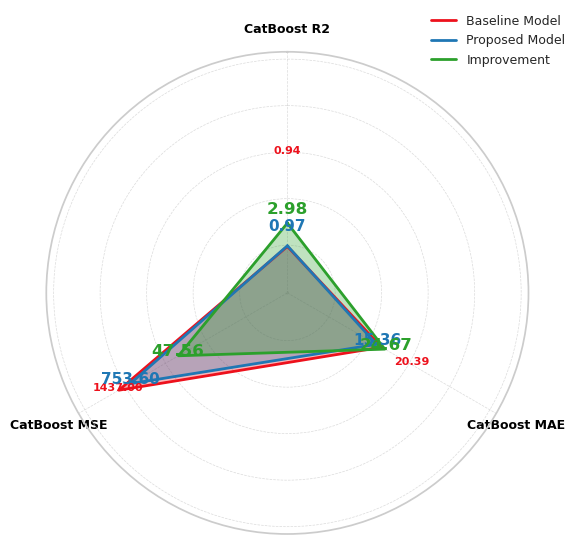

In [165]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
labels = [
    'CatBoost R2', 
    'CatBoost MAE', 
    'CatBoost MSE'
]

baseline_values = [0.94, 20.39, 1437]
proposed_values = [0.968, 15.36, 753.6]
improvement_values = [2.98, 24.67, 47.56]

# Number of variables
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first value to close the circle

# Repeat the values to close the circle
baseline_values += baseline_values[:1]
proposed_values += proposed_values[:1]
improvement_values += improvement_values[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per metric and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw y-labels
ax.set_rscale('log')
plt.ylim(min(min(baseline_values), min(proposed_values)) / 10, max(max(proposed_values), max(baseline_values)) * 10)

# Draw axes and labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9, color='black', weight='bold')

# Draw radar charts for each model
ax.plot(angles, baseline_values, color='#ed111c', linewidth=2, linestyle='solid', label='Baseline Model')
ax.fill(angles, baseline_values, color='#ed111c', alpha=0.3)

ax.plot(angles, proposed_values, color='#1f77b4', linewidth=2, linestyle='solid', label='Proposed Model')
ax.fill(angles, proposed_values, color='#1f77b4', alpha=0.3)

ax.plot(angles, improvement_values, color='#2ca02c', linewidth=2, linestyle='solid', label='Improvement')
ax.fill(angles, improvement_values, color='#2ca02c', alpha=0.3)

# Annotate each metric for the Baseline Model
for i, (baseline, proposed, improvement) in enumerate(zip(baseline_values[:-1], proposed_values[:-1], improvement_values[:-1])):
    angle = angles[i]
    
    # Define offsets for each metric
    if labels[i] == 'R2':
        baseline_offset = 0.0
        proposed_offset = 0.5
        improvement_offset = 1.1
    elif labels[i] == 'MAE':
        baseline_offset = 0.0
        proposed_offset = 45.5
        improvement_offset = 99.5
    elif labels[i] == 'MSE':
        baseline_offset = 92.7
        proposed_offset = 1.1
        improvement_offset = 1.7
    
    # Annotate baseline values
    ax.text(angle, baseline + baseline_offset, f'{baseline:.2f}', horizontalalignment='center', size=8, color='#ed111c', weight='bold')

    # Annotate proposed values
    ax.text(angle, proposed + proposed_offset, f'{proposed:.2f}', horizontalalignment='center', size=11, color='#1f77b4', weight='bold')

    # Annotate improvement values
    ax.text(angle, improvement + improvement_offset, f'{improvement:.2f}', horizontalalignment='center', size=12, color='#2ca02c', weight='bold')

# Add a title
# plt.title('Model Performance Metrics Comparison', size=9, color='black', y=1.1, weight='bold')

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=9, frameon=False)

# Customize grid lines and remove polar labels
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_yticklabels([])  # Remove y-axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



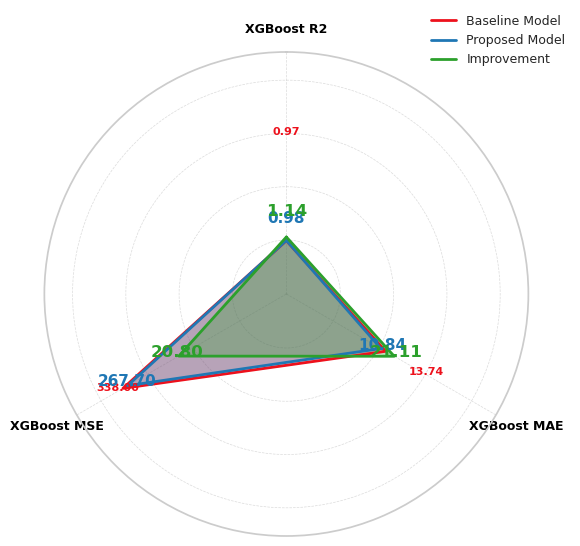

In [166]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
labels = [
    'XGBoost R2', 
    'XGBoost MAE', 
    'XGBoost MSE'
]

baseline_values = [0.97, 13.74, 338]
proposed_values = [0.9811, 10.84, 267.7]
improvement_values = [1.14, 21.11, 20.80]

# Number of variables
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first value to close the circle

# Repeat the values to close the circle
baseline_values += baseline_values[:1]
proposed_values += proposed_values[:1]
improvement_values += improvement_values[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per metric and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw y-labels
ax.set_rscale('log')
plt.ylim(min(min(baseline_values), min(proposed_values)) / 10, max(max(proposed_values), max(baseline_values)) * 10)

# Draw axes and labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9, color='black', weight='bold')

# Draw radar charts for each model
ax.plot(angles, baseline_values, color='#ed111c', linewidth=2, linestyle='solid', label='Baseline Model')
ax.fill(angles, baseline_values, color='#ed111c', alpha=0.3)

ax.plot(angles, proposed_values, color='#1f77b4', linewidth=2, linestyle='solid', label='Proposed Model')
ax.fill(angles, proposed_values, color='#1f77b4', alpha=0.3)

ax.plot(angles, improvement_values, color='#2ca02c', linewidth=2, linestyle='solid', label='Improvement')
ax.fill(angles, improvement_values, color='#2ca02c', alpha=0.3)

# Annotate each metric for the Baseline Model
for i, (baseline, proposed, improvement) in enumerate(zip(baseline_values[:-1], proposed_values[:-1], improvement_values[:-1])):
    angle = angles[i]
    
    # Define offsets for each metric
    if labels[i] == 'R2':
        baseline_offset = 0.0
        proposed_offset = 0.5
        improvement_offset = 1.1
    elif labels[i] == 'MAE':
        baseline_offset = 0.0
        proposed_offset = 45.5
        improvement_offset = 99.5
    elif labels[i] == 'MSE':
        baseline_offset = 92.7
        proposed_offset = 1.1
        improvement_offset = 1.7
    
    # Annotate baseline values
    ax.text(angle, baseline + baseline_offset, f'{baseline:.2f}', horizontalalignment='center', size=8, color='#ed111c', weight='bold')

    # Annotate proposed values
    ax.text(angle, proposed + proposed_offset, f'{proposed:.2f}', horizontalalignment='center', size=11, color='#1f77b4', weight='bold')

    # Annotate improvement values
    ax.text(angle, improvement + improvement_offset, f'{improvement:.2f}', horizontalalignment='center', size=12, color='#2ca02c', weight='bold')

# Add a title
# plt.title('Model Performance Metrics Comparison', size=9, color='black', y=1.1, weight='bold')

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=9, frameon=False)

# Customize grid lines and remove polar labels
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_yticklabels([])  # Remove y-axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

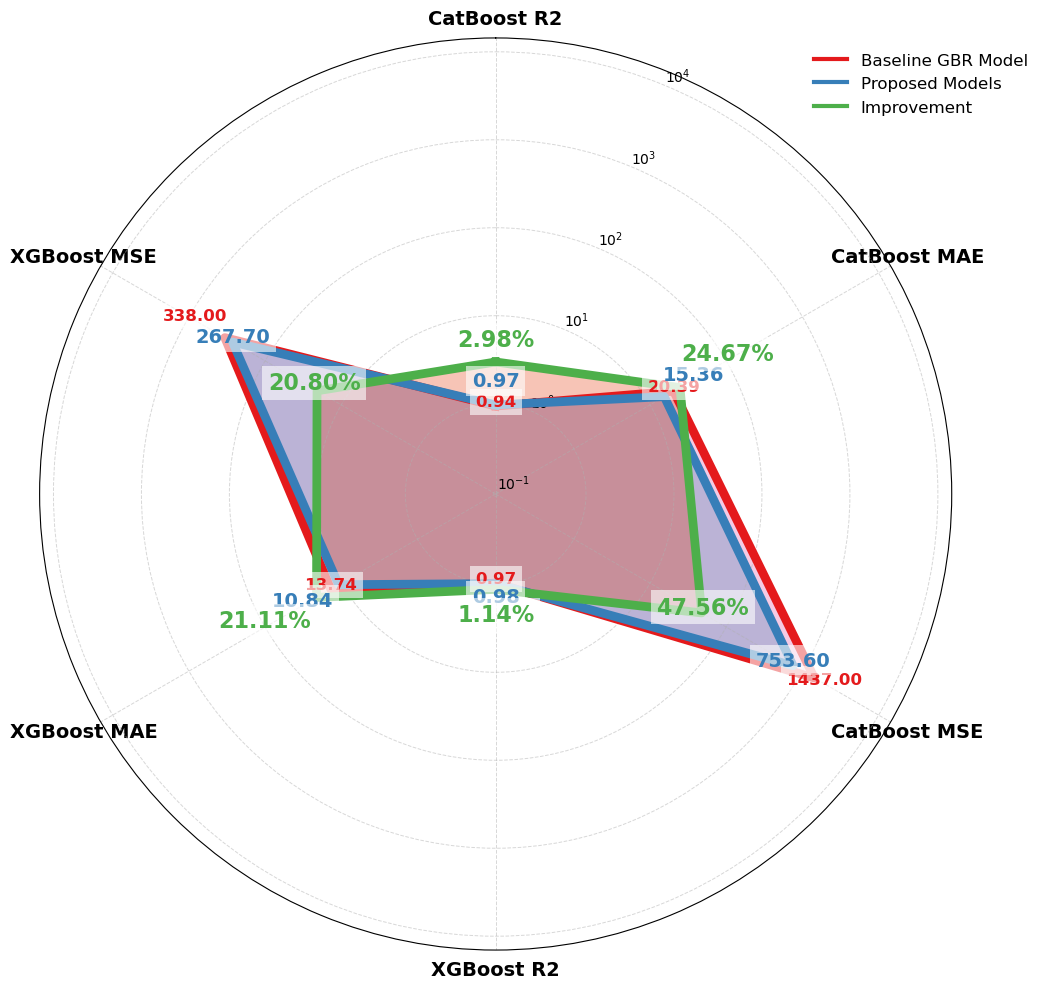

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Define the metrics for both models
labels = [
    'CatBoost R2', 
    'CatBoost MAE', 
    'CatBoost MSE',
    'XGBoost R2', 
    'XGBoost MAE', 
    'XGBoost MSE'
]

# Combine baseline, proposed, and improvement values for both models
baseline_values = [0.94, 20.39, 1437, 0.97, 13.74, 338]
proposed_values = [0.968, 15.36, 753.6, 0.9811, 10.84, 267.7]
improvement_values = [2.98, 24.67, 47.56, 1.14, 21.11, 20.80]  # Percentages as decimal values

# Number of variables (metrics) to plot
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first value to close the circle

# Repeat the values to close the circle
baseline_values += baseline_values[:1]
proposed_values += proposed_values[:1]
improvement_values += improvement_values[:1]

# Create radar chart
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(polar=True))

# Draw one axe per metric and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw y-labels
ax.set_rscale('log')
plt.ylim(min(min(baseline_values), min(proposed_values)) / 10, max(max(proposed_values), max(baseline_values)) * 10)

# Draw axes and labels with customized appearance
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=14, color='black', weight='bold')

# Draw radar charts for each model with modern colors
ax.plot(angles, baseline_values, color='#e41a1c', linewidth=6.3, linestyle='solid', label='Baseline Model')
ax.fill(angles, baseline_values, color='#de52a8', alpha=0.3)

ax.plot(angles, proposed_values, color='#377eb8', linewidth=6.3, linestyle='solid', label='Proposed Model')
ax.fill(angles, proposed_values, color='#377eb8', alpha=0.3)

ax.plot(angles, improvement_values, color='#4daf4a', linewidth=6.3, linestyle='solid', label='Improvement')
ax.fill(angles, improvement_values, color='#e63e10', alpha=0.3)

# Annotate each metric with detailed information
for i, (baseline, proposed, improvement) in enumerate(zip(baseline_values[:-1], proposed_values[:-1], improvement_values[:-1])):
    angle = angles[i]

    # Define offsets based on the metric type
    if 'R2' in labels[i]:
        baseline_offset = 0.0
        proposed_offset = 0.6
        improvement_offset = 1.5
    elif 'MAE' in labels[i]:
        baseline_offset = 0.0
        proposed_offset = 21.5
        improvement_offset = 79.5
    elif 'MSE' in labels[i]:
        baseline_offset = 500.7
        proposed_offset = 0.0
        improvement_offset = 1.7

    # Annotate baseline values
    ax.text(angle, baseline + baseline_offset, f'{baseline:.2f}', horizontalalignment='center', size=12, color='#e41a1c', weight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.6))

    # Annotate proposed values
    ax.text(angle, proposed + proposed_offset, f'{proposed:.2f}', horizontalalignment='center', size=14, color='#377eb8', weight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.6))

    # Annotate improvement values
    ax.text(angle, improvement + improvement_offset, f'{improvement:.2f}%', horizontalalignment='center', size=16, color='#4daf4a', weight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.6))

# Add a title
# plt.title('Comparison of Model Performance Metrics', size=18, weight='bold')

# Add a legend with custom styling
legend_elements = [
    Line2D([0], [0], color='#e41a1c', lw=3, label='Baseline GBR Model'),
    Line2D([0], [0], color='#377eb8', lw=3, label='Proposed Models'),
    Line2D([0], [0], color='#4daf4a', lw=3, label='Improvement')
]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1.0), fontsize=12, frameon=False)
# Customize grid lines
ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

# Adjust layout
plt.tight_layout()

# Save the figure for publication (optional)
plt.savefig('radar_chart.pdf', dpi=900, bbox_inches='tight')

# Show the plot
plt.show()



CatBoost
Train Accuracy r2: 0.9939
Test Accuracy r2: 0.9391
Train Accuracy MAE: 7.264
Test Accuracy MAE: 20.39
Train Accuracy MSE: 132.5
Test Accuracy MSE: 1437

XGBoost
Train Accuracy r2: 0.9999
Test Accuracy r2: 0.9811
Train Accuracy MAE: 0.4963
Test Accuracy MAE: 10.84
Train Accuracy mse: 1.37
Test Accuracy mse: 267.7


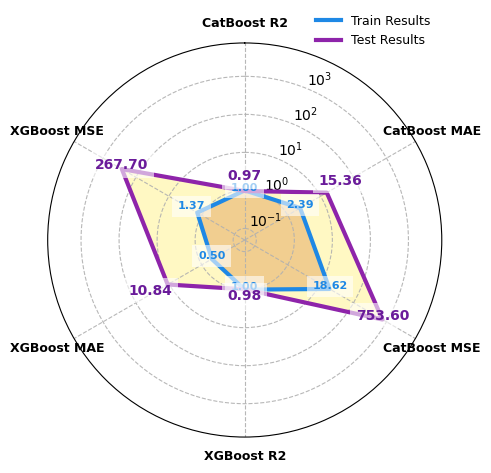

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Define the metrics for both models
labels = [
    'CatBoost R2', 
    'CatBoost MAE', 
    'CatBoost MSE',
    'XGBoost R2', 
    'XGBoost MAE', 
    'XGBoost MSE'
]

# Define train and test values for both models
train_values = [0.999, 2.39, 18.62, 0.9999, 0.496, 1.37]
test_values = [0.968, 15.36, 753.6, 0.9811, 10.84, 267.7]

# Number of variables (metrics) to plot
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first value to close the circle

# Repeat the values to close the circle
train_values += train_values[:1]
test_values += test_values[:1]

# Create radar chart
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

# Draw one axe per metric and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw y-labels
ax.set_rscale('log')
plt.ylim(min(min(train_values), min(test_values)) / 10, max(max(train_values), max(test_values)) * 10)

# Draw axes and labels with customized appearance
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9, color='#000000', weight='bold')

# Draw radar charts for each model with new colors
ax.plot(angles, train_values, color='#1E88E5', linewidth=3, linestyle='solid', label='Train Results')  # CatBoost: Green
ax.fill(angles, train_values, color='#BF360C', alpha=0.3)

ax.plot(angles, test_values, color='#8E24AA', linewidth=3, linestyle='solid', label='Test Results')  # XGBoost: Orange
ax.fill(angles, test_values, color='#FFEB3B', alpha=0.3)

# Annotate each metric with detailed information
for i, (train, test) in enumerate(zip(train_values[:-1], test_values[:-1])):
    angle = angles[i]

    # Define offsets based on the metric type
    if 'R2' in labels[i]:
        train_offset = 0.0
        test_offset = 0.9
    elif 'MAE' in labels[i]:
        train_offset = 0.0
        test_offset = 25.5
    elif 'MSE' in labels[i]:
        train_offset = 0.7
        test_offset = 0.0

    # Annotate train values
    ax.text(angle, train + train_offset, f'{train:.2f}', horizontalalignment='center', size=8, color='#1E88E5', weight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.6))

    # Annotate test values
    ax.text(angle, test + test_offset, f'{test:.2f}', horizontalalignment='center', size=10, color='#6A1B9A', weight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.6))

# Add a legend with custom styling
legend_elements = [
    Line2D([0], [0], color='#1E88E5', lw=3, label='Train Results'),
    Line2D([0], [0], color='#8E24AA', lw=3, label='Test Results')
    
]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.0, 1.1), fontsize=9, frameon=False)

# Customize grid lines
ax.grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

# Adjust layout
plt.tight_layout()

# Save the figure for publication (optional)
plt.savefig('train_test_radar_chart.pdf', dpi=900, bbox_inches='tight')

# Show the plot
plt.show()